In [42]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
# import sympy
import scipy.stats as st
import scipy.special
import pandas
import csv
import math
import multiprocessing as mp
import datetime
from decimal import *
from mpl_toolkits.mplot3d import Axes3D
# from google.colab import drive

## **Google Drive**

In [3]:
# connect to google drive to save the csv file
# drive.mount('drive')
# os.chdir("drive/My Drive/Yen-Ting Lin/Code")

## **Back-off Calculation**

### **Retransmission at same RAP**

In [43]:
# alpha with i
def find_kmin(T_RAREP, T_RAR, W_RAR, W_BO, i):
  return np.ceil((i - 1) + ((1 - (T_RAR + W_RAR + W_BO)) / T_RAREP))
  # return np.ceil((i - 1) - (((T_RAR + W_RAR + W_BO) - 1) / T_RAREP)) # same equation

def find_kmax(T_RAREP, T_RAR, W_RAR, W_BO, i):
  return np.floor(i - ((T_RAR + W_RAR + 1) / T_RAREP))

def find_alpha(T_RAREP, T_RAR, W_RAR, W_BO, i, k, kmin, kmax):
  if kmin <= k <= (i - ((T_RAR + W_RAR + W_BO) / T_RAREP)):
    return (((k - 1) * T_RAREP) + T_RAR + W_RAR + W_BO - ((i - 2) * T_RAREP)) / W_BO
  elif (i - ((T_RAR + W_RAR + W_BO) / T_RAREP)) < k < ((i - 1) - ((T_RAR + W_RAR) / T_RAREP)):
    return ((T_RAREP) / W_BO)
  elif ((i - 1) - ((T_RAR + W_RAR) / T_RAREP)) <= k <= kmax:
    return (((i - 1) * T_RAREP) - (((k - 1) * T_RAREP) + T_RAR + W_RAR)) / W_BO
  else:
    return 0

### **Retransmission of fallback RAP**

In [44]:
def find_jmin(T_RAREP_4sra, T_RAREP_2sra, T_RAR, W_RAR, i):
  return np.ceil((((i - 2) * T_RAREP_4sra) + T_RAR + W_RAR - 1) / T_RAREP_2sra) + 1

def find_jmax(T_RAREP_4sra, T_RAREP_2sra, T_RAR, W_RAR, i):
  return np.floor((((i - 1) * T_RAREP_4sra) + T_RAR + W_RAR - 2) / T_RAREP_2sra) + 1

## **Main Function**

In [118]:
def main():
  # initail number of fallback UE
  M_FB = [0.0 for i in range(0, M - 1)]

  Ms_4SRA_list = [0.0 for i in range(0, len(M_4SRA))]
  Ps_4SRA_list = [0.0 for i in range(0, len(M_4SRA))]
  Da_4SRA_list = [0.0 for i in range(0, len(M_4SRA))]
  Ur_PRACH_4SRA_list = [0.0 for i in range(0, len(M_4SRA))]
  Ur_PUSCH_4SRA_list = [0.0 for i in range(0, len(M_4SRA))]
  MiSn_4SRA_list = [0.0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
  # MiSn_4SRA_list = [0.0 for i in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]

  Ms_2SRA_list = [0.0 for i in range(0, len(M_2SRA))]
  Ps_2SRA_list = [0.0 for i in range(0, len(M_2SRA))]
  Da_2SRA_list = [0.0 for i in range(0, len(M_2SRA))]
  Ur_PRACH_2SRA_list = [0.0 for i in range(0, len(M_2SRA))]
  Ur_PUSCH_2SRA_list = [0.0 for i in range(0, len(M_2SRA))]
  MiSn_2SRA_list = [0.0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
  # MiSn_2SRA_list = [0.0 for i in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra) + 1)]

  Ms_FB_list = [0.0 for i in range(0, len(M_4SRA))]
  Ps_FB_list = [0.0 for i in range(0, len(M_4SRA))]
  Da_FB_list = [0.0 for i in range(0, len(M_4SRA))]
  Ur_PRACH_FB_list = [0.0 for i in range(0, len(M_4SRA))]
  Ur_PUSCH_FB_list = [0.0 for i in range(0, len(M_4SRA))]
  MiSn_FB_list = [0.0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
  # MiSn_FB_list = [0.0 for i in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]

  Ms_T_list = [0.0 for i in range(0, M - 1)]
  Ps_T_list = [0.0 for i in range(0, M - 1)]
  Da_2SRA_T_list = [0.0 for i in range(0, M - 1)]
  Da_T_list = [0.0 for i in range(0, M - 1)]
  Ur_PRACH_T_list = [0.0 for i in range(0, M - 1)]
  Ur_PUSCH_4SRA_T_list = [0.0 for i in range(0, M - 1)]
  Ur_PUSCH_T_list = [0.0 for i in range(0, M - 1)]
  MiSn_T_list = [0.0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
  # MiSn_T_list = [0.0 for i in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]

  Slot = [i for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
  # Slot = [i for i in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]
  Mi_FB_list = [0.0 for i in range(0, len(Slot))]
  
  j_list = [0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
  j_start = 0.0

  for ue in range(0, M - 1):
    print("ue : ", M_2SRA[ue] + M_4SRA[ue])
    # initial the MiSn and MiFn: Mi[slot][num of trans + 1]
    # the last time of retrans needed to be ignored
    '''
    MiCn_4SRA = [[0.0] * int((retrans_4sra + 1) + 1) for _ in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]
    MiSn_4SRA = [[0.0] * int((retrans_4sra + 1) + 1) for _ in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]
    MiFn_4SRA = [[0.0] * int((retrans_4sra + 1) + 1) for _ in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]
    T_4SRA = [0.0 for i in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]

    MiCn_2SRA = [[0.0] * int((retrans_2sra + 1) + 1) for _ in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra) + 1)]
    MiSn_2SRA = [[0.0] * int((retrans_2sra + 1) + 1) for _ in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra) + 1)]
    MiFn_2SRA = [[0.0] * int((retrans_2sra + 1) + 1) for _ in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra) + 1)]
    T_2SRA = [0.0 for i in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra) + 1)]

    MiCn_FB = [[0.0] * int((retrans_4sra + 1) + 1) for _ in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]
    MiSn_FB = [[0.0] * int((retrans_4sra + 1) + 1) for _ in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]
    MiFn_FB = [[0.0] * int((retrans_4sra + 1) + 1) for _ in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]
    T_FB = [0.0 for i in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]
    '''
    MiCn_4SRA = [[0.0] * int((retrans_4sra + 1) + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    MiSn_4SRA = [[0.0] * int((retrans_4sra + 1) + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    MiFn_4SRA = [[0.0] * int((retrans_4sra + 1) + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    T_4SRA = [0.0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]

    MiCn_2SRA = [[0.0] * int((retrans_2sra + 1) + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    MiSn_2SRA = [[0.0] * int((retrans_2sra + 1) + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    MiFn_2SRA = [[0.0] * int((retrans_2sra + 1) + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    T_2SRA = [0.0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]

    MiCn_FB = [[0.0] * int((retrans_FB + 1) + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    MiSn_FB = [[0.0] * int((retrans_FB + 1) + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    MiFn_FB = [[0.0] * int((retrans_FB + 1) + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    T_FB = [0.0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]

    # num of total UE in slot 0
    # MiFn_2SRA[0][0] = M_2SRA[ue]
    # MiFn_2SRA[0][0] = traffic_arrival(M_2SRA[ue], T_sat, t_c, T_s)[0] + traffic_arrival(M_2SRA[ue], T_sat, t_c, T_s)[1]
    MiFn_2SRA[0][0] = traffic_arrival(M_2SRA[ue], T_sat, t_c, T_s)[0] + 10
    for i in range(1, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1):
      # print(traffic_arrival(M_2SRA[ue], T_sat, t_c, T_s)[1])
      # MiFn_2SRA[i][0] = traffic_arrival(M_2SRA[ue], T_sat, t_c, T_s)[1]
      MiFn_2SRA[i][0] += 10
    # print(np.matrix(MiFn_2SRA))

    # 2SRA procedure sure be finished before 4SRA procedure
    for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
    # for i in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra)):
      # print("i = ", i, "\n")
      kmin_2sra = find_kmin(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, i)
      kmax_2sra = find_kmax(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, i)
      # print("kmin = ", kmin, "kmax = ", kmax, "\n")
      m_2SRA = 0
      for n in range(0, int(retrans_2sra + 1)):
        m_2SRA += MiFn_2SRA[i][n] # Mi

      if N_2SRA[0] == 0:
        E_M = 0
      else:
        E_M = np.exp(-(m_2SRA / N_2SRA[0]))
        # print("i =", i, ",E_M =", E_M)

      for n in range(0, int(retrans_2sra + 1)):
        # print("n = ", n, "\n")
        k_list_2SRA = []
        # if the waiting time for receiving MSG2 is larger than T_RAREP
        k_shift_2SRA = math.ceil((T_RAR_2sra + W_RAR_2sra) / T_RAREP_2sra)
        # print("k_shift_2SRA", k_shift_2SRA)
        if MiFn_2SRA[i][n] != 0:
          for k in range(int(kmin_2sra), int(kmax_2sra + 1)):
            # print("k = ", k, "\n")
            alpha_2sra = find_alpha(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, i, k, kmin_2sra, kmax_2sra)
            if preamble_detection == "false":
              k_list_2SRA.append(alpha_2sra * (MiFn_2SRA[i][n] * (1.0 - E_M)))
              # k_list_2SRA.append(alpha * MiCn_2SRA[i][n])
            elif preamble_detection == "true":
              if i == 0:
                # transmit the first preamble
                if n == 0 and MiFn_2SRA[i][n] * E_M * P_N(n + 1) >= N_UL_2sra:
                  k_list_2SRA.append(alpha_2sra * (MiFn_2SRA[i][n] - N_UL_2sra))
                elif n == 0 and MiFn_2SRA[i][n] * E_M * P_N(n + 1) < N_UL_2sra:
                  k_list_2SRA.append(alpha_2sra * (MiFn_2SRA[i][n] * (1.0 - E_M * P_N(n + 1))))
                elif n != 0:
                  k_list_2SRA.append(alpha_2sra * (0))
              else:
                total_MiFn_2SRA = 0
                for n_2sra in range(0, int(retrans_2sra + 1)):
                  total_MiFn_2SRA += MiFn_2SRA[i][n_2sra] * E_M * P_N(n_2sra + 1)
                # print("n =", n, ",total_MiFn_2SRA =", total_MiFn_2SRA)
                # print("P_N =", P_N, ",MiFn_2SRA[i][n] * E_M * P_N =", MiFn_2SRA[i][n] * E_M * P_N)
                if total_MiFn_2SRA <= N_UL_2sra:
                  k_list_2SRA.append(alpha_2sra * (MiFn_2SRA[i][n] * (1.0 - E_M * P_N(n + 1))))
                  # k_list_2SRA.append(alpha * MiCn_2SRA[i][n])
                else:
                  k_list_2SRA.append(alpha_2sra * (MiFn_2SRA[i][n] - (((MiFn_2SRA[i][n] * E_M * P_N(n + 1)) / total_MiFn_2SRA) * N_UL_2sra)))
                  # print("S =", (MiFn_2SRA[i][n] * E_M * P_N) / total_MiFn_2SRA)
                  # print("S' =", ((MiFn_2SRA[i][n] * E_M * P_N) / total_MiFn_2SRA) * N_UL_2sra)
                  # print("F-S' =", MiFn_2SRA[i][n] - (((MiFn_2SRA[i][n] * E_M * P_N) / total_MiFn_2SRA) * N_UL_2sra))
                  # print("alpha*(F-S') =", alpha * (MiFn_2SRA[i][n] - (((MiFn_2SRA[i][n] * E_M * P_N) / total_MiFn_2SRA) * N_UL_2sra)))

                  # k_list_2SRA.append(alpha * (MiFn_2SRA[i][n] - MiSn_2SRA[i][n]))
            # print("alpha = ", alpha, "\n")
          # process the data to put it into array like type 1
          # print("k_list_2SRA", len(k_list_2SRA))
          for itr_k in range(0, len(k_list_2SRA)):
            # print("i + itr_k + k_shift_2SRA", i + itr_k + k_shift_2SRA)
            # if you find problem after adjusting the parameters, you need to set T_RAREP > T_RAR + W_RAR
            # if you still want to set T_RAREP < T_RAR + W_RAR, you need to change the value "1" in "i + itr_k + 1"
            # print(k_list_2SRA[(len(k_list_2SRA) - 1) - itr_k])
            if i + itr_k + k_shift_2SRA <= test_maxslot(I_max_4sra, I_max_2sra, I_max_FB):
              MiFn_2SRA[i + itr_k + k_shift_2SRA][n + 1] += k_list_2SRA[(len(k_list_2SRA) - 1) - itr_k]
            # print("MiCn = ", MiFn[i][n] * (1.0 - E_M), "\n")
            # print(np.matrix(MiFn))
      # print("MiFn_2SRA", MiFn_2SRA[i])

      for n in range(0, int(retrans_2sra + 1)):
        # move MiSn and MiCn calculation part above the kmin, kma, alpha calculation part
        if preamble_detection == "false":
          # the RA complete time exceeds the coverage time
          if (i + T_RA_CMPLT_2sra) > T_cell:
            MiSn_2SRA[i][n] = 0
            MiCn_2SRA[i][n] = MiFn_2SRA[i][n]
          # the RA complete time still in the coverage time
          else:
            MiSn_2SRA[i][n] = MiFn_2SRA[i][n] * E_M
            MiCn_2SRA[i][n] = MiFn_2SRA[i][n] * (1.0 - E_M)
          '''
          MiSn_2SRA[i][n] = MiFn_2SRA[i][n] * E_M
          MiCn_2SRA[i][n] = MiFn_2SRA[i][n] * (1.0 - E_M)
          '''
        elif preamble_detection == "true":
          # transmission at the first RA slot
          if i == 0:
            # transmit the first preamble
            if n == 0 and MiFn_2SRA[i][n] * E_M * P_N(n + 1) >= N_UL_2sra:
              MiSn_2SRA[i][n] = N_UL_2sra
              MiCn_2SRA[i][n] = MiFn_2SRA[i][n] - N_UL_2sra
            elif n == 0 and MiFn_2SRA[i][n] * E_M * P_N(n + 1) < N_UL_2sra:
              MiSn_2SRA[i][n] = MiFn_2SRA[i][n] * E_M * P_N(n + 1)
              MiCn_2SRA[i][n] = MiFn_2SRA[i][n] * (1.0 - E_M * P_N(n + 1))
            elif n != 0:
              MiSn_2SRA[i][n] = 0
              MiCn_2SRA[i][n] = 0
          else:
            # the RA complete time exceeds the coverage time
            if (i + T_RA_CMPLT_2sra) > T_cell:
              MiSn_2SRA[i][n] = 0
              MiCn_2SRA[i][n] = MiFn_2SRA[i][n]
            # the RA complete time still in the coverage time
            else:
              total_MiFn_2SRA = 0
              for n_2sra in range(0, int(retrans_2sra + 1)):
                # print("n_2sra", n_2sra, "MiFn_2SRA_Loop", MiFn_2SRA[i][n_2sra] * E_M * (1 - (1 / math.exp(n_2sra + 1))))
                total_MiFn_2SRA += MiFn_2SRA[i][n_2sra] * E_M * P_N(n_2sra + 1)
              # transmission at the rest of RA slot
              if total_MiFn_2SRA <= N_UL_2sra:
                MiSn_2SRA[i][n] = MiFn_2SRA[i][n] * E_M * P_N(n + 1)
              else:
                # print("MiFn_2SRA_One", MiFn_2SRA[i][n] * E_M * P_N, total_MiFn_2SRA)
                MiSn_2SRA[i][n] = ((MiFn_2SRA[i][n] * E_M * P_N(n + 1)) / total_MiFn_2SRA) * N_UL_2sra
              MiCn_2SRA[i][n] = MiFn_2SRA[i][n] - MiSn_2SRA[i][n]
        # if n == retrans_2sra:
        #   if (MiCn_2SRA[i][n]) != 0:
        #     M_FB[ue] += MiCn_2SRA[i][n]
        #     Mi_FB_list[i + 1] += MiCn_2SRA[i][n]
        #     MiFn_FB[i + 1][0] += MiCn_2SRA[i][n]
      # print("MiSn_2SRA", MiSn_2SRA[i])
      # print("--------------------------------------------------------------------")

      # define delay
      if payload_decoding == "true":
        # T_2SRA[i] = (i - 1) * T_RAREP_2sra + T_RAR_2sra + W_RAR_2sra + 9 + T_total_2sra + T_MSG_2sra
        T_2SRA[i] = (i - 1) * T_RAREP_2sra + T_RAR_2sra + W_RAR_2sra + T_MSG_2sra
      elif payload_decoding == "false":
        # T_2SRA[i] = (i - 1) * T_RAREP_2sra + T_RAR_2sra + W_RAR_2sra + 9 + T_total_2sra
        # T_2SRA[i] = (i - 1) * T_RAREP_2sra + T_RAR_2sra + W_RAR_2sra + 1
        T_2SRA[i] = (i - 1) * T_RAREP_2sra + T_MSG_2sra

    # print("-------------------------------------------------------------")
    # num of total UE in slot 0
    # MiFn_4SRA[0][0] = M_4SRA[ue]
    # MiFn_4SRA[0][0] = traffic_arrival(M_4SRA[ue], T_sat, t_c, T_s)[0] + traffic_arrival(M_2SRA[ue], T_sat, t_c, T_s)[1]
    MiFn_4SRA[0][0] = traffic_arrival(M_4SRA[ue], T_sat, t_c, T_s)[0] + 10
    for i in range(1, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1):
      # MiFn_4SRA[i][0] = traffic_arrival(M_4SRA[ue], T_sat, t_c, T_s)[1]
      MiFn_4SRA[i][0] += 10
    # sum all the failed 2SRA UE to become total number of M_FB
    '''
    if T_RAREP_4sra < T_RAREP_2sra:
      for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
      # for i in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra)):
        # if (MiCn_2SRA[i][3]) != 0: -> cannot use this condition, it will make error
        M_FB[ue] += MiCn_2SRA[i][3]
        # print(M_FB[ue], MiCn_2SRA[i])
        # jmin and jmax must minus 2 here to fix the problem caused by starting slot i = 0
        jmin = find_jmin(T_RAREP_4sra, T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, i) - 2
        jmax = find_jmax(T_RAREP_4sra, T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, i) - 2
        # print(i - 1, jmax, jmin)
        if jmax == jmin:
          MiFn_FB[i - 1][0] = MiCn_2SRA[int(jmax)][retrans_2sra]
        # print(MiFn_FB[i])
    if T_RAREP_4sra == T_RAREP_2sra:
      for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
      # for i in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra)):
        if (MiCn_2SRA[i][retrans_2sra]) != 0:
          M_FB[ue] += MiCn_2SRA[i][retrans_2sra]
          # print(M_FB[ue], MiCn_2SRA[i])
          jmax = find_jmax(T_RAREP_4sra, T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, i) - 2
          # print(i, jmax)
          MiFn_FB[i - 1][0] = MiCn_2SRA[int(jmax)][retrans_2sra]
          # print(MiFn_FB[i])
    if T_RAREP_4sra > T_RAREP_2sra:
      # max value of i iteration could be 4sra or 2sra, they will still have the same result
      for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
      # for i in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra)):
        if (MiCn_2SRA[i][3]) != 0:
          M_FB[ue] += MiCn_2SRA[i][3]
          # print(MiCn_2SRA[i])
          # jmin and jmax must minus 2 here to fix the problem caused by starting slot i = 0
          jmin = find_jmin(T_RAREP_4sra, T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, i) - 2
          jmax = find_jmax(T_RAREP_4sra, T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, i) - 2
          # print(i, jmin, jmax)
          for j in range(int(jmin), int(jmax + 1)):
            MiFn_FB[i - 1][0] += MiCn_2SRA[j][retrans_2sra]
          # print(MiFn_FB[i])
          # print("---------------------------------------------")
    # print(np.matrix(MiCn_2SRA))
    # print(np.matrix(MiFn_FB))
    '''
    
    # for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
    #   print(MiCn_2SRA[i])
    # print("---------------------------------")
    # for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):  
    #   print(MiFn_FB[i])
    # print("---------------------------------")
    for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
    # for i in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra)):
      if (MiCn_2SRA[i][retrans_2sra]) != 0:
        M_FB[ue] += MiCn_2SRA[i][retrans_2sra]
        Mi_FB_list[i + 1] += MiCn_2SRA[i][retrans_2sra]
        # print(M_FB[ue], MiCn_2SRA[i])
        j = find_jmax(T_RAREP_4sra, T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, i) - 2
        # print(i, j)
        if (MiCn_2SRA[i][retrans_2sra]) >= 1:
          j_list[i] = j
        # j_list[i] = j
        if (int(j)) <= test_maxslot(I_max_4sra, I_max_2sra, I_max_FB):
          MiFn_FB[i + 1][0] = MiCn_2SRA[int(j)][retrans_2sra]
        # print(MiFn_FB[i])
      # print("i = ", i, "; j = ", j_list[i])
    # print(j_list)
    # find the first non-zero value of the j_list, to offset the start of the FB procedure
    j_start = next((i for i, x in enumerate(j_list) if x), 0)
    # print(j_start)
    # print("####################################")

    # 4SRA procedure
    for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
    # for i in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra)):
      # print("i = ", i, "\n")
      kmin_4sra = find_kmin(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, i)
      kmax_4sra = find_kmax(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, i)
      kmin_FB = find_kmin(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_FB, i)
      kmax_FB = find_kmax(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_FB, i)
      # print("kmin = ", kmin, "kmax = ", kmax, "\n")
      m_4SRA = 0
      m_FB = 0
      for n in range(0, int(retrans_4sra + 1)):
        m_4SRA += MiFn_4SRA[i][n] # Mi
      for n in range(0, int(retrans_FB + 1)):
        m_FB += MiFn_FB[i][n] # Mi

      if N_4SRA[0] == 0:
        E_M = 0
      else:
        E_M = np.exp(-((m_4SRA + m_FB) / N_4SRA[0]))

      # In case of we use different "retrans" for 4SRA and Fallback
      for n in range(0, int(min(retrans_4sra, retrans_FB) + 1)):
        # print("n = ", n, "\n")
        k_list_4SRA = []
        k_list_FB = []
        # if the waiting time for receiving MSG2 is larger than T_RAREP
        k_shift_4SRA = math.ceil((T_RAR_4sra + W_RAR_4sra) / T_RAREP_4sra)
        # print("k_shift_4SRA", k_shift_4SRA)
        k_shift_FB = math.ceil((T_RAR_4sra + W_RAR_4sra) / T_RAREP_4sra)
        # print("k_shift_FB", k_shift_FB)
        if (MiFn_4SRA[i][n] + MiFn_FB[i][n]) != 0:
          for k in range(int(kmin_4sra), int(kmax_4sra + 1)):
            # print("k = ", k, "\n")
            alpha_4SRA = find_alpha(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, i, k, kmin_4sra, kmax_4sra)
            if preamble_detection == "false":
              k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] * (1.0 - E_M)))
              # k_list_4SRA.append(alpha_4SRA * MiCn_4SRA[i][n])
            elif preamble_detection == "true":
              if i == 0:
                # transmit the first preamble
                if n == 0 and MiFn_4SRA[i][n] * E_M * P_N(n + 1) >= N_UL_4sra:
                  k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] - N_UL_4sra))
                elif n == 0 and MiFn_4SRA[i][n] * E_M * P_N(n + 1) < N_UL_4sra:
                  k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] * (1.0 - E_M * P_N(n + 1))))
                elif n != 0:
                  k_list_4SRA.append(alpha_4SRA * (0))
              else:
                total_MiFn_4SRA_FB = 0
                for n_4sra in range(0, int(retrans_4sra + 1)):
                  total_MiFn_4SRA_FB += (MiFn_4SRA[i][n_4sra]) * E_M * P_N(n_4sra + 1)
                for n_FB in range(0, int(retrans_FB + 1)):
                  total_MiFn_4SRA_FB += (MiFn_FB[i][n_FB]) * E_M * P_N(n_FB + 1)
                if total_MiFn_4SRA_FB <= N_UL_4sra:
                  k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] * (1.0 - E_M * P_N(n + 1))))
                  # k_list_4SRA.append(alpha_4SRA * MiCn_4SRA[i][n])
                else:
                  k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] - (((MiFn_4SRA[i][n] * E_M * P_N(n + 1)) / total_MiFn_4SRA_FB) * N_UL_4sra)))
                  # k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] - MiSn_4SRA[i][n]))
          for k in range(int(kmin_FB), int(kmax_FB + 1)):
            # print("k = ", k, "\n")
            alpha_FB = find_alpha(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_FB, i, k, kmin_FB, kmax_FB)
            if preamble_detection == "false":
              k_list_FB.append(alpha_FB * (MiFn_FB[i][n] * (1.0 - E_M)))
              # k_list_FB.append(alpha_FB * MiCn_FB[i][n])
            elif preamble_detection == "true":
              if i == 0:
                # transmit the first preamble
                if n == 0 and MiFn_FB[i][n] * E_M * P_N(n + 1) >= N_UL_4sra:
                  k_list_FB.append(alpha_FB * (MiFn_FB[i][n] - N_UL_4sra))
                elif n == 0 and MiFn_FB[i][n] * E_M * P_N(n + 1) < N_UL_4sra:
                  k_list_FB.append(alpha_FB * (MiFn_FB[i][n] * (1.0 - E_M * P_N(n + 1))))
                elif n != 0:
                  k_list_FB.append(alpha_FB * (0))
              else:
                total_MiFn_4SRA_FB = 0
                for n_4sra in range(0, int(retrans_4sra + 1)):
                  total_MiFn_4SRA_FB += (MiFn_4SRA[i][n_4sra]) * E_M * P_N(n_4sra + 1)
                for n_FB in range(0, int(retrans_FB + 1)):
                  total_MiFn_4SRA_FB += (MiFn_FB[i][n_FB]) * E_M * P_N(n_FB + 1)
                if total_MiFn_4SRA_FB <= N_UL_4sra:
                  k_list_FB.append(alpha_FB * (MiFn_FB[i][n] * (1.0 - E_M * P_N(n + 1))))
                  # k_list_FB.append(alpha_FB * MiCn_FB[i][n])
                else:
                  k_list_FB.append(alpha_FB * (MiFn_FB[i][n] - (((MiFn_FB[i][n] * E_M * P_N(n + 1)) / total_MiFn_4SRA_FB) * N_UL_4sra)))
                  # k_list_FB.append(alpha_FB * (MiFn_FB[i][n] - MiSn_FB[i][n]))
            # print("alpha = ", alpha, "\n")
          # process the data to put it into array like type 1
          # print("k_list_4SRA", len(k_list_4SRA))
          for itr_k in range(0, len(k_list_4SRA)):
            # print("i + itr_k + k_shift_4SRA", i + itr_k + k_shift_4SRA)
            # itr_k must plus 1 here to fix the problem caused by starting from slot i = 0
            # if you find problem after adjusting the parameters, you need to set T_RAREP > T_RAR + W_RAR
            # if you still want to set T_RAREP < T_RAR + W_RAR, you need to change the value "1" in "i + itr_k + 1"
            if (i + itr_k + k_shift_4SRA) <= test_maxslot(I_max_4sra, I_max_2sra, I_max_FB):
              MiFn_4SRA[i + itr_k + k_shift_4SRA][n + 1] += k_list_4SRA[(len(k_list_4SRA) - 1) - itr_k]
            # print("MiCn = ", MiFn[i][n] * (1.0 - E_M), "\n")
            # print(np.matrix(MiFn))
          for itr_k in range(0, len(k_list_FB)):
            # itr_k must plus 1 here to fix the problem caused by starting from slot i = 0
            # if you find problem after adjusting the parameters, you need to set T_RAREP > T_RAR + W_RAR
            # if you still want to set T_RAREP < T_RAR + W_RAR, you need to change the value "1" in "i + itr_k + 1"
            if (i + itr_k + k_shift_FB) <= test_maxslot(I_max_4sra, I_max_2sra, I_max_FB):
              MiFn_FB[i + itr_k + k_shift_FB][n + 1] += k_list_FB[(len(k_list_FB) - 1) - itr_k]
            # print("MiCn = ", MiFn[i][n] * (1.0 - E_M), "\n")
            # print(np.matrix(MiFn))
      for n in range(int(min(retrans_4sra, retrans_FB) + 1), int(max(retrans_4sra, retrans_FB) + 1)):
        # print("n = ", n, "\n")
        k_list_4SRA = []
        k_list_FB = []
        k_shift_4SRA = math.ceil((T_RAR_4sra + W_RAR_4sra) / T_RAREP_4sra)
        k_shift_FB = math.ceil((T_RAR_4sra + W_RAR_4sra) / T_RAREP_4sra)
        if retrans_4sra > retrans_FB:
          if (MiFn_4SRA[i][n]) != 0:
            for k in range(int(kmin_4sra), int(kmax_4sra + 1)):
              # print("k = ", k, "\n")
              alpha_4SRA = find_alpha(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, i, k, kmin_4sra, kmax_4sra)
              if preamble_detection == "false":
                k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] * (1.0 - E_M)))
                # k_list_4SRA.append(alpha_4SRA * MiCn_4SRA[i][n])
              elif preamble_detection == "true":
                total_MiFn_4SRA_FB = 0
                for n_4sra in range(0, int(retrans_4sra + 1)):
                  total_MiFn_4SRA_FB += (MiFn_4SRA[i][n_4sra]) * E_M * P_N(n_4sra + 1)
                for n_FB in range(0, int(retrans_FB + 1)):
                  total_MiFn_4SRA_FB += (MiFn_FB[i][n_FB]) * E_M * P_N(n_FB + 1)
                if total_MiFn_4SRA_FB <= N_UL_4sra:
                  k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] * (1.0 - E_M * P_N(n + 1))))
                  # k_list_4SRA.append(alpha_4SRA * MiCn_4SRA[i][n])
                else:
                  k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] - (((MiFn_4SRA[i][n] * E_M * P_N(n + 1)) / total_MiFn_4SRA_FB) * N_UL_4sra)))
                  # k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] - MiSn_4SRA[i][n]))
              # print("alpha = ", alpha, "\n")
            # process the data to put it into array like type 1
            for itr_k in range(0, len(k_list_4SRA)):
              # itr_k must plus 1 here to fix the problem caused by starting from slot i = 0
              # if you find problem after adjusting the parameters, you need to set T_RAREP > T_RAR + W_RAR
              # if you still want to set T_RAREP < T_RAR + W_RAR, you need to change the value "1" in "i + itr_k + 1"
              if (i + itr_k + k_shift_4SRA) <= test_maxslot(I_max_4sra, I_max_2sra, I_max_FB):
                MiFn_4SRA[i + itr_k + k_shift_4SRA][n + 1] += k_list_4SRA[(len(k_list_4SRA) - 1) - itr_k]
              # print("MiCn = ", MiFn[i][n] * (1.0 - E_M), "\n")
              # print(np.matrix(MiFn))
        elif retrans_4sra < retrans_FB:
          if (MiFn_FB[i][n]) != 0:
            for k in range(int(kmin_FB), int(kmax_FB + 1)):
              # print("k = ", k, "\n")
              alpha_FB = find_alpha(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_FB, i, k, kmin_FB, kmax_FB)
              if preamble_detection == "false":
                k_list_FB.append(alpha_FB * (MiFn_FB[i][n] * (1.0 - E_M)))
                # k_list_FB.append(alpha_FB * MiCn_FB[i][n])
              elif preamble_detection == "true":
                total_MiFn_4SRA_FB = 0
                for n_4sra in range(0, int(retrans_4sra + 1)):
                  total_MiFn_4SRA_FB += (MiFn_4SRA[i][n_4sra]) * E_M * P_N(n_4sra + 1)
                for n_FB in range(0, int(retrans_FB + 1)):
                  total_MiFn_4SRA_FB += (MiFn_FB[i][n_FB]) * E_M * P_N(n_FB + 1)
                if total_MiFn_4SRA_FB <= N_UL_4sra:
                  k_list_FB.append(alpha_FB * (MiFn_FB[i][n] * (1.0 - E_M * P_N(n + 1))))
                  # k_list_FB.append(alpha_FB * MiCn_FB[i][n])
                else:
                  k_list_FB.append(alpha_FB * (MiFn_FB[i][n] - (((MiFn_FB[i][n] * E_M * P_N(n + 1)) / total_MiFn_4SRA_FB) * N_UL_4sra)))
                  # k_list_FB.append(alpha_FB * (MiFn_FB[i][n] - MiSn_FB[i][n]))
              # print("alpha = ", alpha, "\n")
            # process the data to put it into array like type 1
            for itr_k in range(0, len(k_list_FB)):
              # itr_k must plus 1 here to fix the problem caused by starting from slot i = 0
              # if you find problem after adjusting the parameters, you need to set T_RAREP > T_RAR + W_RAR
              # if you still want to set T_RAREP < T_RAR + W_RAR, you need to change the value "1" in "i + itr_k + 1"
              if (i + itr_k + k_shift_FB) <= test_maxslot(I_max_4sra, I_max_2sra, I_max_FB):
                MiFn_FB[i + itr_k + k_shift_FB][n + 1] += k_list_FB[(len(k_list_FB) - 1) - itr_k]
              # print("MiCn = ", MiFn[i][n] * (1.0 - E_M), "\n")
              # print(np.matrix(MiFn))

      for n in range(0, int(min(retrans_4sra, retrans_FB) + 1)):
        # move MiSn and MiCn calculation part above the kmin, kma, alpha calculation part
        if preamble_detection == "false":
          # the RA complete time exceeds the coverage time
          if (i + T_RA_CMPLT_4sra) > T_cell:
            MiSn_4SRA[i][n] = 0
            MiSn_FB[i][n] = 0
            MiCn_4SRA[i][n] = MiFn_4SRA[i][n]
            MiCn_FB[i][n] = MiFn_FB[i][n]
          # the RA complete time still in the coverage time
          else:
            MiSn_4SRA[i][n] = MiFn_4SRA[i][n] * E_M
            MiSn_FB[i][n] = MiFn_FB[i][n] * E_M
            MiCn_4SRA[i][n] = MiFn_4SRA[i][n] * (1.0 - E_M)
            MiCn_FB[i][n] = MiFn_FB[i][n] * (1.0 - E_M)
          '''
          MiSn_4SRA[i][n] = MiFn_4SRA[i][n] * E_M
          MiSn_FB[i][n] = MiFn_FB[i][n] * E_M
          MiCn_4SRA[i][n] = MiFn_4SRA[i][n] * (1.0 - E_M)
          MiCn_FB[i][n] = MiFn_FB[i][n] * (1.0 - E_M)
          '''
        elif preamble_detection == "true":
          # transmission at the first RA slot
          if i == 0:
            # transmit the first preamble
            if n == 0 and MiFn_4SRA[i][n] * E_M * P_N(n + 1) >= N_UL_4sra:
              MiSn_4SRA[i][n] = N_UL_4sra
              MiCn_4SRA[i][n] = MiFn_4SRA[i][n] - N_UL_4sra
            elif n == 0 and MiFn_4SRA[i][n] * E_M * P_N(n + 1) < N_UL_4sra:
              MiSn_4SRA[i][n] = MiFn_4SRA[i][n] * E_M * P_N(n + 1)
              MiCn_4SRA[i][n] = MiFn_4SRA[i][n] * (1.0 - E_M * P_N(n + 1))
            elif n != 0:
              MiSn_4SRA[i][n] = 0
              MiCn_4SRA[i][n] = 0
          else:
            # the RA complete time exceeds the coverage time
            if (i + T_RA_CMPLT_4sra) > T_cell:
              MiSn_4SRA[i][n] = 0
              MiSn_FB[i][n] = 0
              MiCn_4SRA[i][n] = MiFn_4SRA[i][n]
              MiCn_FB[i][n] = MiFn_FB[i][n]
            # the RA complete time still in the coverage time
            else:
              total_MiFn_4SRA_FB = 0
              for n_4sra in range(0, int(retrans_4sra + 1)):
                total_MiFn_4SRA_FB += (MiFn_4SRA[i][n_4sra]) * E_M * P_N(n_4sra + 1)
              for n_FB in range(0, int(retrans_FB + 1)):
                total_MiFn_4SRA_FB += (MiFn_FB[i][n_FB]) * E_M * P_N(n_FB + 1)
              # transmission at the rest of RA slot
              if total_MiFn_4SRA_FB <= N_UL_4sra:
                MiSn_4SRA[i][n] = MiFn_4SRA[i][n] * E_M * P_N(n + 1)
                MiSn_FB[i][n] = MiFn_FB[i][n] * E_M * P_N(n + 1)
              else:
                MiSn_4SRA[i][n] = ((MiFn_4SRA[i][n] * E_M * P_N(n + 1)) / total_MiFn_4SRA_FB) * N_UL_4sra
                MiSn_FB[i][n] = ((MiFn_FB[i][n] * E_M * P_N(n + 1)) / total_MiFn_4SRA_FB) * N_UL_4sra
              MiCn_4SRA[i][n] = MiFn_4SRA[i][n] - MiSn_4SRA[i][n]
              MiCn_FB[i][n] = MiFn_FB[i][n] - MiSn_FB[i][n]
              # print("i", i, "total_MiFn", total_MiFn_4SRA_FB)
              # print("************************************************************************************")
      for n in range(int(min(retrans_4sra, retrans_FB) + 1), int(max(retrans_4sra, retrans_FB) + 1)):
        if retrans_4sra > retrans_FB:
          # move MiSn and MiCn calculation part above the kmin, kma, alpha calculation part
          if preamble_detection == "false":
            MiSn_4SRA[i][n] = MiFn_4SRA[i][n] * E_M
            MiCn_4SRA[i][n] = MiFn_4SRA[i][n] * (1.0 - E_M)
          elif preamble_detection == "true":
            total_MiFn_4SRA_FB = 0
            for n_4sra in range(0, int(retrans_4sra + 1)):
              total_MiFn_4SRA_FB += (MiFn_4SRA[i][n_4sra]) * E_M * P_N(n_4sra + 1)
            for n_4sra in range(0, int(retrans_FB + 1)):
              total_MiFn_4SRA_FB += (MiFn_FB[i][n_4sra]) * E_M * P_N(n_4sra + 1)
            # transmission at the rest of RA slot
            if total_MiFn_4SRA_FB <= N_UL_4sra:
              MiSn_4SRA[i][n] = MiFn_4SRA[i][n] * E_M * P_N(n + 1)
            else:
              MiSn_4SRA[i][n] = ((MiFn_4SRA[i][n] * E_M * P_N(n + 1)) / total_MiFn_4SRA_FB) * N_UL_4sra
            MiCn_4SRA[i][n] = MiFn_4SRA[i][n] - MiSn_4SRA[i][n]
            # print("i", i, "total_MiFn", total_MiFn_4SRA_FB)
            # print("************************************************************************************")
        elif retrans_4sra < retrans_FB:
          # move MiSn and MiCn calculation part above the kmin, kma, alpha calculation part
          if preamble_detection == "false":
            MiSn_FB[i][n] = MiFn_FB[i][n] * E_M
            MiCn_FB[i][n] = MiFn_FB[i][n] * (1.0 - E_M)
          elif preamble_detection == "true":
            # transmission at the first RA slot
            total_MiFn_4SRA_FB = 0
            for n_4sra in range(0, int(retrans_4sra + 1)):
              total_MiFn_4SRA_FB += (MiFn_4SRA[i][n_4sra]) * E_M * P_N(n_4sra + 1)
            for n_4sra in range(0, int(retrans_FB + 1)):
              total_MiFn_4SRA_FB += (MiFn_FB[i][n_4sra]) * E_M * P_N(n_4sra + 1)
            # transmission at the rest of RA slot
            if total_MiFn_4SRA_FB <= N_UL_4sra:
              MiSn_FB[i][n] = MiFn_FB[i][n] * E_M * P_N(n + 1)
            else:
              MiSn_FB[i][n] = ((MiFn_FB[i][n] * E_M * P_N(n + 1)) / total_MiFn_4SRA_FB) * N_UL_4sra
            MiCn_FB[i][n] = MiFn_FB[i][n] - MiSn_FB[i][n]
              # print("i", i, "total_MiFn", total_MiFn_4SRA_FB)
              # print("************************************************************************************")
      # print("MiSn_4SRA", MiSn_4SRA[i])
      # print("MiFn_4SRA", MiFn_4SRA[i])
      # print("MiFn_FB", MiFn_FB[i])
      # print("-------------------------------------------------------------")
      # print("MiFn_4SRA_FB", MiFn_4SRA[i] + MiFn_FB[i])
      # print("=============================================================")

      # define delay
      if payload_decoding == "true":
        # T_4SRA[i] = (i - 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + 15 + T_total_4sra + T_MSG_4sra
        # T_FB[i] = (i - 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + 15 + T_total_FB + T_MSG_4sra
        T_4SRA[i] = (i - 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + T_MSG_4sra
        if i < j_start:
          T_FB[i] = 0
        else:
          # T_FB[i] = (i - j_list[i] - 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + 15 + T_MSG_4sra
          T_FB[i] = (i - j_start - 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + T_MSG_4sra
      elif payload_decoding == "false":
        # T_4SRA[i] = (i - 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + 15 + T_total_4sra
        # T_FB[i] = (i - 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + 15 + T_total_FB
        # T_4SRA[i] = (i - 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + 15
        T_4SRA[i] = (i - 1) * T_RAREP_4sra + T_MSG_4sra
        if i < j_start:
          T_FB[i] = 0
        else:
          # T_FB[i] = (i - j_list[i] - 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + 15
          # T_FB[i] = (i - j_start - 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + 15
          T_FB[i] = (i - j_start - 1) * T_RAREP_4sra + T_MSG_4sra
    
    # Ms, Ps, Da
    for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
    # for i in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra)):
      for n in range(0, int(retrans_2sra + 1)):
        # sum the number of succeed UE for every transmission in each slot
        Ms_2SRA_list[ue] += MiSn_2SRA[i][n]
        Da_2SRA_list[ue] += MiSn_2SRA[i][n] * float(T_2SRA[i])
        MiSn_2SRA_list[i] += MiSn_2SRA[i][n]
      for n in range(0, int(retrans_4sra + 1)):
        # sum the number of succeed UE for every transmission in each slot
        Ms_4SRA_list[ue] += MiSn_4SRA[i][n]
        Da_4SRA_list[ue] += MiSn_4SRA[i][n] * float(T_4SRA[i])
        MiSn_4SRA_list[i] += MiSn_4SRA[i][n]
      for n in range(0, int(retrans_FB + 1)):
        # sum the number of succeed UE for every transmission in each slot
        Ms_FB_list[ue] += MiSn_FB[i][n]
        Da_FB_list[ue] += MiSn_FB[i][n] * float(T_FB[i])
        MiSn_FB_list[i] += MiSn_FB[i][n]
    #     print(MiSn_FB[i][n] * float(T_FB[i]))
    #   print("------------------------------------")
    # print("####################################")

    # total number of succeed UE when there have k UE in the system
    Ms_4SRA_list[ue] = round(Ms_4SRA_list[ue] * 1000000) / 1000000
    Ms_2SRA_list[ue] = round(Ms_2SRA_list[ue] * 1000000) / 1000000
    Ms_FB_list[ue] = round(Ms_FB_list[ue] * 1000000) / 1000000
    Ms_T_list[ue] = round((Ms_4SRA_list[ue] + Ms_2SRA_list[ue] + Ms_FB_list[ue]) * 1000000) / 1000000

    # total number of fallback UE
    M_FB[ue] = round(M_FB[ue] * 1000000) / 1000000

    # MiSn (only work for when 2SRA T_RAREP = 4SRA T_RAREP)
    if T_RAREP_4sra == T_RAREP_2sra:
      for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
      # for i in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra)):
        MiSn_4SRA_list[i] = round(MiSn_4SRA_list[i] * 1000000) / 1000000
        MiSn_2SRA_list[i] = round(MiSn_2SRA_list[i] * 1000000) / 1000000
        MiSn_FB_list[i] = round(MiSn_FB_list[i] * 1000000) / 1000000
        MiSn_T_list[i] = round((MiSn_4SRA_list[i] + MiSn_2SRA_list[i] + MiSn_FB_list[i]) * 1000000) / 1000000

    # Access Success Probability
    # for 4SRA
    if M_4SRA[ue] != 0:
      Ps_4SRA_list[ue] = round((Ms_4SRA_list[ue] / (M_4SRA[ue] + 1000)) * 1000000) / 1000000
    else:
      Ps_4SRA_list[ue] = 0
    # for 2SRA
    if M_2SRA[ue] != 0:
      Ps_2SRA_list[ue] = round((Ms_2SRA_list[ue] / (M_2SRA[ue] + 1000)) * 1000000) / 1000000
    else:
      Ps_2SRA_list[ue] = 0
    # for Fallback
    if M_FB[ue] != 0:
      Ps_FB_list[ue] = round((Ms_FB_list[ue] / M_FB[ue]) * 1000000) / 1000000
    else:
      Ps_FB_list[ue] = 0
    # for total
    if M_4SRA[ue] + M_2SRA[ue] != 0:
      Ps_T_list[ue] = round((Ms_T_list[ue] / (M_4SRA[ue] + 1000 + M_2SRA[ue] + 1000)) * 1000000) / 1000000
    else:
      Ps_T_list[ue] = 0

    # Average Access Delay
    # for total for 2SRA
    if M_2SRA[ue] != 0:
      Da_2SRA_T_list[ue] = round(((Da_2SRA_list[ue] + Da_FB_list[ue]) / (round((Ms_2SRA_list[ue] + Ms_FB_list[ue]) * 1000000) / 1000000)) * 1000000) / 1000000
    else:
      Da_2SRA_T_list[ue] = 0.0
    # for total
    if M_4SRA[ue] + M_2SRA[ue] != 0:
      Da_T_list[ue] = round(((Da_4SRA_list[ue] + Da_2SRA_list[ue] + Da_FB_list[ue]) / Ms_T_list[ue]) * 1000000) / 1000000
    else:
      Da_T_list[ue] = 0.0
    # for 4SRA
    if M_4SRA[ue] != 0 and Ms_4SRA_list[ue] != 0:
      Da_4SRA_list[ue] = round((Da_4SRA_list[ue] / Ms_4SRA_list[ue]) * 1000000) / 1000000
    else:
      Da_4SRA_list[ue] = 0.0
    # for 2SRA
    if M_2SRA[ue] != 0 and Ms_2SRA_list[ue] != 0:
      Da_2SRA_list[ue] = round((Da_2SRA_list[ue] / Ms_2SRA_list[ue]) * 1000000) / 1000000
    else:
      Da_2SRA_list[ue] = 0.0
    # for Fallback
    if M_FB[ue] != 0 and Ms_FB_list[ue] != 0:
      # print(Da_FB_list[ue], Ms_FB_list[ue])
      Da_FB_list[ue] = round((Da_FB_list[ue] / Ms_FB_list[ue]) * 1000000) / 1000000
    else:
      Da_FB_list[ue] = 0.0

    # Resource Utilization
    # for 4SRA
    if N_4SRA[0] != 0:
      Ur_PRACH_4SRA_list[ue] = round((Ms_4SRA_list[ue] / (test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) * N_4SRA[0])) * 1000000) / 1000000
      Ur_PUSCH_4SRA_list[ue] = Ms_4SRA_list[ue]
    else:
      Ur_PRACH_4SRA_list[ue] = 0.0
      Ur_PUSCH_4SRA_list[ue] = 0.0
    # for 2SRA
    if N_2SRA[0] != 0:
      Ur_PRACH_2SRA_list[ue] = round((Ms_2SRA_list[ue] / (test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) * N_2SRA[0])) * 1000000) / 1000000
      Ur_PUSCH_2SRA_list[ue] = test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) * N_2SRA[0]
    else:
      Ur_PRACH_2SRA_list[ue] = 0.0
      Ur_PUSCH_2SRA_list[ue] = 0.0
    # for Fallback
    if N_4SRA[0] != 0:
      Ur_PRACH_FB_list[ue] = round((Ms_FB_list[ue] / (test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) * N_4SRA[0])) * 1000000) / 1000000
      Ur_PUSCH_FB_list[ue] = Ms_FB_list[ue]
    else:
      Ur_PRACH_FB_list[ue] = 0.0
      Ur_PUSCH_FB_list[ue] = 0.0
    # for total
    if N_4SRA[0] != 0 and N_2SRA[0] != 0:
      Ur_PUSCH_4SRA_T_list[ue] = round((Ur_PUSCH_4SRA_list[ue] + Ur_PUSCH_FB_list[ue]) * 1000000) / 1000000
      Ur_PUSCH_T_list[ue] = round((Ur_PUSCH_4SRA_list[ue] + Ur_PUSCH_2SRA_list[ue] + Ur_PUSCH_FB_list[ue]) * 1000000) / 1000000
    else:
      Ur_PUSCH_4SRA_T_list[ue] = 0.0
      Ur_PUSCH_T_list[ue] = 0.0

    # print(len(M), len(Ms_list), len(Ps_list), len(Da_list))

  if test_mode == 0:
    return M_4SRA, Ms_4SRA_list, Ps_4SRA_list, Da_4SRA_list, Ur_PRACH_4SRA_list, Ur_PUSCH_4SRA_list, M_2SRA, Ms_2SRA_list, Ps_2SRA_list, Da_2SRA_list, Ur_PRACH_2SRA_list, Ur_PUSCH_2SRA_list, M_FB, Ms_FB_list, Ps_FB_list, Da_FB_list, Ur_PRACH_FB_list, Ur_PUSCH_FB_list, Ms_T_list, Ps_T_list, Da_2SRA_T_list, Da_T_list, Ur_PUSCH_4SRA_T_list, Ur_PUSCH_T_list
  elif test_mode == 1:
    return Slot, MiSn_4SRA_list, MiSn_2SRA_list, Mi_FB_list, MiSn_FB_list, MiSn_T_list

## **Initial Functons**

In [79]:
def maxslot(T_RAREP, T_RAR, W_RAR, W_BO, retrans):
  # retrans = N_PTmax - 1
  Maxraslot = 1 + (retrans) * np.ceil((T_RAR + W_RAR + W_BO) / T_RAREP)
  return int(Maxraslot)

def test_maxslot(I_max_4sra, I_max_2sra, I_max_FB):
  # return max(I_max_4sra, I_max_2sra, I_max_FB)
  # return 100
  return T_cell

def P_N(n):
  return 1 - (1 / math.exp(n + 1))

def P_E(P_F_HARQ, N_HARQ):
  P_E_MSG = math.pow(P_F_HARQ, N_HARQ)
  for j in range(0, int(N_HARQ - 1)):
    P_E_MSG += math.pow(P_F_HARQ, j) * (1 - P_F_HARQ) * math.pow(P_F_HARQ, N_HARQ)
  return P_E_MSG

def average_T_MSG(P_F_HARQ, N_HARQ, T_M3, T_M4, T_HARQ):
  T_MSG_bar = 0
  for u in range(1, int(N_HARQ)):
    for v in range(1, int(N_HARQ)):
      T_MSG_bar += math.pow(P_F_HARQ, (u + v - 2)) * math.pow((1 - P_F_HARQ), 2) * ((u - 1) * T_M3 + (v - 1) * T_M4 + (u + v) * T_HARQ + 1)
  return T_MSG_bar

def trans_delay(R_E, H_S, alpha, c):
  D = math.sqrt((math.pow(R_E, 2) * math.pow(math.sin(math.radians(alpha)), 2)) + math.pow(H_S, 2) + (2 * R_E * H_S)) - (R_E * math.sin(math.radians(alpha)))
  # print((D / c) * 1000)
  return (D / c) * 1000 # ms

def rar_window(W_RAR):
  spec_rar = 0
  slot_list = [1, 2, 4, 8, 10, 20, 40, 80]
  for r in range(0, len(slot_list)):
    if W_RAR >= slot_list[r]:
      spec_rar = slot_list[r]
    else:
      spec_rar = W_RAR
  return spec_rar

# uniform distribution + delta function
def traffic_arrival(total_M, T_sat, t_c, T_s):
  p_t = float(total_M / T_sat)
  # one-shot arrival in first slot
  delta = float(p_t * t_c)
  # uniform arrival in every slot (ms)
  uniform = float(p_t * T_s * 0.001)
  return delta, uniform

## **Initial Parameters**

In [119]:
test_mode = 1 # 0 for MS, 1 for MiSn
arrival_mode = 0 # 0 for no lambda, 1 for lambda
environment = "NTN" # TN or NTN
preamble_detection = "false" # true or false
payload_decoding = "false" # true or false
payload = "regenerative" # regenerative or transparent

In [110]:
arrival_rate = [0.1, 0.2, 0.3, 0.4, 0.5] # lambda
T_sat = 1200 # 5400 sec = 90 min
T_cell = 100 # 240000 ms = 240 sec # 13400 ms = 13.4 sec
t_c = 1000 # 5160 # 5386.6 sec # t_c = T_sat - T_cell
T_s = 1 # slot time in ms

T_RTD = 13
N = 4

if test_mode == 0:
  # total number of UE
  '''
  M = 11
  M_T = [120, 240, 360, 480, 600, 720, 840, 960, 1080, 1200]
  # initail number of 2SRA UE
  sigma_PMF = [float(N_2SRA[0] / (N_2SRA[0] + N_4SRA[0])) for i in range(0, len(M_T))]
  M_2SRA = [(i * j) for i, j in zip(M_T, sigma_PMF)] # do 2-step RA
  M_4SRA = [i - j for i, j in zip(M_T, M_2SRA)] # do 4-step RA
  '''
  
  m_4SRA = 1 # proportion of M_T
  m_2SRA = 1 # proportion of M_T
  
  M_T = []
  
  if arrival_mode == 0:
    '''
    total_M = 1200 # 30000
    # for i in range(120, (total_M + 1), 120):
    #   M_T.append(i)
    M_T = [total_M]
    '''
    M_T = [120, 240, 360, 480, 600, 720, 840, 960, 1080, 1200]
    # M_4SRA = [120, 240, 360, 480, 600, 720, 840, 960, 1080, 1200]
    # M_4SRA = [150, 300, 450, 600, 750, 900, 1050, 1200, 1350, 1500, 3000, 4500, 6000, 7500, 9000, 10500, 12000, 13500, 15000]
    # M_2SRA = [120, 240, 360, 480, 600, 720, 840, 960, 1080, 1200]
    # M_2SRA = [150, 300, 450, 600, 750, 900, 1050, 1200, 1350, 1500, 3000, 4500, 6000, 7500, 9000, 10500, 12000, 13500, 15000]

  elif arrival_mode == 1:
    for i in range(0, len(arrival_rate)):
      total_M = int(math.ceil(arrival_rate[i] * T_sat)) # M_T = lambda * T_sat
      M_T.append(total_M)
    
  M_4SRA = []
  M_2SRA = []
  for i in range(0, len(M_T)):
    M_4SRA.append(M_T[i] * (m_4SRA / (m_4SRA + m_2SRA)))
    M_2SRA.append(M_T[i] * (m_2SRA / (m_4SRA + m_2SRA)))
  M = len(M_T) + 1
 
  # number of preamble
  N_4SRA = [27]
  N_2SRA = [27]
  
  W_RAR_4sra = 5
  W_RAR_2sra = 5

  # number of max retransmission
  retrans_4sra = 5 # N_PTmax - 1
  retrans_2sra = 5
  retrans_FB = 5
  
  W_BO_4sra = 20
  W_BO_2sra = 20
  W_BO_FB = 20

elif test_mode == 1:
  M = 2
  M_4SRA = [600]
  M_2SRA = [600]
  
  # number of preamble
  N_4SRA = [27]
  N_2SRA = [27]

  W_RAR_4sra = 5
  W_RAR_2sra = 5

  # number of max retransmission
  retrans_4sra = 5 # N_PTmax - 1
  retrans_2sra = 5
  retrans_FB = 5
  
  W_BO_4sra = 20
  W_BO_2sra = 20
  W_BO_FB = 20

# general constants
'''
R_E = 6371 # km
H_S = 600 # 35786 # km
alpha = [10] # degree, from 10 to 90
c = 299792.458 # km/s
v = 7.5 # velocity, km/s
T_orbit = (2 * math.pi * (R_E + H_S)) / v # orbital period
w_orbit = (2 * math.pi) / T_orbit # angular velocity
T_cell = 0.9 * (1 / w_orbit) # time in each cell
R_c = H_S * 0.01745 # cell range, tan(pi/180) = 0.01745 # km
'''

# latency from MSG1 to MSG4
'''
T_RAREP_4sra = 5
T_RAR_4sra = 2
N_RAR_4sra = 3
if environment == "NTN":
  # W_RAR_4sra = 25
  if payload == "regenerative":
    W_RAR_4sra = 2 * math.ceil(trans_delay(R_E, H_S, alpha[0], c))
  elif payload == "transparent":
    W_RAR_4sra = 4 * math.ceil(trans_delay(R_E, H_S, alpha[0], c))
  # print("W_RAR_4sra", W_RAR_4sra)
elif environment == "TN":
  W_RAR_4sra = 5
N_UL_4sra = N_RAR_4sra * W_RAR_4sra
W_BO_4sra = 40
P_F_HARQ_4sra = 0.1
N_HARQ_4sra = 5
P_ERROR_4sra = P_E(P_F_HARQ_4sra, N_HARQ_4sra)
T_M1_4sra = trans_delay(R_E, H_S, alpha[0], c)
T_M2_4sra = trans_delay(R_E, H_S, alpha[0], c)
T_M3_4sra = trans_delay(R_E, H_S, alpha[0], c)
T_M4_4sra = trans_delay(R_E, H_S, alpha[0], c)
T_HARQ_4sra = 4
T_MSG_4sra = average_T_MSG(P_F_HARQ_4sra, N_HARQ_4sra,
              T_M3_4sra, T_M4_4sra, T_HARQ_4sra)
T_total_4sra = T_M1_4sra + T_M2_4sra + T_M3_4sra + T_M4_4sra
'''
T_RAREP_4sra = 5
T_RAR_4sra = 2
T_K2_4sra = 0.5
T_delta_4sra = 1.5
T_CR_4sra = 24

# latency from MSGA to MSGB
'''
T_RAREP_2sra = 5
T_RAR_2sra = 2
N_RAR_2sra = 3
if environment == "NTN":
  # W_RAR_2sra = 25
  if payload == "regenerative":
    W_RAR_2sra = 2 * math.ceil(trans_delay(R_E, H_S, alpha[0], c))
  elif payload == "transparent":
    W_RAR_2sra = 4 * math.ceil(trans_delay(R_E, H_S, alpha[0], c))
  # print("W_RAR_2sra", W_RAR_2sra)
elif environment == "TN":
  W_RAR_2sra = 5
N_UL_2sra = N_RAR_2sra * W_RAR_2sra
W_BO_2sra = 120
W_BO_FB = 40
P_F_HARQ_2sra = 0.1
N_HARQ_2sra = 5
P_ERROR_2sra = P_E(P_F_HARQ_2sra, N_HARQ_2sra)
T_MA_2sra = trans_delay(R_E, H_S, alpha[0], c) + trans_delay(R_E, H_S, alpha[0], c) # MSGA Preamble + MSGA PUSCH
T_MB_2sra = trans_delay(R_E, H_S, alpha[0], c)
T_M3_2sra = trans_delay(R_E, H_S, alpha[0], c)
T_M4_2sra = trans_delay(R_E, H_S, alpha[0], c)
T_HARQ_2sra = 4
T_MSG_2sra = average_T_MSG(P_F_HARQ_2sra, N_HARQ_2sra,
              T_M3_2sra, T_M4_2sra, T_HARQ_2sra)
T_total_2sra = T_MA_2sra + T_MB_2sra
T_total_FB = T_MA_2sra + T_MB_2sra + T_M3_2sra + T_M4_2sra
'''
T_RAREP_2sra = 5
T_RAR_2sra = 2

# T_K2_2sra = 0.5
# T_delta_2sra = 1.5
# T_CR_2sra = 24

T_access_4sra = 2 * T_RTD + 2 * T_s + T_RAR_4sra + W_RAR_4sra + T_K2_4sra + T_delta_4sra + T_CR_4sra
T_access_2sra = 2 * T_RTD + 2 * T_s + T_RAR_2sra + W_RAR_2sra
T_data = T_RTD + T_K2_4sra + N * T_s
T_RA_CMPLT_4sra = T_access_4sra + T_data
T_RA_CMPLT_2sra = T_access_2sra + T_data

N_RAR_4sra = 3
N_RAR_2sra = 3
N_UL_4sra = N_RAR_4sra * W_RAR_4sra
N_UL_2sra = N_RAR_2sra * W_RAR_2sra
T_MSG_4sra = 80 # T_RA_CMPLT_4sra
T_MSG_2sra = 80 # T_RA_CMPLT_2sra

I_max_4sra = maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra)
I_max_2sra = maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra)
# I_max_FB = retrans_2sra + math.ceil((T_RAR_4sra + W_RAR_4sra) / retrans_2sra) + maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_FB, retrans_FB)
I_max_FB = I_max_2sra + maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_FB, retrans_FB)
# print("I_max_4sra", I_max_4sra, "I_max_2sra", I_max_2sra, "I_max_FB", I_max_FB)

## **Test Result**

In [112]:
if test_mode == 0:
  columns = ["M_4SRA", "N_4SRA", "wrar_4SRA", "wbo_4SRA", "rts_4SRA", "Ms_4SRA", "Ps_4SRA", "Da_4SRA", "Ur_PRACH_4SRA", "Ur_PUSCH_4SRA",
              "M_2SRA", "N_2SRA", "wrar_2SRA", "wbo_2SRA", "rts_2SRA", "Ms_2SRA", "Ps_2SRA", "Da_2SRA", "Ur_PRACH_2SRA", "Ur_PUSCH_2SRA",
              "M_FB", "wbo_FB", "rts_FB", "Ms_FB", "Ps_FB", "Da_FB", "Ur_PRACH_FB", "Ur_PUSCH_FB",
              "Ms_T", "Ps_T", "Da_2SRA_T", "Da_T", "Ur_PUSCH_4SRA_T", "Ur_PUSCH_T"]
  M_4SRA, Ms_4SRA_list, Ps_4SRA_list, Da_4SRA_list, Ur_PRACH_4SRA_list, Ur_PUSCH_4SRA_list, M_2SRA, Ms_2SRA_list, Ps_2SRA_list, Da_2SRA_list, Ur_PRACH_2SRA_list, Ur_PUSCH_2SRA_list, M_FB, Ms_FB_list, Ps_FB_list, Da_FB_list, Ur_PRACH_FB_list, Ur_PUSCH_FB_list, Ms_T_list, Ps_T_list, Da_2SRA_T_list, Da_T_list, Ur_PUSCH_4SRA_T_list, Ur_PUSCH_T_list = main()

  N_4SRA_list = [N_4SRA[0] for i in range(0, M - 1)]
  N_2SRA_list = [N_2SRA[0] for i in range(0, M - 1)]
  
  wrar_4SRA_list = [W_RAR_4sra for i in range(0, M - 1)]
  wrar_2SRA_list = [W_RAR_2sra for i in range(0, M - 1)]

  wbo_4SRA_list = [W_BO_4sra for i in range(0, M - 1)]
  wbo_2SRA_list = [W_BO_2sra for i in range(0, M - 1)]
  wbo_FB_list = [W_BO_FB for i in range(0, M - 1)]

  rts_4SRA_list = [retrans_4sra for i in range(0, M - 1)]
  rts_2SRA_list = [retrans_2sra for i in range(0, M - 1)]
  rts_FB_list = [retrans_FB for i in range(0, M - 1)]

  data = {"M_4SRA": M_4SRA, "N_4SRA": N_4SRA_list, "wrar_4SRA": wrar_4SRA_list, "wbo_4SRA": wbo_4SRA_list, "rts_4SRA": rts_4SRA_list, "Ms_4SRA": Ms_4SRA_list,
            "Ps_4SRA": Ps_4SRA_list, "Da_4SRA": Da_4SRA_list, "Ur_PRACH_4SRA": Ur_PRACH_4SRA_list, "Ur_PUSCH_4SRA": Ur_PUSCH_4SRA_list,
            "M_2SRA": M_2SRA, "N_2SRA": N_2SRA_list, "wrar_2SRA": wrar_2SRA_list, "wbo_2SRA": wbo_2SRA_list, "rts_2SRA": rts_2SRA_list, "Ms_2SRA": Ms_2SRA_list,
            "Ps_2SRA": Ps_2SRA_list, "Da_2SRA": Da_2SRA_list, "Ur_PRACH_2SRA": Ur_PRACH_2SRA_list, "Ur_PUSCH_2SRA": Ur_PUSCH_2SRA_list,
            "M_FB": M_FB, "wbo_FB": wbo_FB_list, "rts_FB": rts_FB_list, "Ms_FB": Ms_FB_list,
            "Ps_FB": Ps_FB_list, "Da_FB": Da_FB_list, "Ur_PRACH_FB": Ur_PRACH_FB_list, "Ur_PUSCH_FB": Ur_PUSCH_FB_list,
            "Ms_T": Ms_T_list, "Ps_T": Ps_T_list, "Da_2SRA_T": Da_2SRA_T_list, "Da_T": Da_T_list, "Ur_PUSCH_4SRA_T": Ur_PUSCH_4SRA_T_list, "Ur_PUSCH_T": Ur_PUSCH_T_list}

elif test_mode == 1:
  columns = ["Slot", "M_4SRA", "N_4SRA", "MiSn_4SRA", "M_2SRA", "N_2SRA", "MiSn_2SRA", "Mi_FB", "MiSn_FB", "MiSn_T"]
  Slot, MiSn_4SRA_list, MiSn_2SRA_list, Mi_FB_list, MiSn_FB_list, MiSn_T_list = main()

  M_4SRA_list = [M_4SRA[0] for i in range(0, len(Slot))]
  M_2SRA_list = [M_4SRA[0] for i in range(0, len(Slot))]

  N_4SRA_list = [N_4SRA[0] for i in range(0, len(Slot))]
  N_2SRA_list = [N_2SRA[0] for i in range(0, len(Slot))]

  data = {"Slot" : Slot,
          "M_4SRA" : M_4SRA_list, "N_4SRA" : N_4SRA_list, "MiSn_4SRA" : MiSn_4SRA_list,
          "M_2SRA" : M_2SRA_list, "N_2SRA" : N_2SRA_list, "MiSn_2SRA" : MiSn_2SRA_list,
          "Mi_FB": Mi_FB_list, "MiSn_FB" : MiSn_FB_list, "MiSn_T" : MiSn_T_list}

result = pandas.DataFrame(data)
cvs_pandas = result.to_csv("ana_testresult_test.csv", mode='w+', index=False, header=True, columns=columns)
# cvs_pandas = result.to_csv("ana_testresult_m_3.csv", mode='w+', index=False, header=True, columns=columns)
# cvs_pandas = result.to_csv("ana_testresult_N_4.csv", mode='w+', index=False, header=True, columns=columns)
# cvs_pandas = result.to_csv("ana_testresult_wrar_3.csv", mode='w+', index=False, header=True, columns=columns)
# cvs_pandas = result.to_csv("ana_testresult_nptmax_4.csv", mode='w+', index=False, header=True, columns=columns)
# cvs_pandas = result.to_csv("ana_testresult_wbo_4.csv", mode='w+', index=False, header=True, columns=columns)

ue :  120.0
MiFn_2SRA [60.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
MiFn_2SRA [10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
MiFn_2SRA [10.0, 8.024687791002936, 0.0, 0.0, 0.0, 0.0, 0.0]
MiFn_2SRA [10.0, 13.838761825955899, 0.0, 0.0, 0.0, 0.0, 0.0]
MiFn_2SRA [10.0, 14.878861449233408, 0.5862661751301912, 0.0, 0.0, 0.0, 0.0]
MiFn_2SRA [10.0, 16.24555150067331, 2.194420280272876, 0.0, 0.0, 0.0, 0.0]
MiFn_2SRA [10.0, 9.72319173887169, 4.368719267688716, 0.05369627954669498, 0.0, 0.0, 0.0]
MiFn_2SRA [10.0, 5.496559135172227, 6.864155076181632, 0.30385346330810103, 0.0, 0.0, 0.0]
MiFn_2SRA [10.0, 5.994334136600602, 8.197947174748416, 0.8341116227415337, 0.004760971074052872, 0.0, 0.0]
MiFn_2SRA [10.0, 6.070806880671619, 7.6328717862845865, 1.6772160308974793, 0.03382521096199278, 0.0, 0.0]
MiFn_2SRA [10.0, 6.042960135414306, 6.314150404976117, 2.7565266385495284, 0.12669248337290612, 0.0004315528096187534, 0.0]
MiFn_2SRA [10.0, 5.97462236235682, 4.736311900590071, 3.7000288774814223, 0.3305308238927584, 0.0038

In [114]:
ana = pandas.read_csv('ana_testresult_test.csv')
ana

M_4SRA  N_4SRA  wrar_4SRA  wbo_4SRA  rts_4SRA     Ms_4SRA   Ps_4SRA  \
0    60.0      27          5        20         5  209.704409  0.197834   
1   120.0      27          5        20         5  185.380806  0.165519   
2   180.0      27          5        20         5  138.972345  0.117773   
3   240.0      27          5        20         5   98.969875  0.079814   
4   300.0      27          5        20         5   70.423328  0.054172   
5   360.0      27          5        20         5   50.883494  0.037414   
6   420.0      27          5        20         5   37.560807  0.026451   
7   480.0      27          5        20         5   28.429809  0.019209   
8   540.0      27          5        20         5   22.128116  0.014369   
9   600.0      27          5        20         5   17.748740  0.011093   

      Da_4SRA  Ur_PRACH_4SRA  Ur_PUSCH_4SRA  ...     Ps_FB       Da_FB  \
0  128.973964       0.077668     209.704409  ...  0.022906  172.395808   
1  128.462705       0.068660     185.380806  ...  0.030568   96.760290   
2  124.917078       0.051471     138.972345  ...  0.017102  101.438733   
3  120.505507       0.036656      98.969875  ...  0.008354  105.775782   
4  116.237708       0.026083      70.423328  ...  0.004119  105.058436   
5  112.218071       0.018846      50.883494  ...  0.002103  104.410854   
6  108.344717       0.013911      37.560807  ...  0.001110  103.822927   
7  104.541674       0.010530      28.429809  ...  0.000602  108.316976   
8  100.808189       0.008196      22.128116  ...  0.000333  107.807312   
9   97.212627       0.006574      17.748740  ...  0.000187  107.317501   

   Ur_PRACH_FB  Ur_PUSCH_FB        Ms_T      Ps_T   Da_2SRA_T        Da_T  \
0     0.000376     1.016358  676.811356  0.319251  193.910064  173.790150   
1     0.001286     3.473135  634.092774  0.283077  196.538950  176.636454   
2     0.001418     3.829761  529.336969  0.224295  201.864251  181.662509   
3     0.001021     2.756833  434.296844  0.175120  208.980864  188.818629   
4     0.000642     1.733099  365.335472  0.140514  216.550141  197.213570   
5     0.000389     1.049820  317.592638  0.116762  223.592024  205.748110   
6     0.000234     0.631914  284.581987  0.100205  229.631839  213.623650   
7     0.000141     0.381225  261.514320  0.088349  234.575395  220.439137   
8     0.000085     0.230848  245.172665  0.079602  238.488639  226.062258   
9     0.000052     0.140223  233.424757  0.072945  241.541948  230.567690   

   Ur_PUSCH_4SRA_T   Ur_PUSCH_T  
0       210.720767  2910.720767  
1       188.853941  2888.853941  
2       142.802106  2842.802106  
3       101.726708  2801.726708  
4        72.156427  2772.156427  
5        51.933314  2751.933314  
6        38.192721  2738.192721  
7        28.811034  2728.811034  
8        22.358964  2722.358964  
9        17.888963  2717.888963  

[10 rows x 34 columns]

In [116]:
sim = pandas.read_csv('sim_testresult_test.csv')
sim

M_4SRA  N_4SRA  wrar_4SRA  wbo_4SRA  rts_4SRA  Ms_4SRA   Ps_4SRA  \
0      60      27          5        20         5  211.018  0.199074   
1     120      27          5        20         5  184.103  0.164378   
2     180      27          5        20         5  135.436  0.114776   
3     240      27          5        20         5   95.111  0.076702   
4     300      27          5        20         5   67.911  0.052239   
5     360      27          5        20         5   49.169  0.036154   
6     420      27          5        20         5   36.094  0.025418   
7     480      27          5        20         5   27.429  0.018533   
8     540      27          5        20         5   21.627  0.014044   
9     600      27          5        20         5   17.510  0.010944   

      Da_4SRA  Ur_PRACH_4SRA  Ur_PUSCH_4SRA  ...     Ps_FB       Da_FB  \
0  128.844222       0.078155        211.018  ...  0.045222   79.634686   
1  128.000902       0.068186        184.103  ...  0.048438   94.264383   
2  123.819184       0.050161        135.436  ...  0.023433   93.216262   
3  118.803030       0.035226         95.111  ...  0.010954   97.651401   
4  114.281339       0.025152         67.911  ...  0.004922  102.238613   
5  110.343916       0.018211         49.169  ...  0.002331  106.146119   
6  106.216269       0.013368         36.094  ...  0.001184   99.616588   
7  102.534361       0.010159         27.429  ...  0.000574   99.306358   
8   98.872474       0.008010         21.627  ...  0.000296   97.678571   
9   95.530554       0.006485         17.510  ...  0.000171   97.439024   

   Ur_PRACH_FB  Ur_PUSCH_FB     Ms_T      Ps_T   Da_2SRA_T        Da_T  \
0     0.000502        1.355  669.333  0.315723  192.246730  172.258069   
1     0.001687        4.554  586.276  0.261730  191.004418  171.219989   
2     0.001740        4.698  435.870  0.184691  187.419700  167.657386   
3     0.001229        3.319  315.199  0.127096  184.207840  164.472000   
4     0.000716        1.932  233.896  0.089960  182.888454  162.968584   
5     0.000406        1.095  180.752  0.066453  185.117910  164.777540   
6     0.000237        0.639  146.087  0.051439  188.866337  168.445823   
7     0.000128        0.346  123.139  0.041601  194.092362  173.697975   
8     0.000073        0.196  105.963  0.034404  197.364471  177.262299   
9     0.000046        0.123   94.715  0.029598  201.725018  182.092805   

   Ur_PUSCH_4SRA_T  Ur_PUSCH_T  
0          212.373    2912.373  
1          188.657    2888.657  
2          140.134    2840.134  
3           98.430    2798.430  
4           69.843    2769.843  
5           50.264    2750.264  
6           36.733    2736.733  
7           27.775    2727.775  
8           21.823    2721.823  
9           17.633    2717.633  

[10 rows x 34 columns]

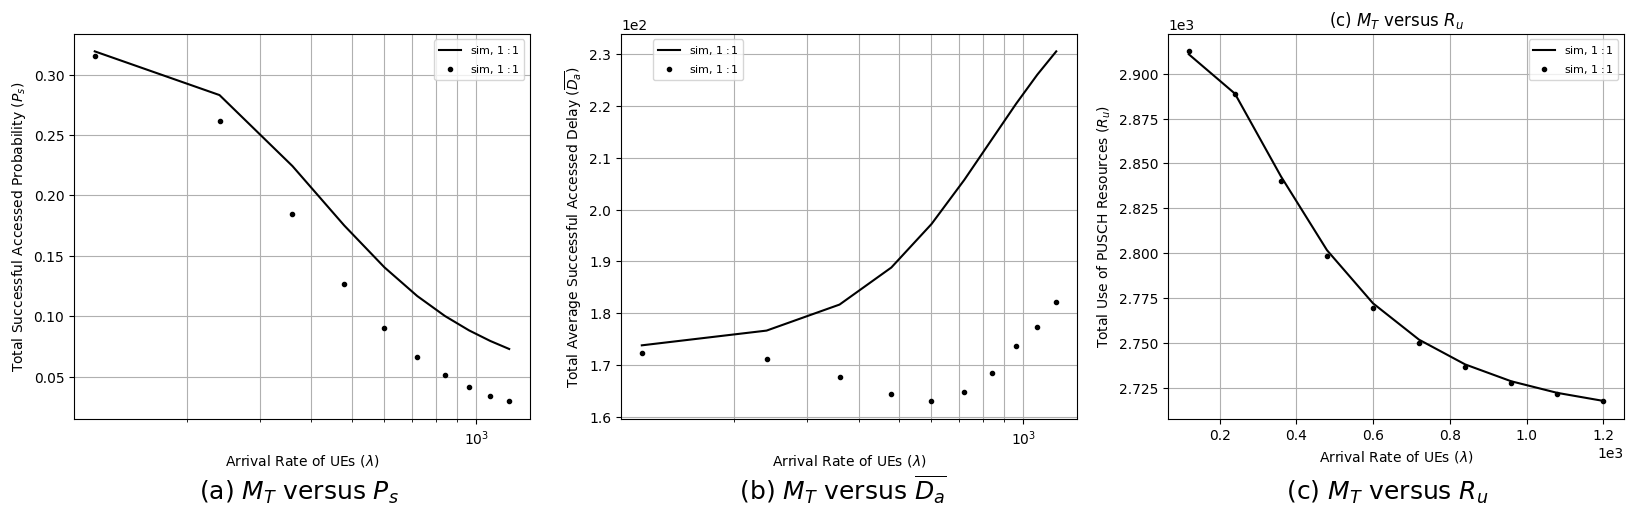

In [117]:
plt.subplot(131)
plt.plot(sim.M_4SRA+sim.M_2SRA, ana.Ps_T, '-', color = 'black', label = 'sim, $1:1$')
plt.plot(sim.M_4SRA+sim.M_2SRA, sim.Ps_T, 'o', ms = 3, color = 'black', label = 'sim, $1:1$')
plt.xscale('log')
plt.xlabel("Arrival Rate of UEs ($\lambda$)")
plt.ylabel("Total Successful Accessed Probability ($P_s$)")
# plt.title("(a) $M_T$ versus $P_s$")
# plt.suptitle("(a) $M_T$ versus $P_s$", fontsize=18, x=0.23, y=0.0)
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(1, 1))

plt.subplot(132)
plt.plot(sim.M_4SRA+sim.M_2SRA, ana.Da_T, '-', color = 'black', label = 'sim, $1:1$')
plt.plot(sim.M_4SRA+sim.M_2SRA, sim.Da_T, 'o', ms = 3, color = 'black', label = 'sim, $1:1$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 0))
plt.xscale('log')
plt.xlabel("Arrival Rate of UEs ($\lambda$)")
plt.ylabel("Total Average Successful Accessed Delay ($\overline{D_{a}}$)")
# plt.title("(b) $M_T$ versus $\overline{D_{a}}$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(0.28, 1))

plt.subplot(133)
plt.plot(sim.M_4SRA+sim.M_2SRA, ana.Ur_PUSCH_T, '-', color = 'black', label = 'sim, $1:1$')
plt.plot(sim.M_4SRA+sim.M_2SRA, sim.Ur_PUSCH_T, 'o', ms = 3, color = 'black', label = 'sim, $1:1$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 3))
# plt.xscale('log')
plt.xlabel("Arrival Rate of UEs ($\lambda$)")
plt.ylabel("Total Use of PUSCH Resources ($R_u$)")
plt.title("(c) $M_T$ versus $R_u$")
plt.grid(True, which="both")

plt.suptitle("(a) $M_T$ versus $P_s$                                           (b) $M_T$ versus $\overline{D_{a}}$                                           (c) $M_T$ versus $R_u$", fontsize=18, x=0.51, y=0.0)


plt.legend(markerscale=1, fontsize=8, loc='best')
plt.rcParams["figure.figsize"] = (20, 5)
plt.show()

## **Plotting Figures**

In [33]:
ana = pandas.read_csv('ana_testresult.csv')
sim = pandas.read_csv('sim_testresult.csv')
ana

M_4SRA  N_4SRA  wrar_4SRA  wbo_4SRA  rts_4SRA     Ms_4SRA   Ps_4SRA  \
0     60.0      27          5        20         5   59.999396  0.999990   
1    120.0      27          5        20         5  119.902099  0.999184   
2    180.0      27          5        20         5  173.854072  0.965856   
3    240.0      27          5        20         5  182.124108  0.758850   
4    300.0      27          5        20         5  137.442431  0.458141   
..     ...     ...        ...       ...       ...         ...       ...   
95  5760.0      27          5        20         5  255.907367  0.044428   
96  5820.0      27          5        20         5  258.573051  0.044428   
97  5880.0      27          5        20         5  261.238736  0.044428   
98  5940.0      27          5        20         5  263.904420  0.044428   
99  6000.0      27          5        20         5  266.570105  0.044428   

          Da_4SRA  Ur_PRACH_4SRA  Ur_PUSCH_4SRA  ...     Ps_FB       Da_FB  \
0    26751.870263       0.000009      59.999396  ...  1.000000  148.002807   
1    26787.359967       0.000019     119.902099  ...  1.000000  160.665035   
2    27721.329191       0.000027     173.854072  ...  1.000000  174.036226   
3    35257.117909       0.000028     182.124108  ...  0.999994  120.573886   
4    58309.266886       0.000021     137.442431  ...  0.995660  148.662978   
..            ...            ...            ...  ...       ...         ...   
95  600028.111102       0.000039     255.907367  ...  0.006532  271.883157   
96  600028.152251       0.000040     258.573051  ...  0.006454  271.966838   
97  600028.190263       0.000040     261.238736  ...  0.006377  272.049447   
98  600028.229781       0.000041     263.904420  ...  0.006302  272.131022   
99  600028.266257       0.000041     266.570105  ...  0.006229  272.211581   

    Ur_PRACH_FB  Ur_PUSCH_FB        Ms_T      Ps_T      Da_2SRA_T  \
0      0.000000     0.000026  119.998818  0.999990   26725.858746   
1      0.000000     0.096017  239.900943  0.999587   26739.913073   
2      0.000001     5.560206  353.852339  0.982923   26755.733234   
3      0.000007    44.890448  422.121516  0.879420   26765.831170   
4      0.000019   123.444783  436.901478  0.728169   26831.065198   
..          ...          ...         ...       ...            ...   
95     0.000006    35.800083  570.882455  0.049556  487527.142967   
96     0.000006    35.741206  576.103114  0.049493  488641.323247   
97     0.000006    35.683172  581.325368  0.049432  489735.278446   
98     0.000005    35.625958  586.549173  0.049373  490809.536995   
99     0.000005    35.569544  591.774491  0.049315  491864.608803   

             Da_T  Ur_PUSCH_4SRA_T    Ur_PUSCH_T  
0    26738.864502         0.000009  6.480060e+06  
1    26763.626953         0.000019  6.480120e+06  
2    27230.148041         0.000028  6.480179e+06  
3    30429.392407         0.000035  6.480227e+06  
4    36733.619392         0.000040  6.480261e+06  
..            ...              ...           ...  
95  537957.535928         0.000045  6.480292e+06  
96  538635.207184         0.000046  6.480294e+06  
97  539299.227413         0.000046  6.480297e+06  
98  539949.996311         0.000046  6.480300e+06  
99  540587.894385         0.000046  6.480302e+06  

[100 rows x 34 columns]

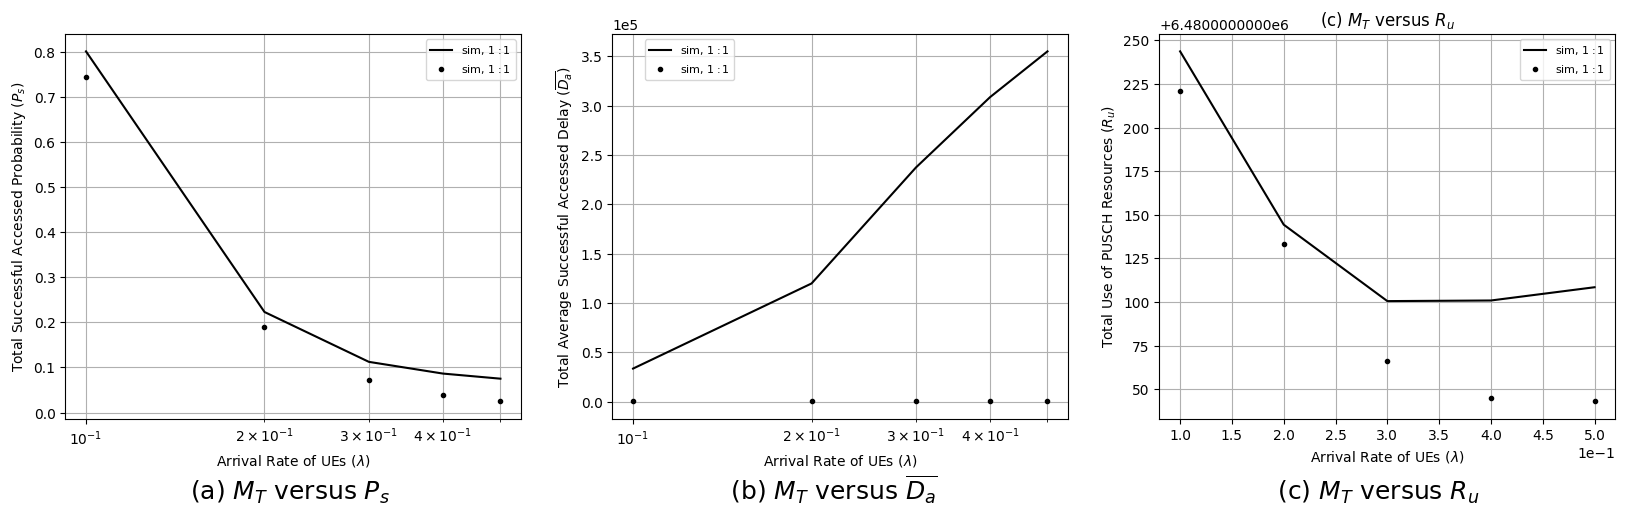

In [23]:
plt.subplot(131)
plt.plot(arrival_rate, ana.Ps_T, '-', color = 'black', label = 'sim, $1:1$')
plt.plot(arrival_rate, sim.Ps_T, 'o', ms = 3, color = 'black', label = 'sim, $1:1$')
plt.xscale('log')
plt.xlabel("Arrival Rate of UEs ($\lambda$)")
plt.ylabel("Total Successful Accessed Probability ($P_s$)")
# plt.title("(a) $M_T$ versus $P_s$")
# plt.suptitle("(a) $M_T$ versus $P_s$", fontsize=18, x=0.23, y=0.0)
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(1, 1))

plt.subplot(132)
plt.plot(arrival_rate, ana.Da_T, '-', color = 'black', label = 'sim, $1:1$')
plt.plot(arrival_rate, sim.Da_T, 'o', ms = 3, color = 'black', label = 'sim, $1:1$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 0))
plt.xscale('log')
plt.xlabel("Arrival Rate of UEs ($\lambda$)")
plt.ylabel("Total Average Successful Accessed Delay ($\overline{D_{a}}$)")
# plt.title("(b) $M_T$ versus $\overline{D_{a}}$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(0.28, 1))

plt.subplot(133)
plt.plot(arrival_rate, ana.Ur_PUSCH_T, '-', color = 'black', label = 'sim, $1:1$')
plt.plot(arrival_rate, sim.Ur_PUSCH_T, 'o', ms = 3, color = 'black', label = 'sim, $1:1$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 3))
# plt.xscale('log')
plt.xlabel("Arrival Rate of UEs ($\lambda$)")
plt.ylabel("Total Use of PUSCH Resources ($R_u$)")
plt.title("(c) $M_T$ versus $R_u$")
plt.grid(True, which="both")

plt.suptitle("(a) $M_T$ versus $P_s$                                           (b) $M_T$ versus $\overline{D_{a}}$                                           (c) $M_T$ versus $R_u$", fontsize=18, x=0.51, y=0.0)


plt.legend(markerscale=1, fontsize=8, loc='best')
plt.rcParams["figure.figsize"] = (20, 5)
plt.show()

## **Plotting Figures 0**

In [90]:
ana_m_1 = pandas.read_csv('ana_testresult_m_1.csv')
# sim_m_1 = pandas.read_csv('sim_testresult_m_1.csv')
ana_m_2 = pandas.read_csv('ana_testresult_m_2.csv')
ana_m_3 = pandas.read_csv('ana_testresult_m_3.csv')

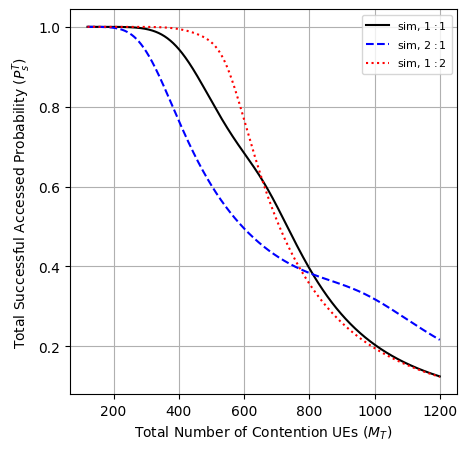

In [97]:
# plt.plot(ana_m_1.M_4SRA+ana_m_1.M_2SRA, ana_m_1.Ms_T, '-', color = 'black', label = 'ana, $S^T$, $m_{4s}:m_{2s}=1:1$')
# plt.plot(ana_m_2.M_4SRA+ana_m_2.M_2SRA, ana_m_2.Ms_T, '-', color = 'blue', label = 'ana, $S^T$, $m_{4s}:m_{2s}=2:1$')
# plt.plot(ana_m_3.M_4SRA+ana_m_3.M_2SRA, ana_m_3.Ms_T, '-', color = 'red', label = 'ana, $S^T$, $m_{4s}:m_{2s}=1:2$')

# plt.subplot(221)
plt.plot(ana_m_1.M_4SRA+ana_m_1.M_2SRA, ana_m_1.Ps_T, '-', color = 'black', label = 'sim, $1:1$')
# plt.plot(sim_m_1.M_4SRA+sim_m_1.M_2SRA, sim_m_1.Ps_T, '-', color = 'black')
plt.plot(ana_m_2.M_4SRA+ana_m_2.M_2SRA, ana_m_2.Ps_T, '--', color = 'blue', label = 'sim, $2:1$')
plt.plot(ana_m_3.M_4SRA+ana_m_3.M_2SRA, ana_m_3.Ps_T, ':', color = 'red', label = 'sim, $1:2$')
# plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("Total Successful Accessed Probability ($P_s^T$)")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(1, 1))
plt.rcParams["figure.figsize"] = (5, 5)
plt.show()

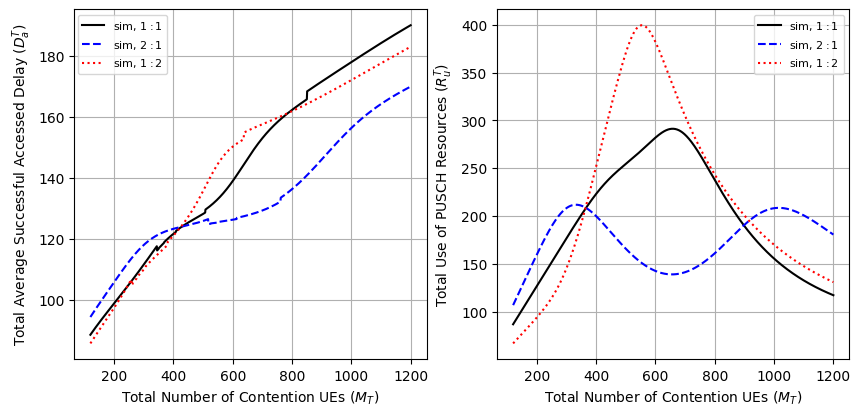

In [108]:
plt.subplot(221)
plt.plot(ana_m_1.M_4SRA+ana_m_1.M_2SRA, ana_m_1.Da_T, '-', color = 'black', label = 'sim, $1:1$')
# plt.plot(sim_m_1.M_4SRA+sim_m_1.M_2SRA, sim_m_1.Da_T, '-', color = 'black')
plt.plot(ana_m_2.M_4SRA+ana_m_2.M_2SRA, ana_m_2.Da_T, '--', color = 'blue', label = 'sim, $2:1$')
plt.plot(ana_m_3.M_4SRA+ana_m_3.M_2SRA, ana_m_3.Da_T, ':', color = 'red', label = 'sim, $1:2$')
# plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("Total Average Successful Accessed Delay ($D_a^T$)")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(0.28, 1))

plt.subplot(222)
plt.plot(ana_m_1.M_4SRA+ana_m_1.M_2SRA, ana_m_1.Ur_PUSCH_T, '-', color = 'black', label = 'sim, $1:1$')
# plt.plot(sim_m_1.M_4SRA+sim_m_1.M_2SRA, sim_m_1.Ur_PUSCH_T, '-', color = 'black', label = 'sim, $1:1$')
plt.plot(ana_m_2.M_4SRA+ana_m_2.M_2SRA, ana_m_2.Ur_PUSCH_T, '--', color = 'blue', label = 'sim, $2:1$')
plt.plot(ana_m_3.M_4SRA+ana_m_3.M_2SRA, ana_m_3.Ur_PUSCH_T, ':', color = 'red', label = 'sim, $1:2$')
# plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("Total Use of PUSCH Resources ($R_u^T$)")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(1, 1))
plt.rcParams["figure.figsize"] = (10, 10)
plt.show()

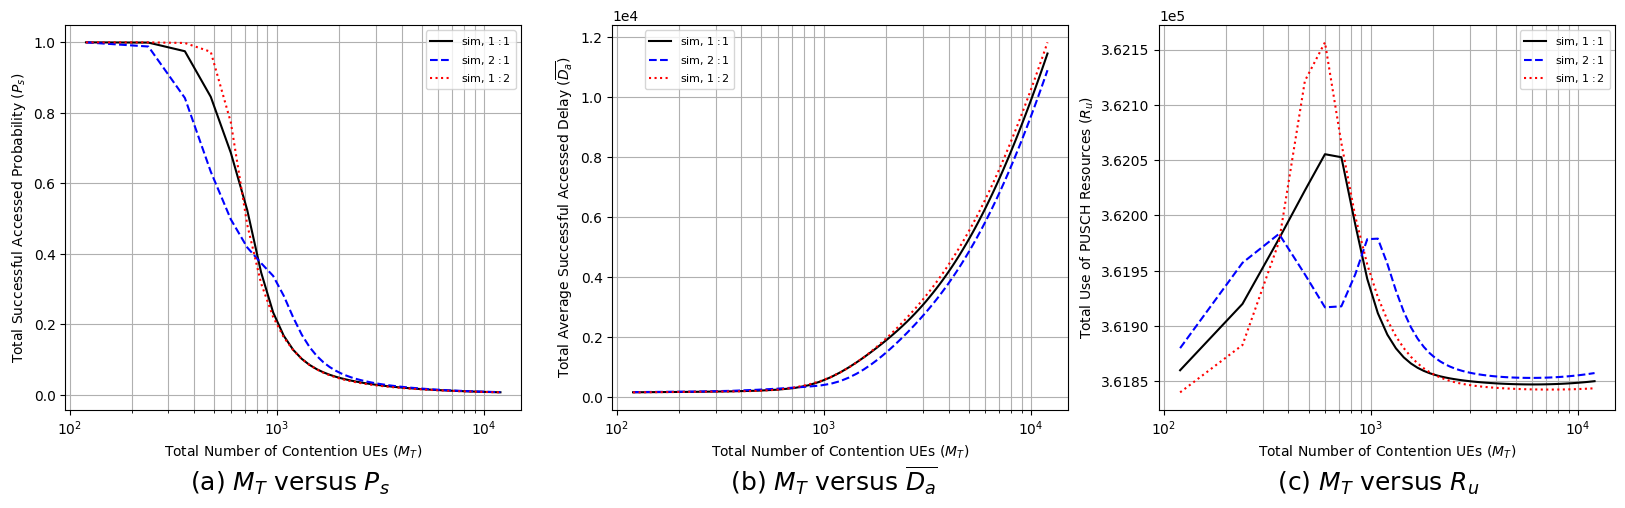

In [105]:
plt.subplot(131)
plt.plot(ana_m_1.M_4SRA+ana_m_1.M_2SRA, ana_m_1.Ps_T, '-', color = 'black', label = 'sim, $1:1$')
# plt.plot(sim_m_1.M_4SRA+sim_m_1.M_2SRA, sim_m_1.Ps_T, '-', color = 'black')
plt.plot(ana_m_2.M_4SRA+ana_m_2.M_2SRA, ana_m_2.Ps_T, '--', color = 'blue', label = 'sim, $2:1$')
plt.plot(ana_m_3.M_4SRA+ana_m_3.M_2SRA, ana_m_3.Ps_T, ':', color = 'red', label = 'sim, $1:2$')
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("Total Successful Accessed Probability ($P_s$)")
# plt.title("(a) $M_T$ versus $P_s$")
# plt.suptitle("(a) $M_T$ versus $P_s$", fontsize=18, x=0.23, y=0.0)
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(1, 1))

plt.subplot(132)
plt.plot(ana_m_1.M_4SRA+ana_m_1.M_2SRA, ana_m_1.Da_T, '-', color = 'black', label = 'sim, $1:1$')
# plt.plot(sim_m_1.M_4SRA+sim_m_1.M_2SRA, sim_m_1.Da_T, '-', color = 'black')
plt.plot(ana_m_2.M_4SRA+ana_m_2.M_2SRA, ana_m_2.Da_T, '--', color = 'blue', label = 'sim, $2:1$')
plt.plot(ana_m_3.M_4SRA+ana_m_3.M_2SRA, ana_m_3.Da_T, ':', color = 'red', label = 'sim, $1:2$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 0))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("Total Average Successful Accessed Delay ($\overline{D_{a}}$)")
# plt.title("(b) $M_T$ versus $\overline{D_{a}}$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(0.28, 1))

plt.subplot(133)
plt.plot(ana_m_1.M_4SRA+ana_m_1.M_2SRA, ana_m_1.Ur_PUSCH_T, '-', color = 'black', label = 'sim, $1:1$')
# plt.plot(sim_m_1.M_4SRA+sim_m_1.M_2SRA, sim_m_1.Ur_PUSCH_T, '-', color = 'black', label = 'sim, $1:1$')
plt.plot(ana_m_2.M_4SRA+ana_m_2.M_2SRA, ana_m_2.Ur_PUSCH_T, '--', color = 'blue', label = 'sim, $2:1$')
plt.plot(ana_m_3.M_4SRA+ana_m_3.M_2SRA, ana_m_3.Ur_PUSCH_T, ':', color = 'red', label = 'sim, $1:2$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 3))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("Total Use of PUSCH Resources ($R_u$)")
# plt.title("(c) $M_T$ versus $R_u$")
plt.grid(True, which="both")

plt.suptitle("(a) $M_T$ versus $P_s$                                           (b) $M_T$ versus $\overline{D_{a}}$                                           (c) $M_T$ versus $R_u$", fontsize=18, x=0.51, y=0.0)


plt.legend(markerscale=1, fontsize=8, loc='best')
plt.rcParams["figure.figsize"] = (20, 5)
plt.show()

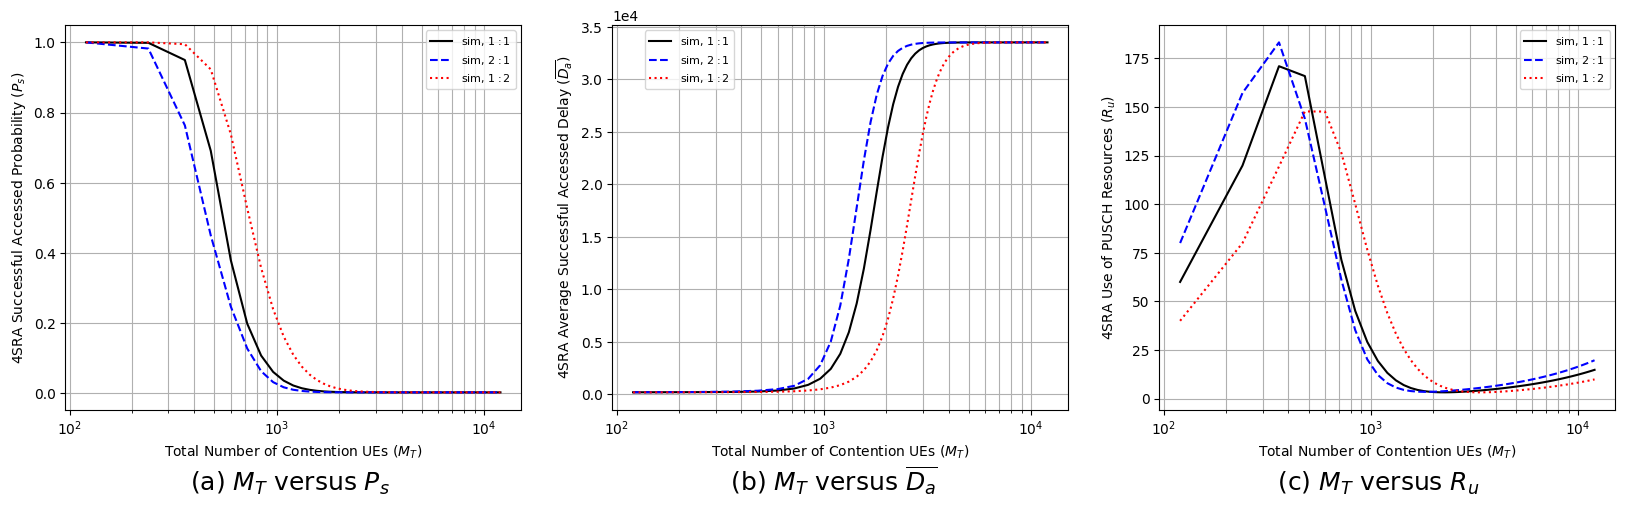

In [106]:
plt.subplot(131)
plt.plot(ana_m_1.M_4SRA+ana_m_1.M_2SRA, ana_m_1.Ps_4SRA, '-', color = 'black', label = 'sim, $1:1$')
plt.plot(ana_m_2.M_4SRA+ana_m_2.M_2SRA, ana_m_2.Ps_4SRA, '--', color = 'blue', label = 'sim, $2:1$')
plt.plot(ana_m_3.M_4SRA+ana_m_3.M_2SRA, ana_m_3.Ps_4SRA, ':', color = 'red', label = 'sim, $1:2$')
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("4SRA Successful Accessed Probability ($P_s$)")
# plt.title("(a) $M_T$ versus $P_s$")
# plt.suptitle("(a) $M_T$ versus $P_s$", fontsize=18, x=0.23, y=0.0)
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(1, 1))

plt.subplot(132)
plt.plot(ana_m_1.M_4SRA+ana_m_1.M_2SRA, ana_m_1.Da_4SRA, '-', color = 'black', label = 'sim, $1:1$')
plt.plot(ana_m_2.M_4SRA+ana_m_2.M_2SRA, ana_m_2.Da_4SRA, '--', color = 'blue', label = 'sim, $2:1$')
plt.plot(ana_m_3.M_4SRA+ana_m_3.M_2SRA, ana_m_3.Da_4SRA, ':', color = 'red', label = 'sim, $1:2$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 0))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("4SRA Average Successful Accessed Delay ($\overline{D_{a}}$)")
# plt.title("(b) $M_T$ versus $\overline{D_{a}}$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(0.28, 1))

plt.subplot(133)
plt.plot(ana_m_1.M_4SRA+ana_m_1.M_2SRA, ana_m_1.Ur_PUSCH_4SRA, '-', color = 'black', label = 'sim, $1:1$')
plt.plot(ana_m_2.M_4SRA+ana_m_2.M_2SRA, ana_m_2.Ur_PUSCH_4SRA, '--', color = 'blue', label = 'sim, $2:1$')
plt.plot(ana_m_3.M_4SRA+ana_m_3.M_2SRA, ana_m_3.Ur_PUSCH_4SRA, ':', color = 'red', label = 'sim, $1:2$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 3))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("4SRA Use of PUSCH Resources ($R_u$)")
# plt.title("(c) $M_T$ versus $R_u$")
plt.grid(True, which="both")

plt.suptitle("(a) $M_T$ versus $P_s$                                           (b) $M_T$ versus $\overline{D_{a}}$                                           (c) $M_T$ versus $R_u$", fontsize=18, x=0.51, y=0.0)


plt.legend(markerscale=1, fontsize=8, loc='best')
plt.rcParams["figure.figsize"] = (20, 5)
plt.show()

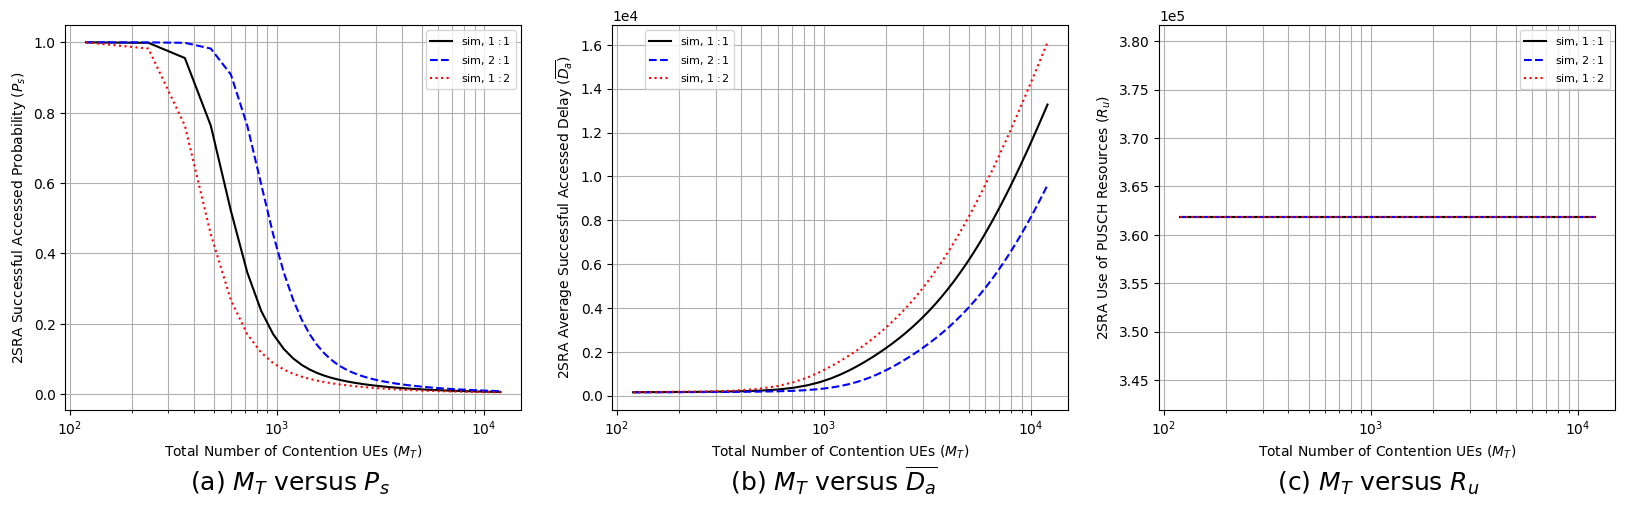

In [107]:
plt.subplot(131)
plt.plot(ana_m_1.M_4SRA+ana_m_1.M_2SRA, ana_m_1.Ps_2SRA, '-', color = 'black', label = 'sim, $1:1$')
plt.plot(ana_m_2.M_4SRA+ana_m_2.M_2SRA, ana_m_2.Ps_2SRA, '--', color = 'blue', label = 'sim, $2:1$')
plt.plot(ana_m_3.M_4SRA+ana_m_3.M_2SRA, ana_m_3.Ps_2SRA, ':', color = 'red', label = 'sim, $1:2$')
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("2SRA Successful Accessed Probability ($P_s$)")
# plt.title("(a) $M_T$ versus $P_s$")
# plt.suptitle("(a) $M_T$ versus $P_s$", fontsize=18, x=0.23, y=0.0)
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(1, 1))

plt.subplot(132)
plt.plot(ana_m_1.M_4SRA+ana_m_1.M_2SRA, ana_m_1.Da_2SRA, '-', color = 'black', label = 'sim, $1:1$')
plt.plot(ana_m_2.M_4SRA+ana_m_2.M_2SRA, ana_m_2.Da_2SRA, '--', color = 'blue', label = 'sim, $2:1$')
plt.plot(ana_m_3.M_4SRA+ana_m_3.M_2SRA, ana_m_3.Da_2SRA, ':', color = 'red', label = 'sim, $1:2$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 0))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("2SRA Average Successful Accessed Delay ($\overline{D_{a}}$)")
# plt.title("(b) $M_T$ versus $\overline{D_{a}}$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(0.28, 1))

plt.subplot(133)
plt.plot(ana_m_1.M_4SRA+ana_m_1.M_2SRA, ana_m_1.Ur_PUSCH_2SRA, '-', color = 'black', label = 'sim, $1:1$')
plt.plot(ana_m_2.M_4SRA+ana_m_2.M_2SRA, ana_m_2.Ur_PUSCH_2SRA, '--', color = 'blue', label = 'sim, $2:1$')
plt.plot(ana_m_3.M_4SRA+ana_m_3.M_2SRA, ana_m_3.Ur_PUSCH_2SRA, ':', color = 'red', label = 'sim, $1:2$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 3))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("2SRA Use of PUSCH Resources ($R_u$)")
# plt.title("(c) $M_T$ versus $R_u$")
plt.grid(True, which="both")

plt.suptitle("(a) $M_T$ versus $P_s$                                           (b) $M_T$ versus $\overline{D_{a}}$                                           (c) $M_T$ versus $R_u$", fontsize=18, x=0.51, y=0.0)


plt.legend(markerscale=1, fontsize=8, loc='best')
plt.rcParams["figure.figsize"] = (20, 5)
plt.show()

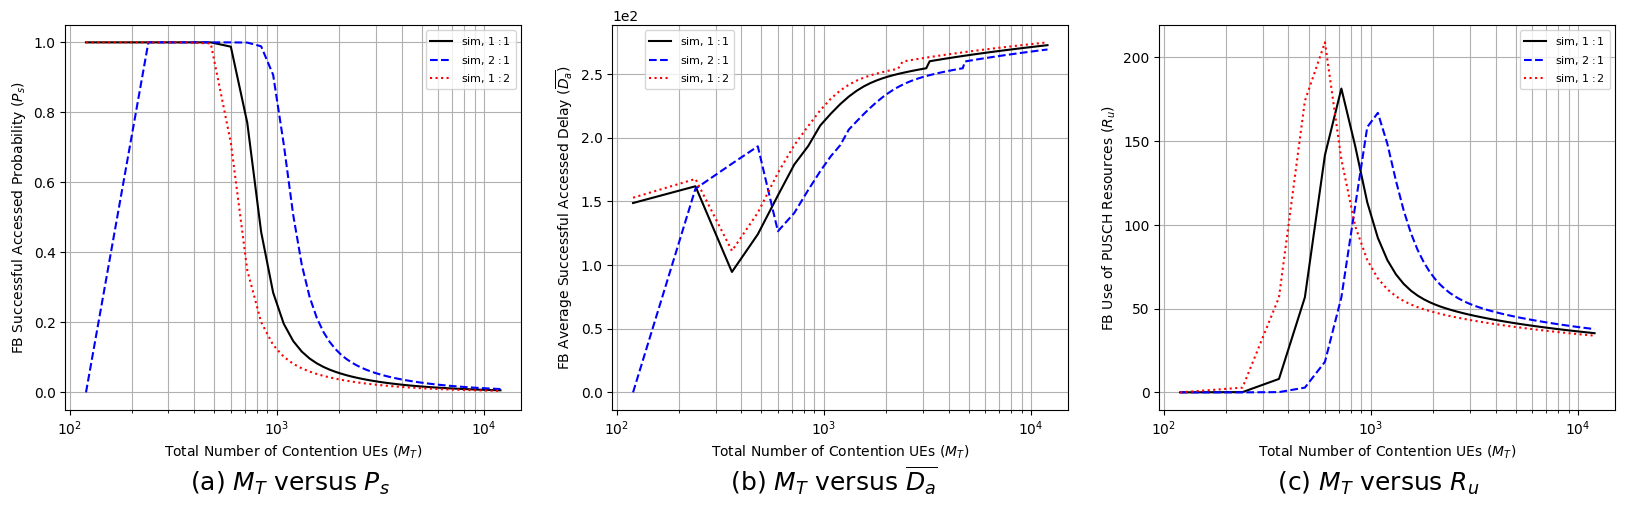

In [108]:
plt.subplot(131)
plt.plot(ana_m_1.M_4SRA+ana_m_1.M_2SRA, ana_m_1.Ps_FB, '-', color = 'black', label = 'sim, $1:1$')
plt.plot(ana_m_2.M_4SRA+ana_m_2.M_2SRA, ana_m_2.Ps_FB, '--', color = 'blue', label = 'sim, $2:1$')
plt.plot(ana_m_3.M_4SRA+ana_m_3.M_2SRA, ana_m_3.Ps_FB, ':', color = 'red', label = 'sim, $1:2$')
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("FB Successful Accessed Probability ($P_s$)")
# plt.title("(a) $M_T$ versus $P_s$")
# plt.suptitle("(a) $M_T$ versus $P_s$", fontsize=18, x=0.23, y=0.0)
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(1, 1))

plt.subplot(132)
plt.plot(ana_m_1.M_4SRA+ana_m_1.M_2SRA, ana_m_1.Da_FB, '-', color = 'black', label = 'sim, $1:1$')
plt.plot(ana_m_2.M_4SRA+ana_m_2.M_2SRA, ana_m_2.Da_FB, '--', color = 'blue', label = 'sim, $2:1$')
plt.plot(ana_m_3.M_4SRA+ana_m_3.M_2SRA, ana_m_3.Da_FB, ':', color = 'red', label = 'sim, $1:2$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 0))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("FB Average Successful Accessed Delay ($\overline{D_{a}}$)")
# plt.title("(b) $M_T$ versus $\overline{D_{a}}$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(0.28, 1))

plt.subplot(133)
plt.plot(ana_m_1.M_4SRA+ana_m_1.M_2SRA, ana_m_1.Ur_PUSCH_FB, '-', color = 'black', label = 'sim, $1:1$')
plt.plot(ana_m_2.M_4SRA+ana_m_2.M_2SRA, ana_m_2.Ur_PUSCH_FB, '--', color = 'blue', label = 'sim, $2:1$')
plt.plot(ana_m_3.M_4SRA+ana_m_3.M_2SRA, ana_m_3.Ur_PUSCH_FB, ':', color = 'red', label = 'sim, $1:2$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 3))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("FB Use of PUSCH Resources ($R_u$)")
# plt.title("(c) $M_T$ versus $R_u$")
plt.grid(True, which="both")

plt.suptitle("(a) $M_T$ versus $P_s$                                           (b) $M_T$ versus $\overline{D_{a}}$                                           (c) $M_T$ versus $R_u$", fontsize=18, x=0.51, y=0.0)


plt.legend(markerscale=1, fontsize=8, loc='best')
plt.rcParams["figure.figsize"] = (20, 5)
plt.show()

In [14]:
ana_N_1 = pandas.read_csv('ana_testresult_N_1.csv')
ana_N_2 = pandas.read_csv('ana_testresult_N_2.csv')
ana_N_3 = pandas.read_csv('ana_testresult_N_3.csv')
ana_N_4 = pandas.read_csv('ana_testresult_N_4.csv')
ana_N_5 = pandas.read_csv('ana_testresult_N_5.csv')

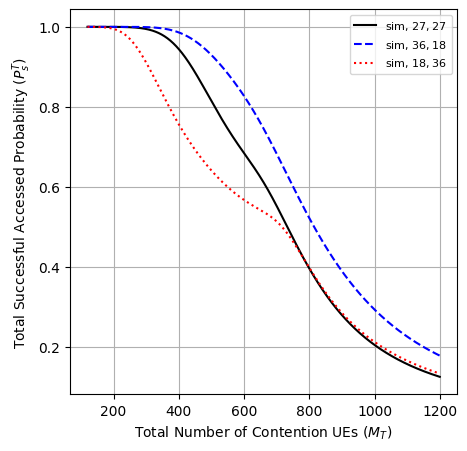

In [91]:
# plt.subplot(131)
plt.plot(ana_N_1.M_4SRA+ana_N_1.M_2SRA, ana_N_1.Ps_T, '-', color = 'black', label = 'sim, $27, 27$')
plt.plot(ana_N_2.M_4SRA+ana_N_2.M_2SRA, ana_N_2.Ps_T, '--', color = 'blue', label = 'sim, $36, 18$')
plt.plot(ana_N_3.M_4SRA+ana_N_3.M_2SRA, ana_N_3.Ps_T, ':', color = 'red', label = 'sim, $18, 36$')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("Total Successful Accessed Probability ($P_s^T$)")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(1, 1))
plt.rcParams["figure.figsize"] = (5, 5)
plt.show()

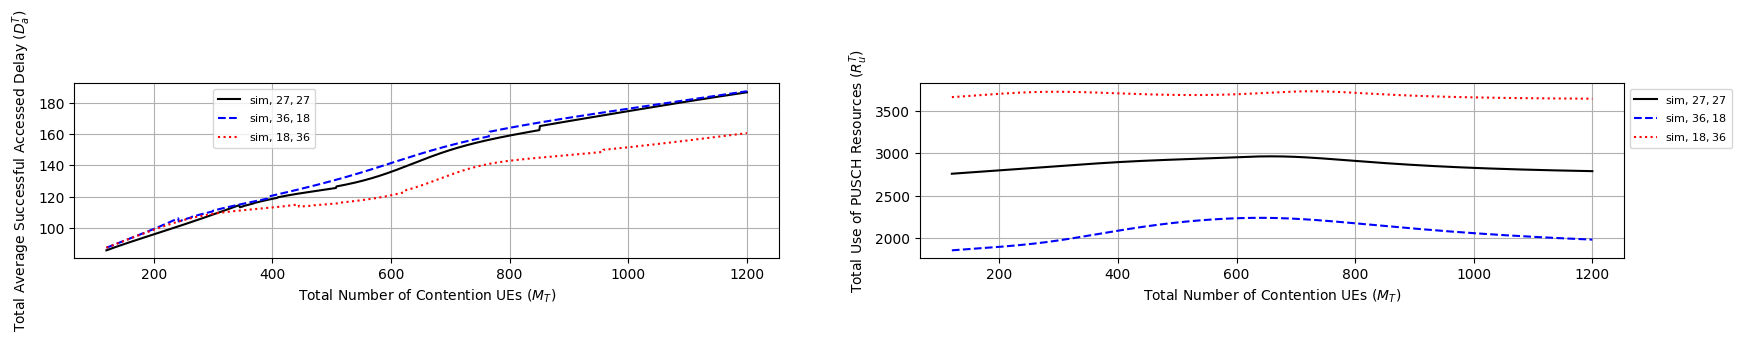

In [170]:
plt.subplot(221)
plt.plot(ana_N_1.M_4SRA+ana_N_1.M_2SRA, ana_N_1.Da_T, '-', color = 'black', label = 'sim, $27, 27$')
plt.plot(ana_N_2.M_4SRA+ana_N_2.M_2SRA, ana_N_2.Da_T, '--', color = 'blue', label = 'sim, $36, 18$')
plt.plot(ana_N_3.M_4SRA+ana_N_3.M_2SRA, ana_N_3.Da_T, ':', color = 'red', label = 'sim, $18, 36$')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("Total Average Successful Accessed Delay ($D_a^T$)")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(0.35, 1))

plt.subplot(222)
plt.plot(ana_N_1.M_4SRA+ana_N_1.M_2SRA, ana_N_1.Ur_PUSCH_T, '-', color = 'black', label = 'sim, $27, 27$')
plt.plot(ana_N_2.M_4SRA+ana_N_2.M_2SRA, ana_N_2.Ur_PUSCH_T, '--', color = 'blue', label = 'sim, $36, 18$')
plt.plot(ana_N_3.M_4SRA+ana_N_3.M_2SRA, ana_N_3.Ur_PUSCH_T, ':', color = 'red', label = 'sim, $18, 36$')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("Total Use of PUSCH Resources ($R_u^T$)")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(1, 1))
plt.rcParams["figure.figsize"] = (10, 10)
plt.show()

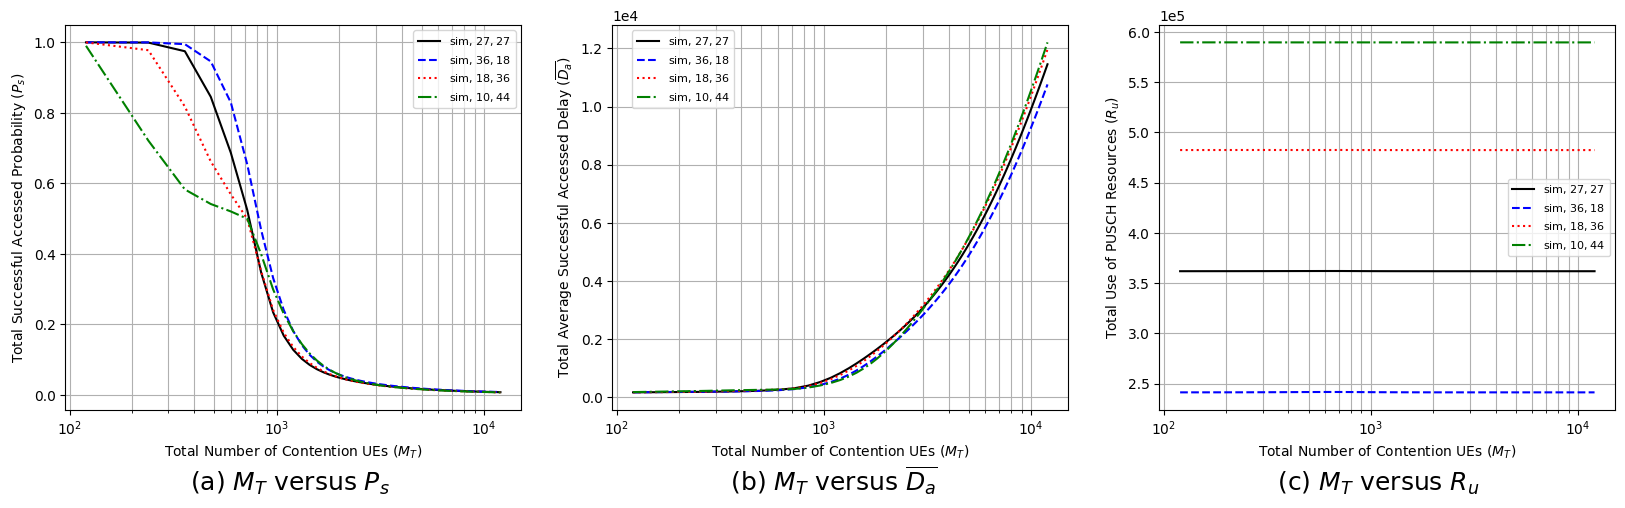

In [21]:
plt.subplot(131)
plt.plot(ana_N_1.M_4SRA+ana_N_1.M_2SRA, ana_N_1.Ps_T, '-', color = 'black', label = 'sim, $27, 27$')
# plt.plot(ana_N_4.M_4SRA+ana_N_4.M_2SRA, ana_N_4.Ps_T, '', color = 'orange', label = 'sim, $44, 10$')
plt.plot(ana_N_2.M_4SRA+ana_N_2.M_2SRA, ana_N_2.Ps_T, '--', color = 'blue', label = 'sim, $36, 18$')
plt.plot(ana_N_3.M_4SRA+ana_N_3.M_2SRA, ana_N_3.Ps_T, ':', color = 'red', label = 'sim, $18, 36$')
plt.plot(ana_N_5.M_4SRA+ana_N_5.M_2SRA, ana_N_5.Ps_T, '-.', color = 'green', label = 'sim, $10, 44$')
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("Total Successful Accessed Probability ($P_s$)")
# plt.title("(a) $M_T$ versus $P_s$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(1, 1))

plt.subplot(132)
plt.plot(ana_N_1.M_4SRA+ana_N_1.M_2SRA, ana_N_1.Da_T, '-', color = 'black', label = 'sim, $27, 27$')
# plt.plot(ana_N_4.M_4SRA+ana_N_4.M_2SRA, ana_N_4.Da_T, '', color = 'orange', label = 'sim, $44, 10$')
plt.plot(ana_N_2.M_4SRA+ana_N_2.M_2SRA, ana_N_2.Da_T, '--', color = 'blue', label = 'sim, $36, 18$')
plt.plot(ana_N_3.M_4SRA+ana_N_3.M_2SRA, ana_N_3.Da_T, ':', color = 'red', label = 'sim, $18, 36$')
plt.plot(ana_N_5.M_4SRA+ana_N_5.M_2SRA, ana_N_5.Da_T, '-.', color = 'green', label = 'sim, $10, 44$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 0))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("Total Average Successful Accessed Delay ($\overline{D_{a}}$)")
# plt.title("(b) $M_T$ versus $\overline{D_{a}}$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(0.28, 1))

plt.subplot(133)
plt.plot(ana_N_1.M_4SRA+ana_N_1.M_2SRA, ana_N_1.Ur_PUSCH_T, '-', color = 'black', label = 'sim, $27, 27$')
# plt.plot(ana_N_4.M_4SRA+ana_N_4.M_2SRA, ana_N_4.Ur_PUSCH_T, '', color = 'orange', label = 'sim, $44, 10$')
plt.plot(ana_N_2.M_4SRA+ana_N_2.M_2SRA, ana_N_2.Ur_PUSCH_T, '--', color = 'blue', label = 'sim, $36, 18$')
plt.plot(ana_N_3.M_4SRA+ana_N_3.M_2SRA, ana_N_3.Ur_PUSCH_T, ':', color = 'red', label = 'sim, $18, 36$')
plt.plot(ana_N_5.M_4SRA+ana_N_5.M_2SRA, ana_N_5.Ur_PUSCH_T, '-.', color = 'green', label = 'sim, $10, 44$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 3))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("Total Use of PUSCH Resources ($R_u$)")
# plt.title("(c) $M_T$ versus $R_u$")
plt.grid(True, which="both")

plt.suptitle("(a) $M_T$ versus $P_s$                                           (b) $M_T$ versus $\overline{D_{a}}$                                           (c) $M_T$ versus $R_u$", fontsize=18, x=0.51, y=0.0)

plt.legend(markerscale=1, fontsize=8, loc='best')
plt.rcParams["figure.figsize"] = (20, 5)
plt.show()

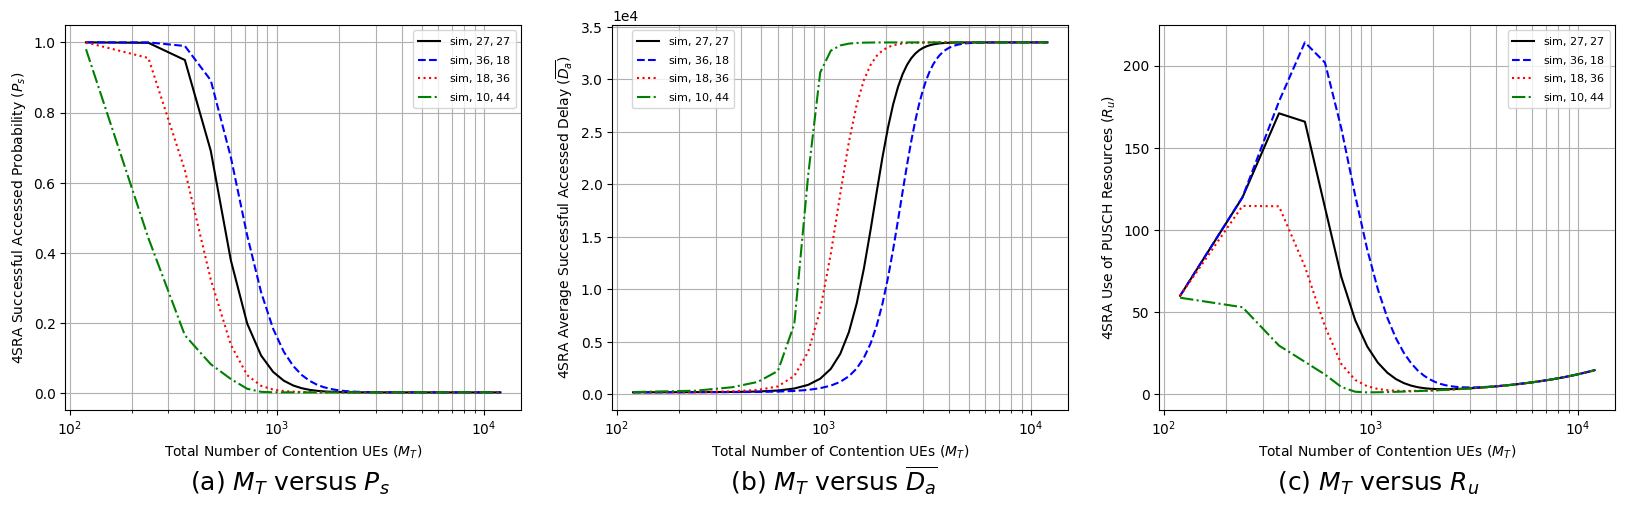

In [22]:
plt.subplot(131)
plt.plot(ana_N_1.M_4SRA+ana_N_1.M_2SRA, ana_N_1.Ps_4SRA, '-', color = 'black', label = 'sim, $27, 27$')
plt.plot(ana_N_2.M_4SRA+ana_N_2.M_2SRA, ana_N_2.Ps_4SRA, '--', color = 'blue', label = 'sim, $36, 18$')
plt.plot(ana_N_3.M_4SRA+ana_N_3.M_2SRA, ana_N_3.Ps_4SRA, ':', color = 'red', label = 'sim, $18, 36$')
plt.plot(ana_N_5.M_4SRA+ana_N_5.M_2SRA, ana_N_5.Ps_4SRA, '-.', color = 'green', label = 'sim, $10, 44$')
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("4SRA Successful Accessed Probability ($P_s$)")
# plt.title("(a) $M_T$ versus $P_s$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(1, 1))

plt.subplot(132)
plt.plot(ana_N_1.M_4SRA+ana_N_1.M_2SRA, ana_N_1.Da_4SRA, '-', color = 'black', label = 'sim, $27, 27$')
plt.plot(ana_N_2.M_4SRA+ana_N_2.M_2SRA, ana_N_2.Da_4SRA, '--', color = 'blue', label = 'sim, $36, 18$')
plt.plot(ana_N_3.M_4SRA+ana_N_3.M_2SRA, ana_N_3.Da_4SRA, ':', color = 'red', label = 'sim, $18, 36$')
plt.plot(ana_N_5.M_4SRA+ana_N_5.M_2SRA, ana_N_5.Da_4SRA, '-.', color = 'green', label = 'sim, $10, 44$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 0))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("4SRA Average Successful Accessed Delay ($\overline{D_{a}}$)")
# plt.title("(b) $M_T$ versus $\overline{D_{a}}$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(0.28, 1))

plt.subplot(133)
plt.plot(ana_N_1.M_4SRA+ana_N_1.M_2SRA, ana_N_1.Ur_PUSCH_4SRA, '-', color = 'black', label = 'sim, $27, 27$')
plt.plot(ana_N_2.M_4SRA+ana_N_2.M_2SRA, ana_N_2.Ur_PUSCH_4SRA, '--', color = 'blue', label = 'sim, $36, 18$')
plt.plot(ana_N_3.M_4SRA+ana_N_3.M_2SRA, ana_N_3.Ur_PUSCH_4SRA, ':', color = 'red', label = 'sim, $18, 36$')
plt.plot(ana_N_5.M_4SRA+ana_N_5.M_2SRA, ana_N_5.Ur_PUSCH_4SRA, '-.', color = 'green', label = 'sim, $10, 44$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 3))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("4SRA Use of PUSCH Resources ($R_u$)")
# plt.title("(c) $M_T$ versus $R_u$")
plt.grid(True, which="both")

plt.suptitle("(a) $M_T$ versus $P_s$                                           (b) $M_T$ versus $\overline{D_{a}}$                                           (c) $M_T$ versus $R_u$", fontsize=18, x=0.51, y=0.0)

plt.legend(markerscale=1, fontsize=8, loc='best')
plt.rcParams["figure.figsize"] = (20, 5)
plt.show()

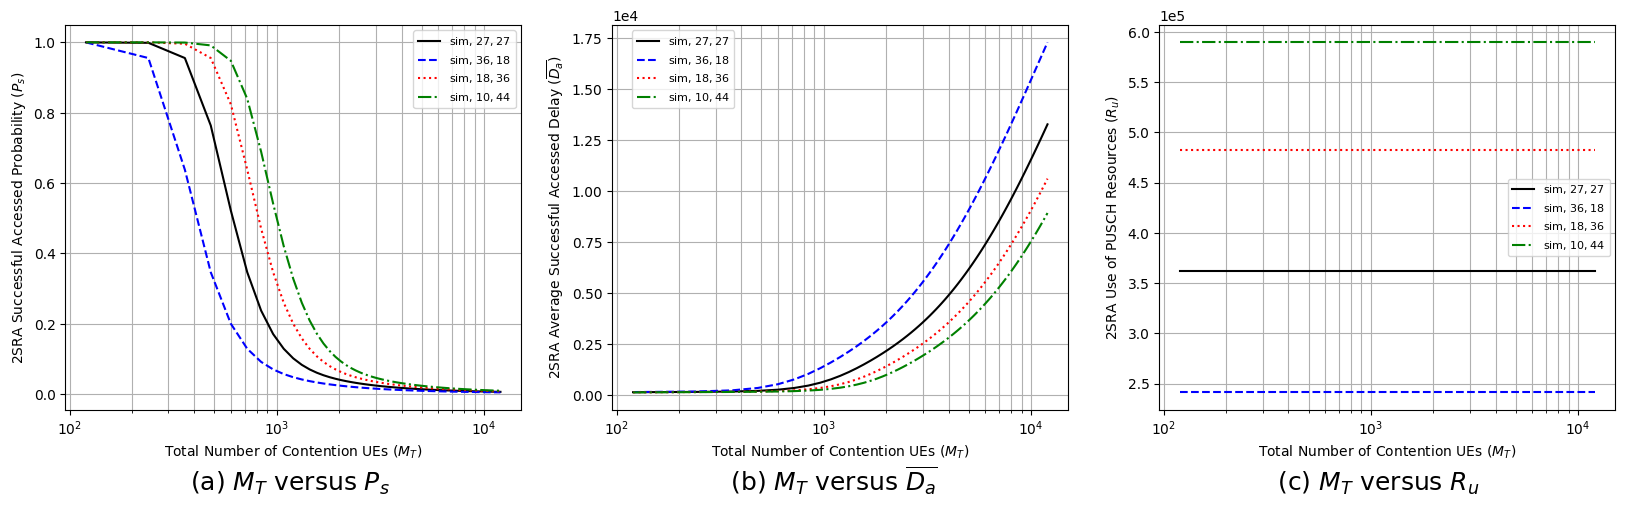

In [23]:
plt.subplot(131)
plt.plot(ana_N_1.M_4SRA+ana_N_1.M_2SRA, ana_N_1.Ps_2SRA, '-', color = 'black', label = 'sim, $27, 27$')
plt.plot(ana_N_2.M_4SRA+ana_N_2.M_2SRA, ana_N_2.Ps_2SRA, '--', color = 'blue', label = 'sim, $36, 18$')
plt.plot(ana_N_3.M_4SRA+ana_N_3.M_2SRA, ana_N_3.Ps_2SRA, ':', color = 'red', label = 'sim, $18, 36$')
plt.plot(ana_N_5.M_4SRA+ana_N_5.M_2SRA, ana_N_5.Ps_2SRA, '-.', color = 'green', label = 'sim, $10, 44$')
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("2SRA Successful Accessed Probability ($P_s$)")
# plt.title("(a) $M_T$ versus $P_s$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(1, 1))

plt.subplot(132)
plt.plot(ana_N_1.M_4SRA+ana_N_1.M_2SRA, ana_N_1.Da_2SRA, '-', color = 'black', label = 'sim, $27, 27$')
plt.plot(ana_N_2.M_4SRA+ana_N_2.M_2SRA, ana_N_2.Da_2SRA, '--', color = 'blue', label = 'sim, $36, 18$')
plt.plot(ana_N_3.M_4SRA+ana_N_3.M_2SRA, ana_N_3.Da_2SRA, ':', color = 'red', label = 'sim, $18, 36$')
plt.plot(ana_N_5.M_4SRA+ana_N_5.M_2SRA, ana_N_5.Da_2SRA, '-.', color = 'green', label = 'sim, $10, 44$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 0))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("2SRA Average Successful Accessed Delay ($\overline{D_{a}}$)")
# plt.title("(b) $M_T$ versus $\overline{D_{a}}$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(0.28, 1))

plt.subplot(133)
plt.plot(ana_N_1.M_4SRA+ana_N_1.M_2SRA, ana_N_1.Ur_PUSCH_2SRA, '-', color = 'black', label = 'sim, $27, 27$')
plt.plot(ana_N_2.M_4SRA+ana_N_2.M_2SRA, ana_N_2.Ur_PUSCH_2SRA, '--', color = 'blue', label = 'sim, $36, 18$')
plt.plot(ana_N_3.M_4SRA+ana_N_3.M_2SRA, ana_N_3.Ur_PUSCH_2SRA, ':', color = 'red', label = 'sim, $18, 36$')
plt.plot(ana_N_5.M_4SRA+ana_N_5.M_2SRA, ana_N_5.Ur_PUSCH_2SRA, '-.', color = 'green', label = 'sim, $10, 44$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 3))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("2SRA Use of PUSCH Resources ($R_u$)")
# plt.title("(c) $M_T$ versus $R_u$")
plt.grid(True, which="both")

plt.suptitle("(a) $M_T$ versus $P_s$                                           (b) $M_T$ versus $\overline{D_{a}}$                                           (c) $M_T$ versus $R_u$", fontsize=18, x=0.51, y=0.0)

plt.legend(markerscale=1, fontsize=8, loc='best')
plt.rcParams["figure.figsize"] = (20, 5)
plt.show()

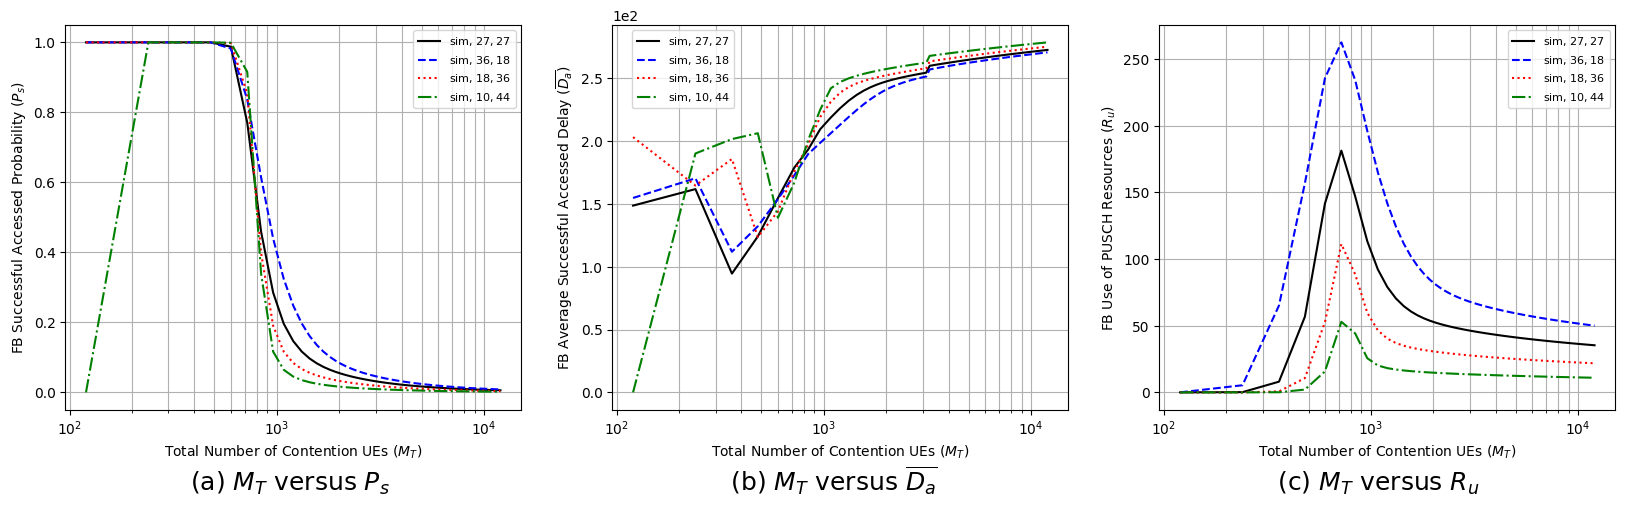

In [24]:
plt.subplot(131)
plt.plot(ana_N_1.M_4SRA+ana_N_1.M_2SRA, ana_N_1.Ps_FB, '-', color = 'black', label = 'sim, $27, 27$')
plt.plot(ana_N_2.M_4SRA+ana_N_2.M_2SRA, ana_N_2.Ps_FB, '--', color = 'blue', label = 'sim, $36, 18$')
plt.plot(ana_N_3.M_4SRA+ana_N_3.M_2SRA, ana_N_3.Ps_FB, ':', color = 'red', label = 'sim, $18, 36$')
plt.plot(ana_N_5.M_4SRA+ana_N_5.M_2SRA, ana_N_5.Ps_FB, '-.', color = 'green', label = 'sim, $10, 44$')
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("FB Successful Accessed Probability ($P_s$)")
# plt.title("(a) $M_T$ versus $P_s$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(1, 1))

plt.subplot(132)
plt.plot(ana_N_1.M_4SRA+ana_N_1.M_2SRA, ana_N_1.Da_FB, '-', color = 'black', label = 'sim, $27, 27$')
plt.plot(ana_N_2.M_4SRA+ana_N_2.M_2SRA, ana_N_2.Da_FB, '--', color = 'blue', label = 'sim, $36, 18$')
plt.plot(ana_N_3.M_4SRA+ana_N_3.M_2SRA, ana_N_3.Da_FB, ':', color = 'red', label = 'sim, $18, 36$')
plt.plot(ana_N_5.M_4SRA+ana_N_5.M_2SRA, ana_N_5.Da_FB, '-.', color = 'green', label = 'sim, $10, 44$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 0))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("FB Average Successful Accessed Delay ($\overline{D_{a}}$)")
# plt.title("(b) $M_T$ versus $\overline{D_{a}}$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(0.28, 1))

plt.subplot(133)
plt.plot(ana_N_1.M_4SRA+ana_N_1.M_2SRA, ana_N_1.Ur_PUSCH_FB, '-', color = 'black', label = 'sim, $27, 27$')
plt.plot(ana_N_2.M_4SRA+ana_N_2.M_2SRA, ana_N_2.Ur_PUSCH_FB, '--', color = 'blue', label = 'sim, $36, 18$')
plt.plot(ana_N_3.M_4SRA+ana_N_3.M_2SRA, ana_N_3.Ur_PUSCH_FB, ':', color = 'red', label = 'sim, $18, 36$')
plt.plot(ana_N_5.M_4SRA+ana_N_5.M_2SRA, ana_N_5.Ur_PUSCH_FB, '-.', color = 'green', label = 'sim, $10, 44$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 3))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("FB Use of PUSCH Resources ($R_u$)")
# plt.title("(c) $M_T$ versus $R_u$")
plt.grid(True, which="both")

plt.suptitle("(a) $M_T$ versus $P_s$                                           (b) $M_T$ versus $\overline{D_{a}}$                                           (c) $M_T$ versus $R_u$", fontsize=18, x=0.51, y=0.0)

plt.legend(markerscale=1, fontsize=8, loc='best')
plt.rcParams["figure.figsize"] = (20, 5)
plt.show()

In [128]:
ana_wrar_1 = pandas.read_csv('ana_testresult_wrar_1.csv')
ana_wrar_2 = pandas.read_csv('ana_testresult_wrar_2.csv')
ana_wrar_3 = pandas.read_csv('ana_testresult_wrar_3.csv')

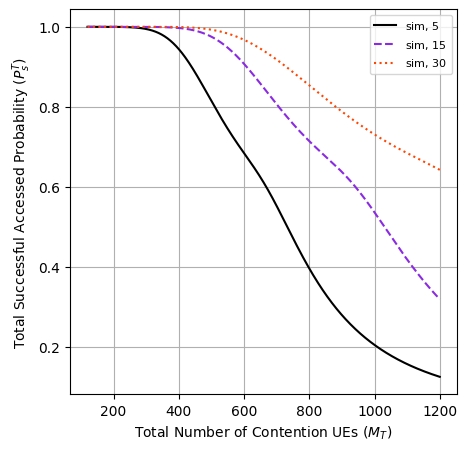

In [87]:
# plt.subplot(131)
plt.plot(ana_wrar_1.M_4SRA+ana_wrar_1.M_2SRA, ana_wrar_1.Ps_T, '-', color = 'black', label = 'sim, $5$')
plt.plot(ana_wrar_2.M_4SRA+ana_wrar_2.M_2SRA, ana_wrar_2.Ps_T, '--', color = 'blueviolet', label = 'sim, $15$')
plt.plot(ana_wrar_3.M_4SRA+ana_wrar_3.M_2SRA, ana_wrar_3.Ps_T, ':', color = 'orangered', label = 'sim, $30$')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("Total Successful Accessed Probability ($P_s^T$)")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(1, 1))
plt.rcParams["figure.figsize"] = (5, 5)
plt.show()

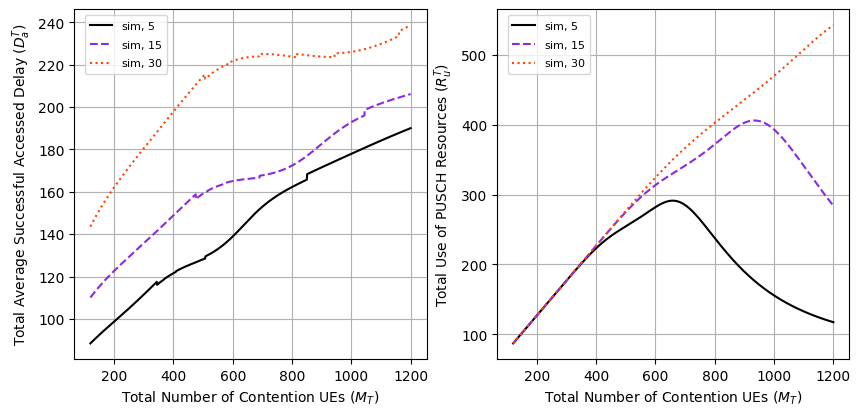

In [112]:
plt.subplot(221)
plt.plot(ana_wrar_1.M_4SRA+ana_wrar_1.M_2SRA, ana_wrar_1.Da_T, '-', color = 'black', label = 'sim, $5$')
plt.plot(ana_wrar_2.M_4SRA+ana_wrar_2.M_2SRA, ana_wrar_2.Da_T, '--', color = 'blueviolet', label = 'sim, $15$')
plt.plot(ana_wrar_3.M_4SRA+ana_wrar_3.M_2SRA, ana_wrar_3.Da_T, ':', color = 'orangered', label = 'sim, $30$')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("Total Average Successful Accessed Delay ($D_a^T$)")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(0.28, 1))

plt.subplot(222)
plt.plot(ana_wrar_1.M_4SRA+ana_wrar_1.M_2SRA, ana_wrar_1.Ur_PUSCH_T, '-', color = 'black', label = 'sim, $5$')
plt.plot(ana_wrar_2.M_4SRA+ana_wrar_2.M_2SRA, ana_wrar_2.Ur_PUSCH_T, '--', color = 'blueviolet', label = 'sim, $15$')
plt.plot(ana_wrar_3.M_4SRA+ana_wrar_3.M_2SRA, ana_wrar_3.Ur_PUSCH_T, ':', color = 'orangered', label = 'sim, $30$')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("Total Use of PUSCH Resources ($R_u^T$)")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(0.28, 1))
plt.rcParams["figure.figsize"] = (10, 10)
plt.show()

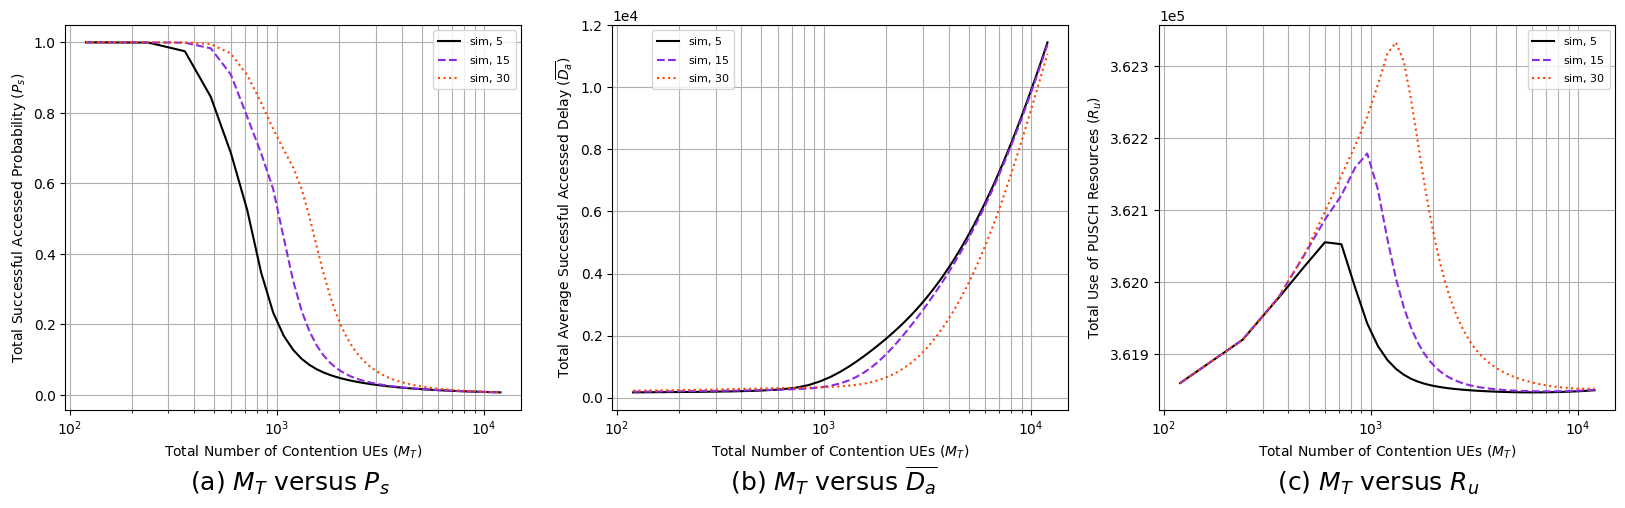

In [129]:
plt.subplot(131)
plt.plot(ana_wrar_1.M_4SRA+ana_wrar_1.M_2SRA, ana_wrar_1.Ps_T, '-', color = 'black', label = 'sim, $5$')
plt.plot(ana_wrar_2.M_4SRA+ana_wrar_2.M_2SRA, ana_wrar_2.Ps_T, '--', color = 'blueviolet', label = 'sim, $15$')
plt.plot(ana_wrar_3.M_4SRA+ana_wrar_3.M_2SRA, ana_wrar_3.Ps_T, ':', color = 'orangered', label = 'sim, $30$')
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("Total Successful Accessed Probability ($P_s$)")
# plt.title("(a) $M_T$ versus $P_s$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(1, 1))

plt.subplot(132)
plt.plot(ana_wrar_1.M_4SRA+ana_wrar_1.M_2SRA, ana_wrar_1.Da_T, '-', color = 'black', label = 'sim, $5$')
plt.plot(ana_wrar_2.M_4SRA+ana_wrar_2.M_2SRA, ana_wrar_2.Da_T, '--', color = 'blueviolet', label = 'sim, $15$')
plt.plot(ana_wrar_3.M_4SRA+ana_wrar_3.M_2SRA, ana_wrar_3.Da_T, ':', color = 'orangered', label = 'sim, $30$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 0))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("Total Average Successful Accessed Delay ($\overline{D_{a}}$)")
# plt.title("(b) $M_T$ versus $\overline{D_{a}}$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(0.28, 1))

plt.subplot(133)
plt.plot(ana_wrar_1.M_4SRA+ana_wrar_1.M_2SRA, ana_wrar_1.Ur_PUSCH_T, '-', color = 'black', label = 'sim, $5$')
plt.plot(ana_wrar_2.M_4SRA+ana_wrar_2.M_2SRA, ana_wrar_2.Ur_PUSCH_T, '--', color = 'blueviolet', label = 'sim, $15$')
plt.plot(ana_wrar_3.M_4SRA+ana_wrar_3.M_2SRA, ana_wrar_3.Ur_PUSCH_T, ':', color = 'orangered', label = 'sim, $30$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 3))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("Total Use of PUSCH Resources ($R_u$)")
# plt.title("(c) $M_T$ versus $R_u$")
plt.grid(True, which="both")

plt.suptitle("(a) $M_T$ versus $P_s$                                           (b) $M_T$ versus $\overline{D_{a}}$                                           (c) $M_T$ versus $R_u$", fontsize=18, x=0.51, y=0.0)

plt.legend(markerscale=1, fontsize=8, loc='best')
plt.rcParams["figure.figsize"] = (20, 5)
plt.show()

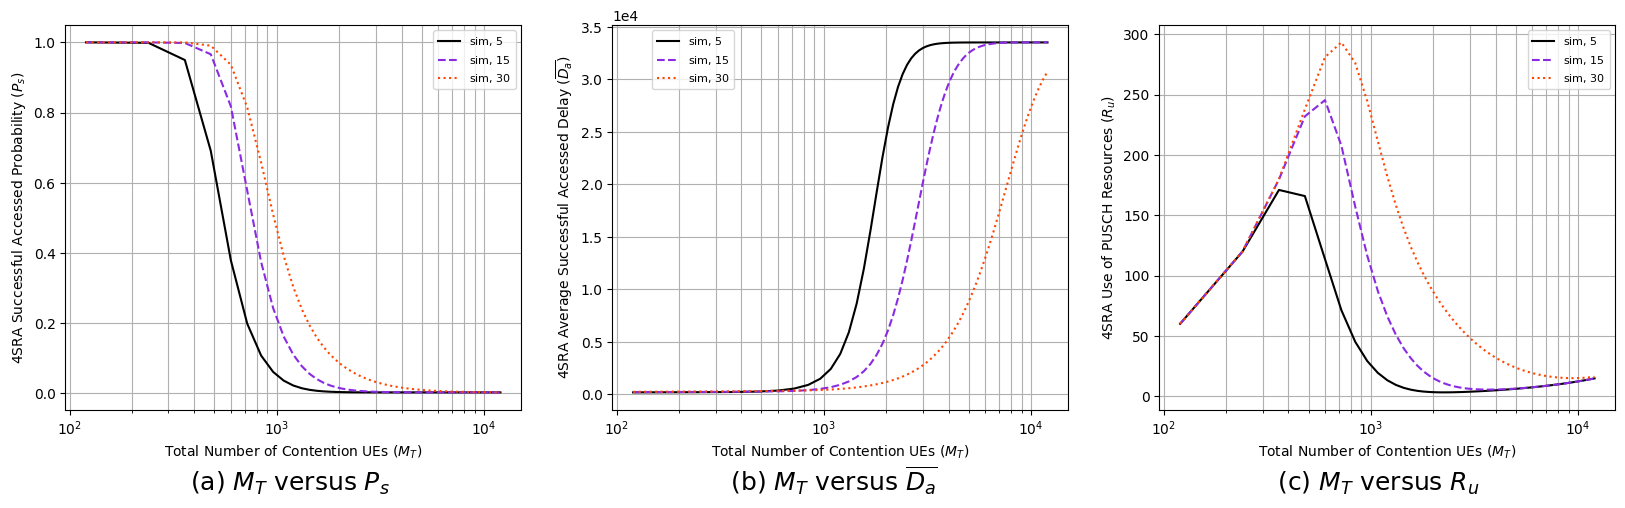

In [130]:
plt.subplot(131)
plt.plot(ana_wrar_1.M_4SRA+ana_wrar_1.M_2SRA, ana_wrar_1.Ps_4SRA, '-', color = 'black', label = 'sim, $5$')
plt.plot(ana_wrar_2.M_4SRA+ana_wrar_2.M_2SRA, ana_wrar_2.Ps_4SRA, '--', color = 'blueviolet', label = 'sim, $15$')
plt.plot(ana_wrar_3.M_4SRA+ana_wrar_3.M_2SRA, ana_wrar_3.Ps_4SRA, ':', color = 'orangered', label = 'sim, $30$')
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("4SRA Successful Accessed Probability ($P_s$)")
# plt.title("(a) $M_T$ versus $P_s$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(1, 1))

plt.subplot(132)
plt.plot(ana_wrar_1.M_4SRA+ana_wrar_1.M_2SRA, ana_wrar_1.Da_4SRA, '-', color = 'black', label = 'sim, $5$')
plt.plot(ana_wrar_2.M_4SRA+ana_wrar_2.M_2SRA, ana_wrar_2.Da_4SRA, '--', color = 'blueviolet', label = 'sim, $15$')
plt.plot(ana_wrar_3.M_4SRA+ana_wrar_3.M_2SRA, ana_wrar_3.Da_4SRA, ':', color = 'orangered', label = 'sim, $30$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 0))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("4SRA Average Successful Accessed Delay ($\overline{D_{a}}$)")
# plt.title("(b) $M_T$ versus $\overline{D_{a}}$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(0.28, 1))

plt.subplot(133)
plt.plot(ana_wrar_1.M_4SRA+ana_wrar_1.M_2SRA, ana_wrar_1.Ur_PUSCH_4SRA, '-', color = 'black', label = 'sim, $5$')
plt.plot(ana_wrar_2.M_4SRA+ana_wrar_2.M_2SRA, ana_wrar_2.Ur_PUSCH_4SRA, '--', color = 'blueviolet', label = 'sim, $15$')
plt.plot(ana_wrar_3.M_4SRA+ana_wrar_3.M_2SRA, ana_wrar_3.Ur_PUSCH_4SRA, ':', color = 'orangered', label = 'sim, $30$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 3))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("4SRA Use of PUSCH Resources ($R_u$)")
# plt.title("(c) $M_T$ versus $R_u$")
plt.grid(True, which="both")

plt.suptitle("(a) $M_T$ versus $P_s$                                           (b) $M_T$ versus $\overline{D_{a}}$                                           (c) $M_T$ versus $R_u$", fontsize=18, x=0.51, y=0.0)

plt.legend(markerscale=1, fontsize=8, loc='best')
plt.rcParams["figure.figsize"] = (20, 5)
plt.show()

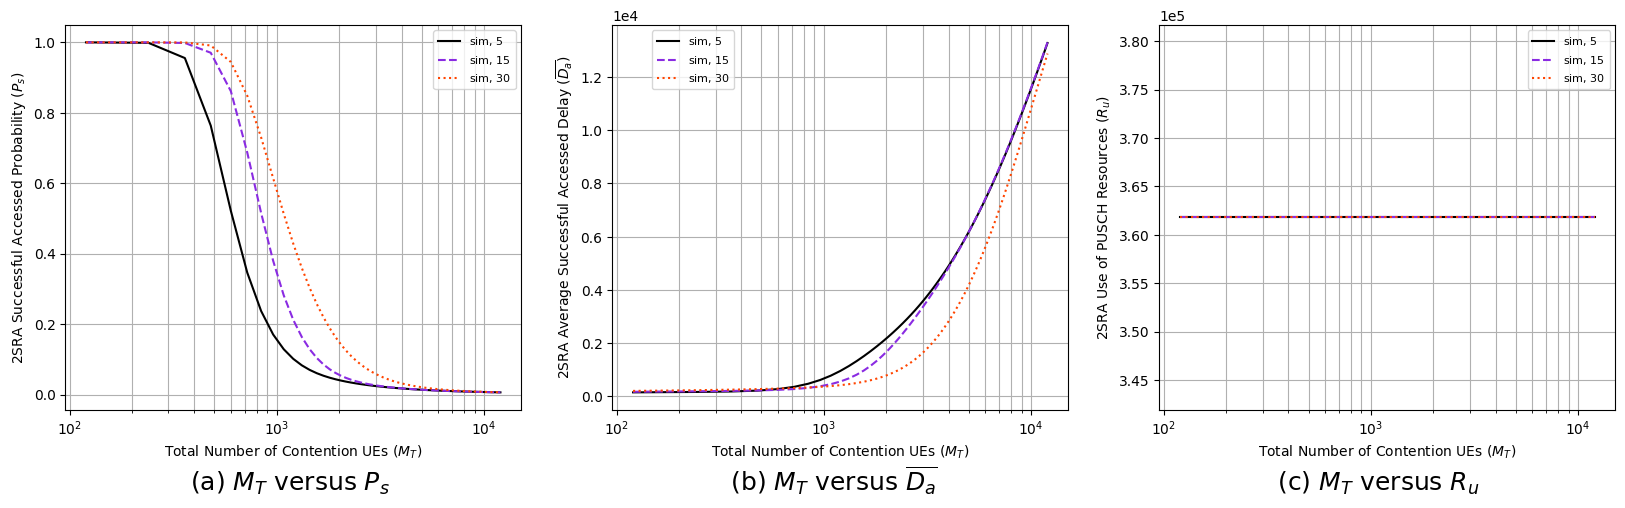

In [131]:
plt.subplot(131)
plt.plot(ana_wrar_1.M_4SRA+ana_wrar_1.M_2SRA, ana_wrar_1.Ps_2SRA, '-', color = 'black', label = 'sim, $5$')
plt.plot(ana_wrar_2.M_4SRA+ana_wrar_2.M_2SRA, ana_wrar_2.Ps_2SRA, '--', color = 'blueviolet', label = 'sim, $15$')
plt.plot(ana_wrar_3.M_4SRA+ana_wrar_3.M_2SRA, ana_wrar_3.Ps_2SRA, ':', color = 'orangered', label = 'sim, $30$')
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("2SRA Successful Accessed Probability ($P_s$)")
# plt.title("(a) $M_T$ versus $P_s$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(1, 1))

plt.subplot(132)
plt.plot(ana_wrar_1.M_4SRA+ana_wrar_1.M_2SRA, ana_wrar_1.Da_2SRA, '-', color = 'black', label = 'sim, $5$')
plt.plot(ana_wrar_2.M_4SRA+ana_wrar_2.M_2SRA, ana_wrar_2.Da_2SRA, '--', color = 'blueviolet', label = 'sim, $15$')
plt.plot(ana_wrar_3.M_4SRA+ana_wrar_3.M_2SRA, ana_wrar_3.Da_2SRA, ':', color = 'orangered', label = 'sim, $30$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 0))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("2SRA Average Successful Accessed Delay ($\overline{D_{a}}$)")
# plt.title("(b) $M_T$ versus $\overline{D_{a}}$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(0.28, 1))

plt.subplot(133)
plt.plot(ana_wrar_1.M_4SRA+ana_wrar_1.M_2SRA, ana_wrar_1.Ur_PUSCH_2SRA, '-', color = 'black', label = 'sim, $5$')
plt.plot(ana_wrar_2.M_4SRA+ana_wrar_2.M_2SRA, ana_wrar_2.Ur_PUSCH_2SRA, '--', color = 'blueviolet', label = 'sim, $15$')
plt.plot(ana_wrar_3.M_4SRA+ana_wrar_3.M_2SRA, ana_wrar_3.Ur_PUSCH_2SRA, ':', color = 'orangered', label = 'sim, $30$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 3))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("2SRA Use of PUSCH Resources ($R_u$)")
# plt.title("(c) $M_T$ versus $R_u$")
plt.grid(True, which="both")

plt.suptitle("(a) $M_T$ versus $P_s$                                           (b) $M_T$ versus $\overline{D_{a}}$                                           (c) $M_T$ versus $R_u$", fontsize=18, x=0.51, y=0.0)

plt.legend(markerscale=1, fontsize=8, loc='best')
plt.rcParams["figure.figsize"] = (20, 5)
plt.show()

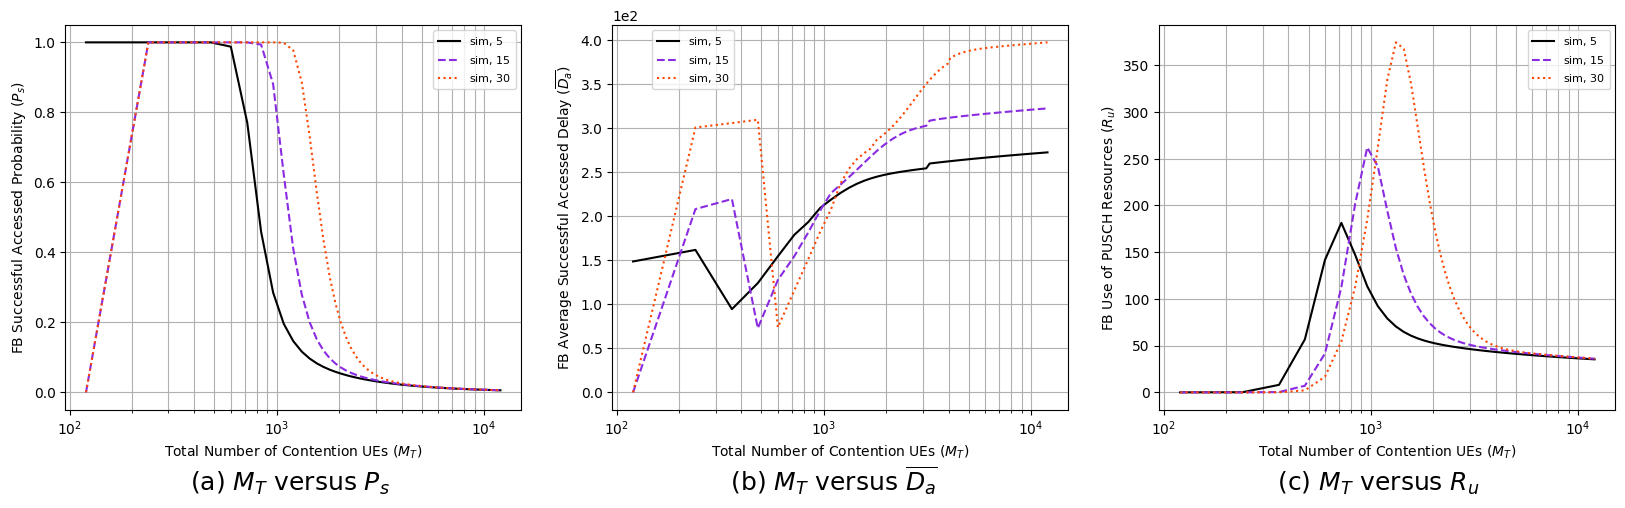

In [133]:
plt.subplot(131)
plt.plot(ana_wrar_1.M_4SRA+ana_wrar_1.M_2SRA, ana_wrar_1.Ps_FB, '-', color = 'black', label = 'sim, $5$')
plt.plot(ana_wrar_2.M_4SRA+ana_wrar_2.M_2SRA, ana_wrar_2.Ps_FB, '--', color = 'blueviolet', label = 'sim, $15$')
plt.plot(ana_wrar_3.M_4SRA+ana_wrar_3.M_2SRA, ana_wrar_3.Ps_FB, ':', color = 'orangered', label = 'sim, $30$')
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("FB Successful Accessed Probability ($P_s$)")
# plt.title("(a) $M_T$ versus $P_s$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(1, 1))

plt.subplot(132)
plt.plot(ana_wrar_1.M_4SRA+ana_wrar_1.M_2SRA, ana_wrar_1.Da_FB, '-', color = 'black', label = 'sim, $5$')
plt.plot(ana_wrar_2.M_4SRA+ana_wrar_2.M_2SRA, ana_wrar_2.Da_FB, '--', color = 'blueviolet', label = 'sim, $15$')
plt.plot(ana_wrar_3.M_4SRA+ana_wrar_3.M_2SRA, ana_wrar_3.Da_FB, ':', color = 'orangered', label = 'sim, $30$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 0))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("FB Average Successful Accessed Delay ($\overline{D_{a}}$)")
# plt.title("(b) $M_T$ versus $\overline{D_{a}}$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(0.28, 1))

plt.subplot(133)
plt.plot(ana_wrar_1.M_4SRA+ana_wrar_1.M_2SRA, ana_wrar_1.Ur_PUSCH_FB, '-', color = 'black', label = 'sim, $5$')
plt.plot(ana_wrar_2.M_4SRA+ana_wrar_2.M_2SRA, ana_wrar_2.Ur_PUSCH_FB, '--', color = 'blueviolet', label = 'sim, $15$')
plt.plot(ana_wrar_3.M_4SRA+ana_wrar_3.M_2SRA, ana_wrar_3.Ur_PUSCH_FB, ':', color = 'orangered', label = 'sim, $30$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 3))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("FB Use of PUSCH Resources ($R_u$)")
# plt.title("(c) $M_T$ versus $R_u$")
plt.grid(True, which="both")

plt.suptitle("(a) $M_T$ versus $P_s$                                           (b) $M_T$ versus $\overline{D_{a}}$                                           (c) $M_T$ versus $R_u$", fontsize=18, x=0.51, y=0.0)

plt.legend(markerscale=1, fontsize=8, loc='best')
plt.rcParams["figure.figsize"] = (20, 5)
plt.show()

In [141]:
ana_nptmax_1 = pandas.read_csv('ana_testresult_nptmax_1.csv')
ana_nptmax_2 = pandas.read_csv('ana_testresult_nptmax_2.csv')
ana_nptmax_3 = pandas.read_csv('ana_testresult_nptmax_3.csv')
ana_nptmax_4 = pandas.read_csv('ana_testresult_nptmax_4.csv')

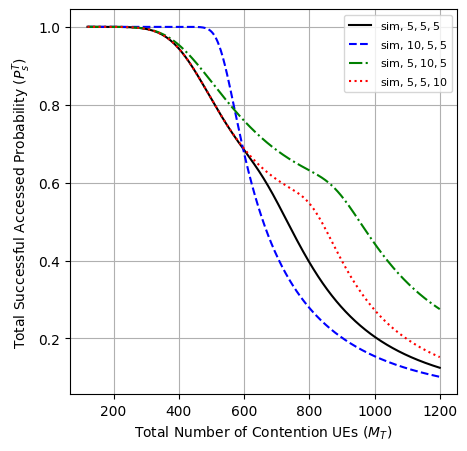

In [81]:
# plt.subplot(131)
plt.plot(ana_nptmax_1.M_4SRA+ana_nptmax_1.M_2SRA, ana_nptmax_1.Ps_T, '-', color = 'black', label = 'sim, $5, 5, 5$')
plt.plot(ana_nptmax_2.M_4SRA+ana_nptmax_2.M_2SRA, ana_nptmax_2.Ps_T, '--', color = 'blue', label = 'sim, $10, 5, 5$')
plt.plot(ana_nptmax_3.M_4SRA+ana_nptmax_3.M_2SRA, ana_nptmax_3.Ps_T, '-.', color = 'green', label = 'sim, $5, 10, 5$')
plt.plot(ana_nptmax_4.M_4SRA+ana_nptmax_4.M_2SRA, ana_nptmax_4.Ps_T, ':', color = 'red', label = 'sim, $5, 5, 10$')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("Total Successful Accessed Probability ($P_s^T$)")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(1, 1))
plt.rcParams["figure.figsize"] = (5, 5)
plt.show()

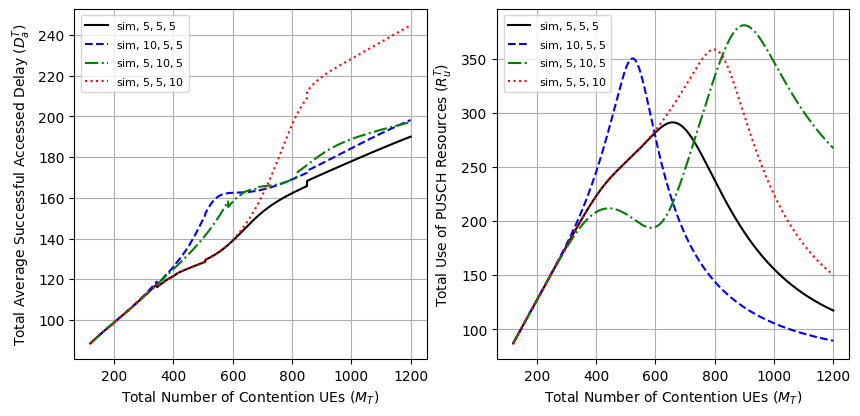

In [116]:
plt.subplot(221)
plt.plot(ana_nptmax_1.M_4SRA+ana_nptmax_1.M_2SRA, ana_nptmax_1.Da_T, '-', color = 'black', label = 'sim, $5, 5, 5$')
plt.plot(ana_nptmax_2.M_4SRA+ana_nptmax_2.M_2SRA, ana_nptmax_2.Da_T, '--', color = 'blue', label = 'sim, $10, 5, 5$')
plt.plot(ana_nptmax_3.M_4SRA+ana_nptmax_3.M_2SRA, ana_nptmax_3.Da_T, '-.', color = 'green', label = 'sim, $5, 10, 5$')
plt.plot(ana_nptmax_4.M_4SRA+ana_nptmax_4.M_2SRA, ana_nptmax_4.Da_T, ':', color = 'red', label = 'sim, $5, 5, 10$')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("Total Average Successful Accessed Delay ($D_a^T$)")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(0.34, 1))

plt.subplot(222)
plt.plot(ana_nptmax_1.M_4SRA+ana_nptmax_1.M_2SRA, ana_nptmax_1.Ur_PUSCH_T, '-', color = 'black', label = 'sim, $5, 5, 5$')
plt.plot(ana_nptmax_2.M_4SRA+ana_nptmax_2.M_2SRA, ana_nptmax_2.Ur_PUSCH_T, '--', color = 'blue', label = 'sim, $10, 5, 5$')
plt.plot(ana_nptmax_3.M_4SRA+ana_nptmax_3.M_2SRA, ana_nptmax_3.Ur_PUSCH_T, '-.', color = 'green', label = 'sim, $5, 10, 5$')
plt.plot(ana_nptmax_4.M_4SRA+ana_nptmax_4.M_2SRA, ana_nptmax_4.Ur_PUSCH_T, ':', color = 'red', label = 'sim, $5, 5, 10$')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("Total Use of PUSCH Resources ($R_u^T$)")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(0.34, 1))
plt.rcParams["figure.figsize"] = (10, 10)
plt.show()

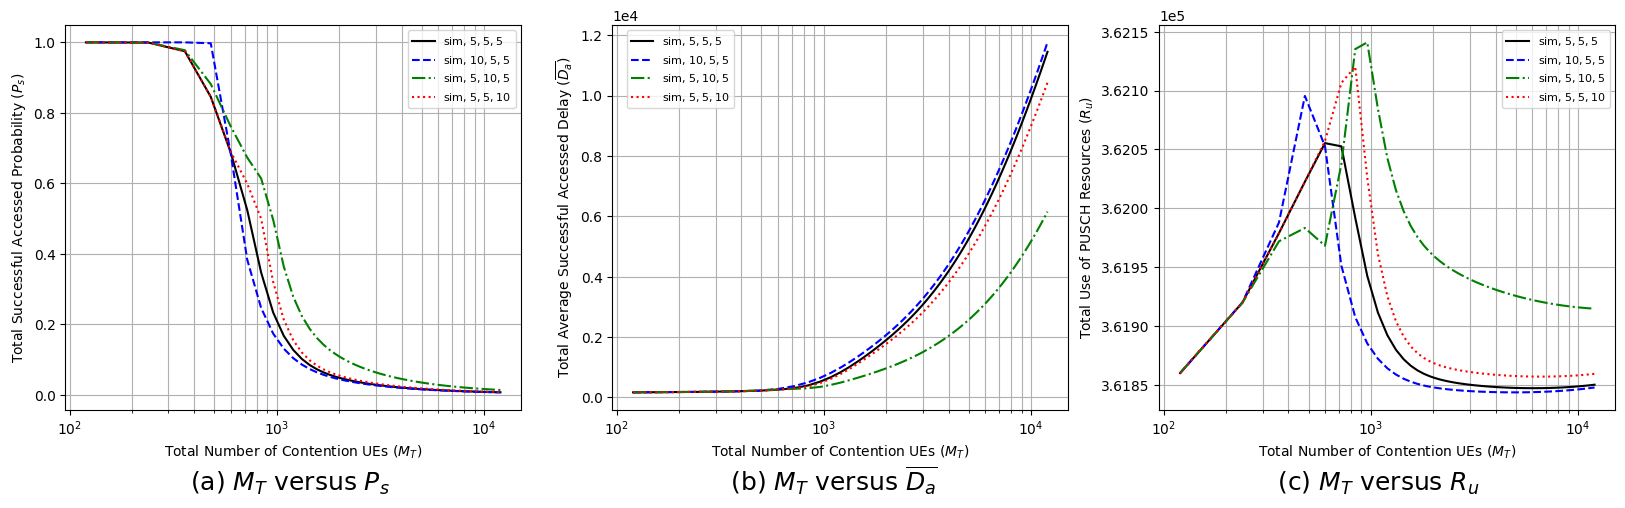

In [142]:
plt.subplot(131)
plt.plot(ana_nptmax_1.M_4SRA+ana_nptmax_1.M_2SRA, ana_nptmax_1.Ps_T, '-', color = 'black', label = 'sim, $5, 5, 5$')
plt.plot(ana_nptmax_2.M_4SRA+ana_nptmax_2.M_2SRA, ana_nptmax_2.Ps_T, '--', color = 'blue', label = 'sim, $10, 5, 5$')
plt.plot(ana_nptmax_3.M_4SRA+ana_nptmax_3.M_2SRA, ana_nptmax_3.Ps_T, '-.', color = 'green', label = 'sim, $5, 10, 5$')
plt.plot(ana_nptmax_4.M_4SRA+ana_nptmax_4.M_2SRA, ana_nptmax_4.Ps_T, ':', color = 'red', label = 'sim, $5, 5, 10$')
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("Total Successful Accessed Probability ($P_s$)")
# plt.title("(a) $M_T$ versus $P_s$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(1, 1))

plt.subplot(132)
plt.plot(ana_nptmax_1.M_4SRA+ana_nptmax_1.M_2SRA, ana_nptmax_1.Da_T, '-', color = 'black', label = 'sim, $5, 5, 5$')
plt.plot(ana_nptmax_2.M_4SRA+ana_nptmax_2.M_2SRA, ana_nptmax_2.Da_T, '--', color = 'blue', label = 'sim, $10, 5, 5$')
plt.plot(ana_nptmax_3.M_4SRA+ana_nptmax_3.M_2SRA, ana_nptmax_3.Da_T, '-.', color = 'green', label = 'sim, $5, 10, 5$')
plt.plot(ana_nptmax_4.M_4SRA+ana_nptmax_4.M_2SRA, ana_nptmax_4.Da_T, ':', color = 'red', label = 'sim, $5, 5, 10$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 0))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("Total Average Successful Accessed Delay ($\overline{D_{a}}$)")
# plt.title("(b) $M_T$ versus $\overline{D_{a}}$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(0.28, 1))

plt.subplot(133)
plt.plot(ana_nptmax_1.M_4SRA+ana_nptmax_1.M_2SRA, ana_nptmax_1.Ur_PUSCH_T, '-', color = 'black', label = 'sim, $5, 5, 5$')
plt.plot(ana_nptmax_2.M_4SRA+ana_nptmax_2.M_2SRA, ana_nptmax_2.Ur_PUSCH_T, '--', color = 'blue', label = 'sim, $10, 5, 5$')
plt.plot(ana_nptmax_3.M_4SRA+ana_nptmax_3.M_2SRA, ana_nptmax_3.Ur_PUSCH_T, '-.', color = 'green', label = 'sim, $5, 10, 5$')
plt.plot(ana_nptmax_4.M_4SRA+ana_nptmax_4.M_2SRA, ana_nptmax_4.Ur_PUSCH_T, ':', color = 'red', label = 'sim, $5, 5, 10$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 3))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("Total Use of PUSCH Resources ($R_u$)")
# plt.title("(c) $M_T$ versus $R_u$")
plt.grid(True, which="both")

plt.suptitle("(a) $M_T$ versus $P_s$                                           (b) $M_T$ versus $\overline{D_{a}}$                                           (c) $M_T$ versus $R_u$", fontsize=18, x=0.51, y=0.0)

plt.legend(markerscale=1, fontsize=8, loc='best')
plt.rcParams["figure.figsize"] = (20, 5)
plt.show()

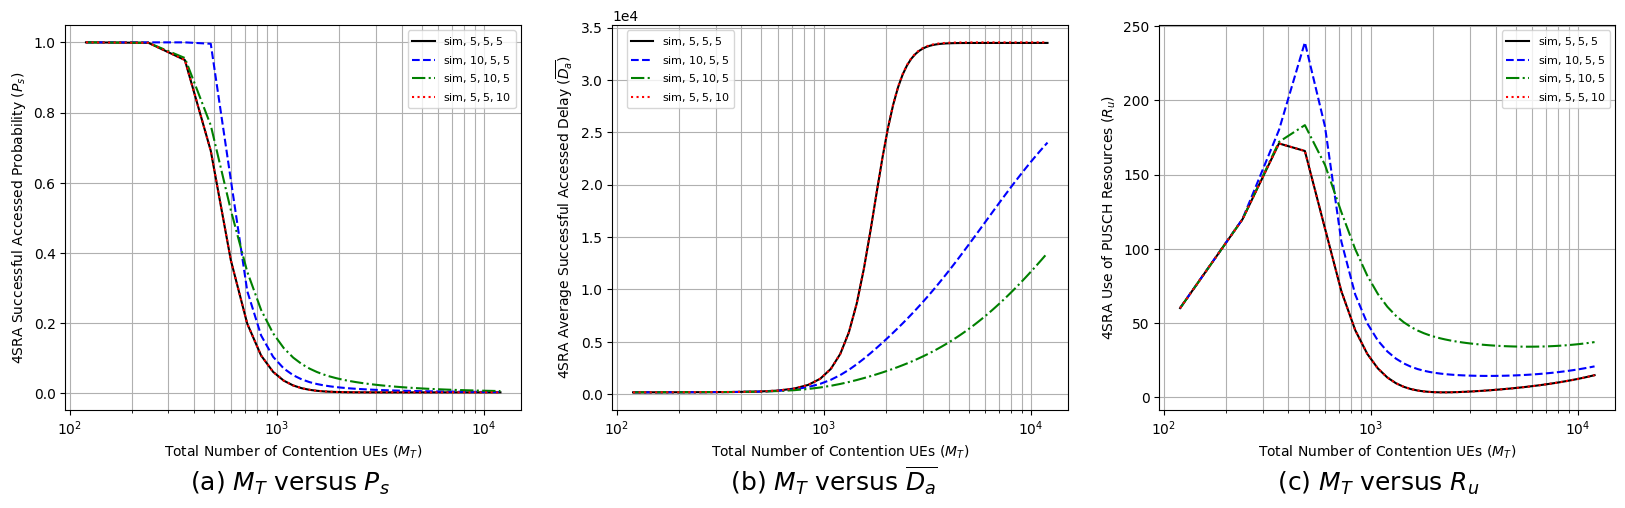

In [144]:
plt.subplot(131)
plt.plot(ana_nptmax_1.M_4SRA+ana_nptmax_1.M_2SRA, ana_nptmax_1.Ps_4SRA, '-', color = 'black', label = 'sim, $5, 5, 5$')
plt.plot(ana_nptmax_2.M_4SRA+ana_nptmax_2.M_2SRA, ana_nptmax_2.Ps_4SRA, '--', color = 'blue', label = 'sim, $10, 5, 5$')
plt.plot(ana_nptmax_3.M_4SRA+ana_nptmax_3.M_2SRA, ana_nptmax_3.Ps_4SRA, '-.', color = 'green', label = 'sim, $5, 10, 5$')
plt.plot(ana_nptmax_4.M_4SRA+ana_nptmax_4.M_2SRA, ana_nptmax_4.Ps_4SRA, ':', color = 'red', label = 'sim, $5, 5, 10$')
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("4SRA Successful Accessed Probability ($P_s$)")
# plt.title("(a) $M_T$ versus $P_s$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(1, 1))

plt.subplot(132)
plt.plot(ana_nptmax_1.M_4SRA+ana_nptmax_1.M_2SRA, ana_nptmax_1.Da_4SRA, '-', color = 'black', label = 'sim, $5, 5, 5$')
plt.plot(ana_nptmax_2.M_4SRA+ana_nptmax_2.M_2SRA, ana_nptmax_2.Da_4SRA, '--', color = 'blue', label = 'sim, $10, 5, 5$')
plt.plot(ana_nptmax_3.M_4SRA+ana_nptmax_3.M_2SRA, ana_nptmax_3.Da_4SRA, '-.', color = 'green', label = 'sim, $5, 10, 5$')
plt.plot(ana_nptmax_4.M_4SRA+ana_nptmax_4.M_2SRA, ana_nptmax_4.Da_4SRA, ':', color = 'red', label = 'sim, $5, 5, 10$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 0))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("4SRA Average Successful Accessed Delay ($\overline{D_{a}}$)")
# plt.title("(b) $M_T$ versus $\overline{D_{a}}$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(0.28, 1))

plt.subplot(133)
plt.plot(ana_nptmax_1.M_4SRA+ana_nptmax_1.M_2SRA, ana_nptmax_1.Ur_PUSCH_4SRA, '-', color = 'black', label = 'sim, $5, 5, 5$')
plt.plot(ana_nptmax_2.M_4SRA+ana_nptmax_2.M_2SRA, ana_nptmax_2.Ur_PUSCH_4SRA, '--', color = 'blue', label = 'sim, $10, 5, 5$')
plt.plot(ana_nptmax_3.M_4SRA+ana_nptmax_3.M_2SRA, ana_nptmax_3.Ur_PUSCH_4SRA, '-.', color = 'green', label = 'sim, $5, 10, 5$')
plt.plot(ana_nptmax_4.M_4SRA+ana_nptmax_4.M_2SRA, ana_nptmax_4.Ur_PUSCH_4SRA, ':', color = 'red', label = 'sim, $5, 5, 10$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 3))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("4SRA Use of PUSCH Resources ($R_u$)")
# plt.title("(c) $M_T$ versus $R_u$")
plt.grid(True, which="both")

plt.suptitle("(a) $M_T$ versus $P_s$                                           (b) $M_T$ versus $\overline{D_{a}}$                                           (c) $M_T$ versus $R_u$", fontsize=18, x=0.51, y=0.0)

plt.legend(markerscale=1, fontsize=8, loc='best')
plt.rcParams["figure.figsize"] = (20, 5)
plt.show()

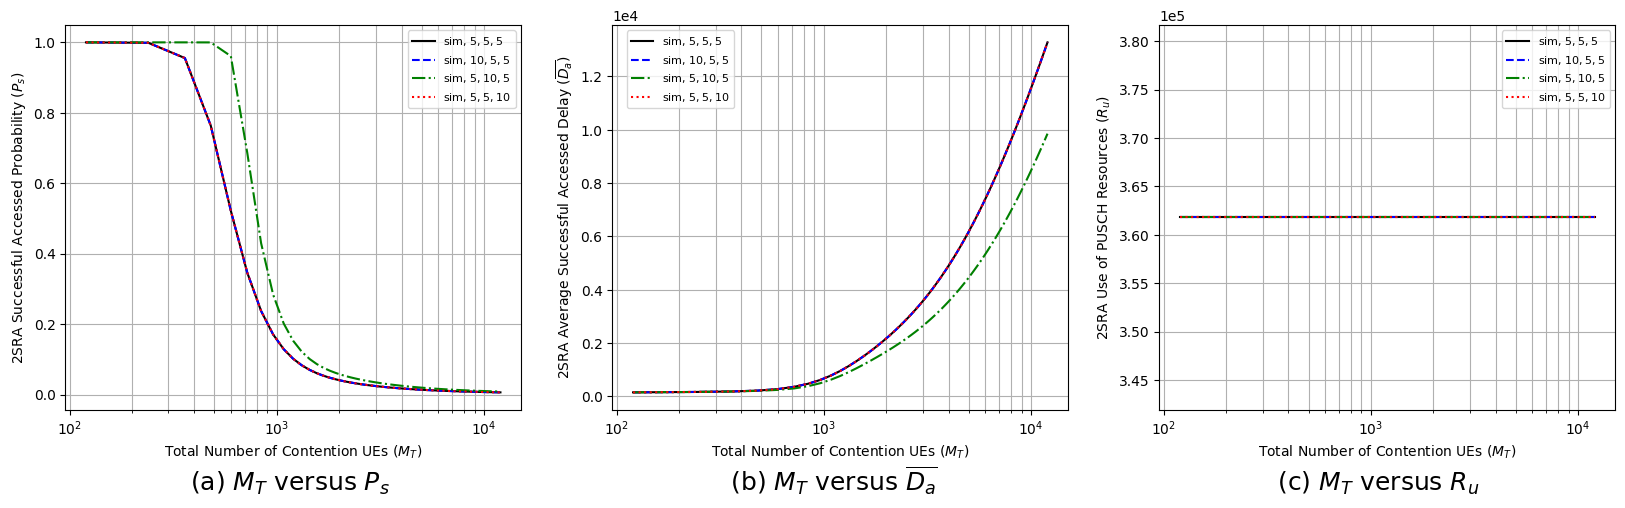

In [143]:
plt.subplot(131)
plt.plot(ana_nptmax_1.M_4SRA+ana_nptmax_1.M_2SRA, ana_nptmax_1.Ps_2SRA, '-', color = 'black', label = 'sim, $5, 5, 5$')
plt.plot(ana_nptmax_2.M_4SRA+ana_nptmax_2.M_2SRA, ana_nptmax_2.Ps_2SRA, '--', color = 'blue', label = 'sim, $10, 5, 5$')
plt.plot(ana_nptmax_3.M_4SRA+ana_nptmax_3.M_2SRA, ana_nptmax_3.Ps_2SRA, '-.', color = 'green', label = 'sim, $5, 10, 5$')
plt.plot(ana_nptmax_4.M_4SRA+ana_nptmax_4.M_2SRA, ana_nptmax_4.Ps_2SRA, ':', color = 'red', label = 'sim, $5, 5, 10$')
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("2SRA Successful Accessed Probability ($P_s$)")
# plt.title("(a) $M_T$ versus $P_s$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(1, 1))

plt.subplot(132)
plt.plot(ana_nptmax_1.M_4SRA+ana_nptmax_1.M_2SRA, ana_nptmax_1.Da_2SRA, '-', color = 'black', label = 'sim, $5, 5, 5$')
plt.plot(ana_nptmax_2.M_4SRA+ana_nptmax_2.M_2SRA, ana_nptmax_2.Da_2SRA, '--', color = 'blue', label = 'sim, $10, 5, 5$')
plt.plot(ana_nptmax_3.M_4SRA+ana_nptmax_3.M_2SRA, ana_nptmax_3.Da_2SRA, '-.', color = 'green', label = 'sim, $5, 10, 5$')
plt.plot(ana_nptmax_4.M_4SRA+ana_nptmax_4.M_2SRA, ana_nptmax_4.Da_2SRA, ':', color = 'red', label = 'sim, $5, 5, 10$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 0))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("2SRA Average Successful Accessed Delay ($\overline{D_{a}}$)")
# plt.title("(b) $M_T$ versus $\overline{D_{a}}$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(0.28, 1))

plt.subplot(133)
plt.plot(ana_nptmax_1.M_4SRA+ana_nptmax_1.M_2SRA, ana_nptmax_1.Ur_PUSCH_2SRA, '-', color = 'black', label = 'sim, $5, 5, 5$')
plt.plot(ana_nptmax_2.M_4SRA+ana_nptmax_2.M_2SRA, ana_nptmax_2.Ur_PUSCH_2SRA, '--', color = 'blue', label = 'sim, $10, 5, 5$')
plt.plot(ana_nptmax_3.M_4SRA+ana_nptmax_3.M_2SRA, ana_nptmax_3.Ur_PUSCH_2SRA, '-.', color = 'green', label = 'sim, $5, 10, 5$')
plt.plot(ana_nptmax_4.M_4SRA+ana_nptmax_4.M_2SRA, ana_nptmax_4.Ur_PUSCH_2SRA, ':', color = 'red', label = 'sim, $5, 5, 10$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 3))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("2SRA Use of PUSCH Resources ($R_u$)")
# plt.title("(c) $M_T$ versus $R_u$")
plt.grid(True, which="both")

plt.suptitle("(a) $M_T$ versus $P_s$                                           (b) $M_T$ versus $\overline{D_{a}}$                                           (c) $M_T$ versus $R_u$", fontsize=18, x=0.51, y=0.0)

plt.legend(markerscale=1, fontsize=8, loc='best')
plt.rcParams["figure.figsize"] = (20, 5)
plt.show()

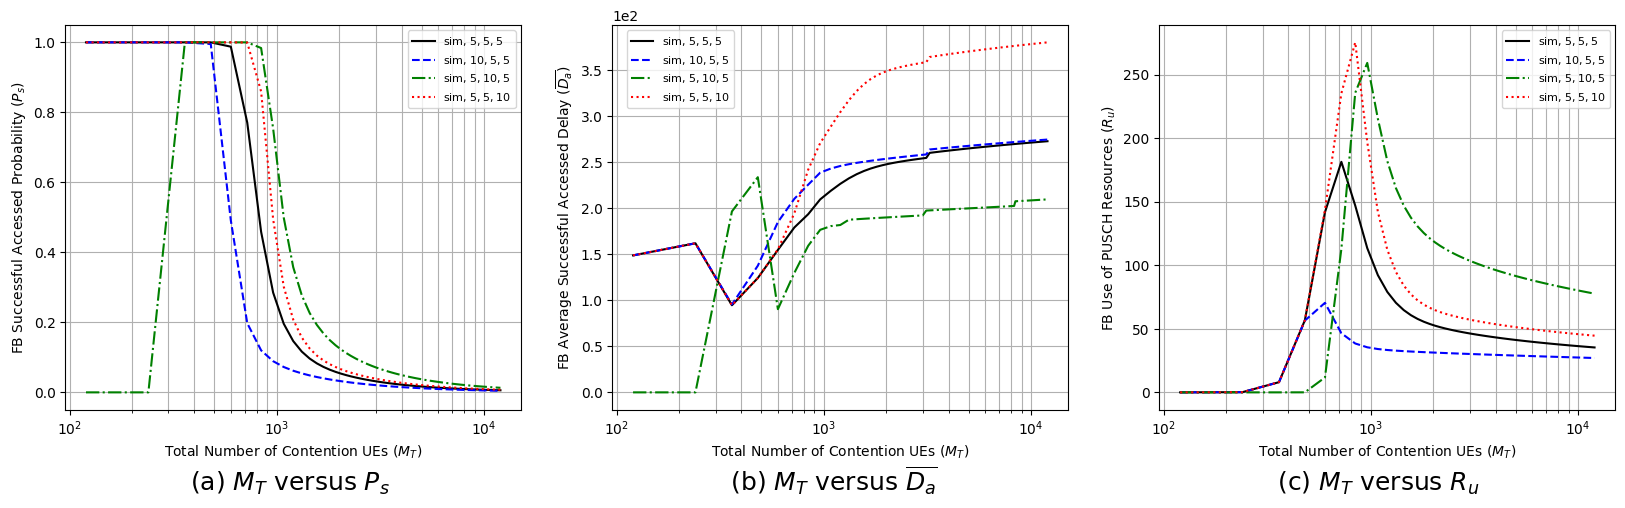

In [145]:
plt.subplot(131)
plt.plot(ana_nptmax_1.M_4SRA+ana_nptmax_1.M_2SRA, ana_nptmax_1.Ps_FB, '-', color = 'black', label = 'sim, $5, 5, 5$')
plt.plot(ana_nptmax_2.M_4SRA+ana_nptmax_2.M_2SRA, ana_nptmax_2.Ps_FB, '--', color = 'blue', label = 'sim, $10, 5, 5$')
plt.plot(ana_nptmax_3.M_4SRA+ana_nptmax_3.M_2SRA, ana_nptmax_3.Ps_FB, '-.', color = 'green', label = 'sim, $5, 10, 5$')
plt.plot(ana_nptmax_4.M_4SRA+ana_nptmax_4.M_2SRA, ana_nptmax_4.Ps_FB, ':', color = 'red', label = 'sim, $5, 5, 10$')
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("FB Successful Accessed Probability ($P_s$)")
# plt.title("(a) $M_T$ versus $P_s$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(1, 1))

plt.subplot(132)
plt.plot(ana_nptmax_1.M_4SRA+ana_nptmax_1.M_2SRA, ana_nptmax_1.Da_FB, '-', color = 'black', label = 'sim, $5, 5, 5$')
plt.plot(ana_nptmax_2.M_4SRA+ana_nptmax_2.M_2SRA, ana_nptmax_2.Da_FB, '--', color = 'blue', label = 'sim, $10, 5, 5$')
plt.plot(ana_nptmax_3.M_4SRA+ana_nptmax_3.M_2SRA, ana_nptmax_3.Da_FB, '-.', color = 'green', label = 'sim, $5, 10, 5$')
plt.plot(ana_nptmax_4.M_4SRA+ana_nptmax_4.M_2SRA, ana_nptmax_4.Da_FB, ':', color = 'red', label = 'sim, $5, 5, 10$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 0))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("FB Average Successful Accessed Delay ($\overline{D_{a}}$)")
# plt.title("(b) $M_T$ versus $\overline{D_{a}}$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(0.28, 1))

plt.subplot(133)
plt.plot(ana_nptmax_1.M_4SRA+ana_nptmax_1.M_2SRA, ana_nptmax_1.Ur_PUSCH_FB, '-', color = 'black', label = 'sim, $5, 5, 5$')
plt.plot(ana_nptmax_2.M_4SRA+ana_nptmax_2.M_2SRA, ana_nptmax_2.Ur_PUSCH_FB, '--', color = 'blue', label = 'sim, $10, 5, 5$')
plt.plot(ana_nptmax_3.M_4SRA+ana_nptmax_3.M_2SRA, ana_nptmax_3.Ur_PUSCH_FB, '-.', color = 'green', label = 'sim, $5, 10, 5$')
plt.plot(ana_nptmax_4.M_4SRA+ana_nptmax_4.M_2SRA, ana_nptmax_4.Ur_PUSCH_FB, ':', color = 'red', label = 'sim, $5, 5, 10$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 3))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("FB Use of PUSCH Resources ($R_u$)")
# plt.title("(c) $M_T$ versus $R_u$")
plt.grid(True, which="both")

plt.suptitle("(a) $M_T$ versus $P_s$                                           (b) $M_T$ versus $\overline{D_{a}}$                                           (c) $M_T$ versus $R_u$", fontsize=18, x=0.51, y=0.0)

plt.legend(markerscale=1, fontsize=8, loc='best')
plt.rcParams["figure.figsize"] = (20, 5)
plt.show()

In [152]:
ana_wbo_1 = pandas.read_csv('ana_testresult_wbo_1.csv')
ana_wbo_2 = pandas.read_csv('ana_testresult_wbo_2.csv')
ana_wbo_3 = pandas.read_csv('ana_testresult_wbo_3.csv')
ana_wbo_4 = pandas.read_csv('ana_testresult_wbo_4.csv')

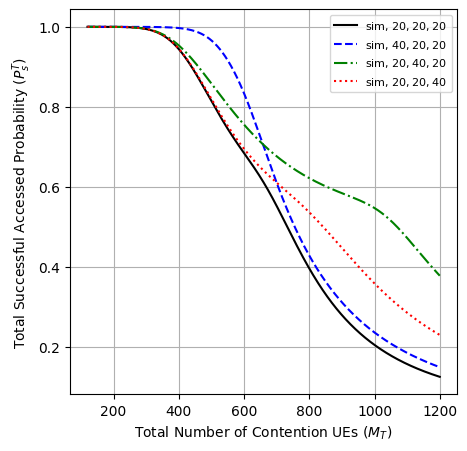

In [101]:
# plt.subplot(131)
plt.plot(ana_wbo_1.M_4SRA+ana_wbo_1.M_2SRA, ana_wbo_1.Ps_T, '-', color = 'black', label = 'sim, $20, 20, 20$')
plt.plot(ana_wbo_2.M_4SRA+ana_wbo_2.M_2SRA, ana_wbo_2.Ps_T, '--', color = 'blue', label = 'sim, $40, 20, 20$')
plt.plot(ana_wbo_3.M_4SRA+ana_wbo_3.M_2SRA, ana_wbo_3.Ps_T, '-.', color = 'green', label = 'sim, $20, 40, 20$')
plt.plot(ana_wbo_4.M_4SRA+ana_wbo_4.M_2SRA, ana_wbo_4.Ps_T, ':', color = 'red', label = 'sim, $20, 20, 40$')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("Total Successful Accessed Probability ($P_s^T$)")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(1, 1))
plt.rcParams["figure.figsize"] = (5, 5)
plt.show()

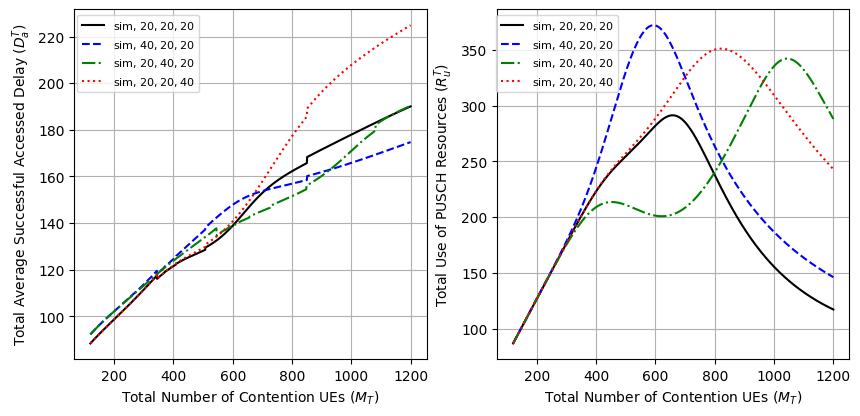

In [128]:
plt.subplot(221)
plt.plot(ana_wbo_1.M_4SRA+ana_wbo_1.M_2SRA, ana_wbo_1.Da_T, '-', color = 'black', label = 'sim, $20, 20, 20$')
plt.plot(ana_wbo_2.M_4SRA+ana_wbo_2.M_2SRA, ana_wbo_2.Da_T, '--', color = 'blue', label = 'sim, $40, 20, 20$')
plt.plot(ana_wbo_3.M_4SRA+ana_wbo_3.M_2SRA, ana_wbo_3.Da_T, '-.', color = 'green', label = 'sim, $20, 40, 20$')
plt.plot(ana_wbo_4.M_4SRA+ana_wbo_4.M_2SRA, ana_wbo_4.Da_T, ':', color = 'red', label = 'sim, $20, 20, 40$')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("Total Average Successful Accessed Delay ($D_a^T$)")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(0.37, 1))

plt.subplot(222)
plt.plot(ana_wbo_1.M_4SRA+ana_wbo_1.M_2SRA, ana_wbo_1.Ur_PUSCH_T, '-', color = 'black', label = 'sim, $20, 20, 20$')
plt.plot(ana_wbo_2.M_4SRA+ana_wbo_2.M_2SRA, ana_wbo_2.Ur_PUSCH_T, '--', color = 'blue', label = 'sim, $40, 20, 20$')
plt.plot(ana_wbo_3.M_4SRA+ana_wbo_3.M_2SRA, ana_wbo_3.Ur_PUSCH_T, '-.', color = 'green', label = 'sim, $20, 40, 20$')
plt.plot(ana_wbo_4.M_4SRA+ana_wbo_4.M_2SRA, ana_wbo_4.Ur_PUSCH_T, ':', color = 'red', label = 'sim, $20, 20, 40$')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("Total Use of PUSCH Resources ($R_u^T$)")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(0.36, 1))
plt.rcParams["figure.figsize"] = (10, 10)
plt.show()

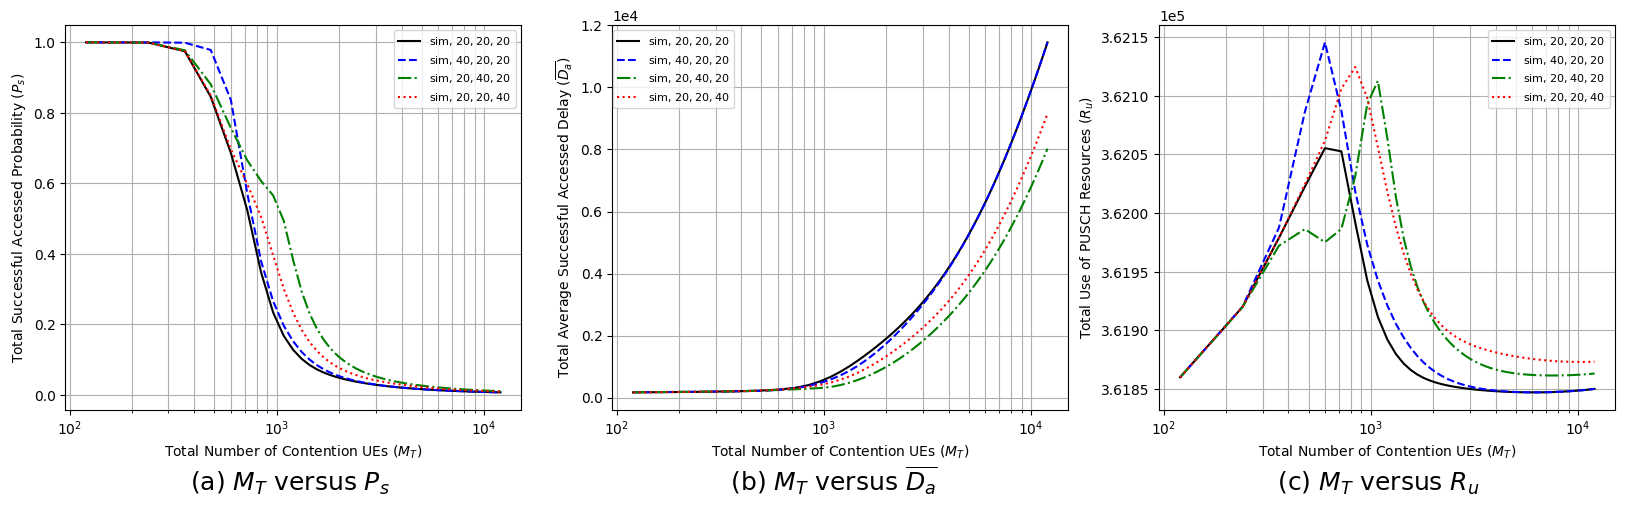

In [153]:
plt.subplot(131)
plt.plot(ana_wbo_1.M_4SRA+ana_wbo_1.M_2SRA, ana_wbo_1.Ps_T, '-', color = 'black', label = 'sim, $20, 20, 20$')
plt.plot(ana_wbo_2.M_4SRA+ana_wbo_2.M_2SRA, ana_wbo_2.Ps_T, '--', color = 'blue', label = 'sim, $40, 20, 20$')
plt.plot(ana_wbo_3.M_4SRA+ana_wbo_3.M_2SRA, ana_wbo_3.Ps_T, '-.', color = 'green', label = 'sim, $20, 40, 20$')
plt.plot(ana_wbo_4.M_4SRA+ana_wbo_4.M_2SRA, ana_wbo_4.Ps_T, ':', color = 'red', label = 'sim, $20, 20, 40$')
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("Total Successful Accessed Probability ($P_s$)")
# plt.title("(a) $M_T$ versus $P_s$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(1, 1))

plt.subplot(132)
plt.plot(ana_wbo_1.M_4SRA+ana_wbo_1.M_2SRA, ana_wbo_1.Da_T, '-', color = 'black', label = 'sim, $20, 20, 20$')
plt.plot(ana_wbo_2.M_4SRA+ana_wbo_2.M_2SRA, ana_wbo_2.Da_T, '--', color = 'blue', label = 'sim, $40, 20, 20$')
plt.plot(ana_wbo_3.M_4SRA+ana_wbo_3.M_2SRA, ana_wbo_3.Da_T, '-.', color = 'green', label = 'sim, $20, 40, 20$')
plt.plot(ana_wbo_4.M_4SRA+ana_wbo_4.M_2SRA, ana_wbo_4.Da_T, ':', color = 'red', label = 'sim, $20, 20, 40$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 0))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("Total Average Successful Accessed Delay ($\overline{D_{a}}$)")
# plt.title("(b) $M_T$ versus $\overline{D_{a}}$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(0.28, 1))

plt.subplot(133)
plt.plot(ana_wbo_1.M_4SRA+ana_wbo_1.M_2SRA, ana_wbo_1.Ur_PUSCH_T, '-', color = 'black', label = 'sim, $20, 20, 20$')
plt.plot(ana_wbo_2.M_4SRA+ana_wbo_2.M_2SRA, ana_wbo_2.Ur_PUSCH_T, '--', color = 'blue', label = 'sim, $40, 20, 20$')
plt.plot(ana_wbo_3.M_4SRA+ana_wbo_3.M_2SRA, ana_wbo_3.Ur_PUSCH_T, '-.', color = 'green', label = 'sim, $20, 40, 20$')
plt.plot(ana_wbo_4.M_4SRA+ana_wbo_4.M_2SRA, ana_wbo_4.Ur_PUSCH_T, ':', color = 'red', label = 'sim, $20, 20, 40$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 3))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("Total Use of PUSCH Resources ($R_u$)")
# plt.title("(c) $M_T$ versus $R_u$")
plt.grid(True, which="both")

plt.suptitle("(a) $M_T$ versus $P_s$                                           (b) $M_T$ versus $\overline{D_{a}}$                                           (c) $M_T$ versus $R_u$", fontsize=18, x=0.51, y=0.0)

plt.legend(markerscale=1, fontsize=8, loc='best')
plt.rcParams["figure.figsize"] = (20, 5)
plt.show()

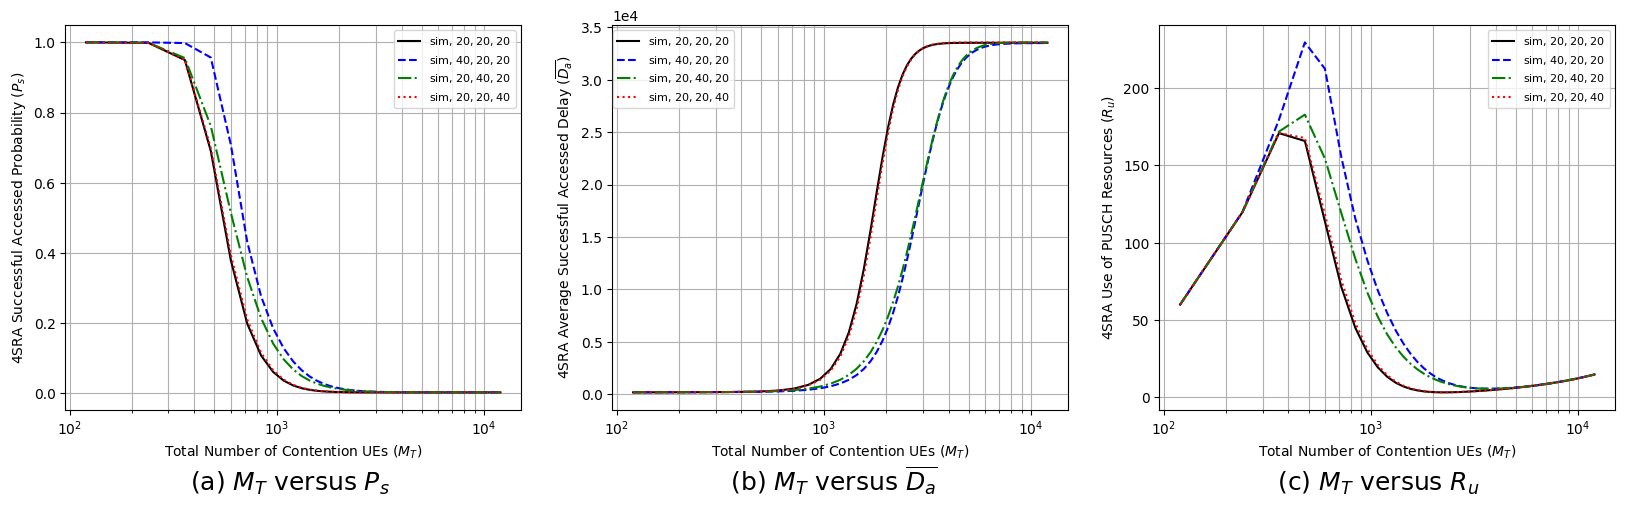

In [154]:
plt.subplot(131)
plt.plot(ana_wbo_1.M_4SRA+ana_wbo_1.M_2SRA, ana_wbo_1.Ps_4SRA, '-', color = 'black', label = 'sim, $20, 20, 20$')
plt.plot(ana_wbo_2.M_4SRA+ana_wbo_2.M_2SRA, ana_wbo_2.Ps_4SRA, '--', color = 'blue', label = 'sim, $40, 20, 20$')
plt.plot(ana_wbo_3.M_4SRA+ana_wbo_3.M_2SRA, ana_wbo_3.Ps_4SRA, '-.', color = 'green', label = 'sim, $20, 40, 20$')
plt.plot(ana_wbo_4.M_4SRA+ana_wbo_4.M_2SRA, ana_wbo_4.Ps_4SRA, ':', color = 'red', label = 'sim, $20, 20, 40$')
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("4SRA Successful Accessed Probability ($P_s$)")
# plt.title("(a) $M_T$ versus $P_s$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(1, 1))

plt.subplot(132)
plt.plot(ana_wbo_1.M_4SRA+ana_wbo_1.M_2SRA, ana_wbo_1.Da_4SRA, '-', color = 'black', label = 'sim, $20, 20, 20$')
plt.plot(ana_wbo_2.M_4SRA+ana_wbo_2.M_2SRA, ana_wbo_2.Da_4SRA, '--', color = 'blue', label = 'sim, $40, 20, 20$')
plt.plot(ana_wbo_3.M_4SRA+ana_wbo_3.M_2SRA, ana_wbo_3.Da_4SRA, '-.', color = 'green', label = 'sim, $20, 40, 20$')
plt.plot(ana_wbo_4.M_4SRA+ana_wbo_4.M_2SRA, ana_wbo_4.Da_4SRA, ':', color = 'red', label = 'sim, $20, 20, 40$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 0))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("4SRA Average Successful Accessed Delay ($\overline{D_{a}}$)")
# plt.title("(b) $M_T$ versus $\overline{D_{a}}$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(0.28, 1))

plt.subplot(133)
plt.plot(ana_wbo_1.M_4SRA+ana_wbo_1.M_2SRA, ana_wbo_1.Ur_PUSCH_4SRA, '-', color = 'black', label = 'sim, $20, 20, 20$')
plt.plot(ana_wbo_2.M_4SRA+ana_wbo_2.M_2SRA, ana_wbo_2.Ur_PUSCH_4SRA, '--', color = 'blue', label = 'sim, $40, 20, 20$')
plt.plot(ana_wbo_3.M_4SRA+ana_wbo_3.M_2SRA, ana_wbo_3.Ur_PUSCH_4SRA, '-.', color = 'green', label = 'sim, $20, 40, 20$')
plt.plot(ana_wbo_4.M_4SRA+ana_wbo_4.M_2SRA, ana_wbo_4.Ur_PUSCH_4SRA, ':', color = 'red', label = 'sim, $20, 20, 40$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 3))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("4SRA Use of PUSCH Resources ($R_u$)")
# plt.title("(c) $M_T$ versus $R_u$")
plt.grid(True, which="both")

plt.suptitle("(a) $M_T$ versus $P_s$                                           (b) $M_T$ versus $\overline{D_{a}}$                                           (c) $M_T$ versus $R_u$", fontsize=18, x=0.51, y=0.0)

plt.legend(markerscale=1, fontsize=8, loc='best')
plt.rcParams["figure.figsize"] = (20, 5)
plt.show()

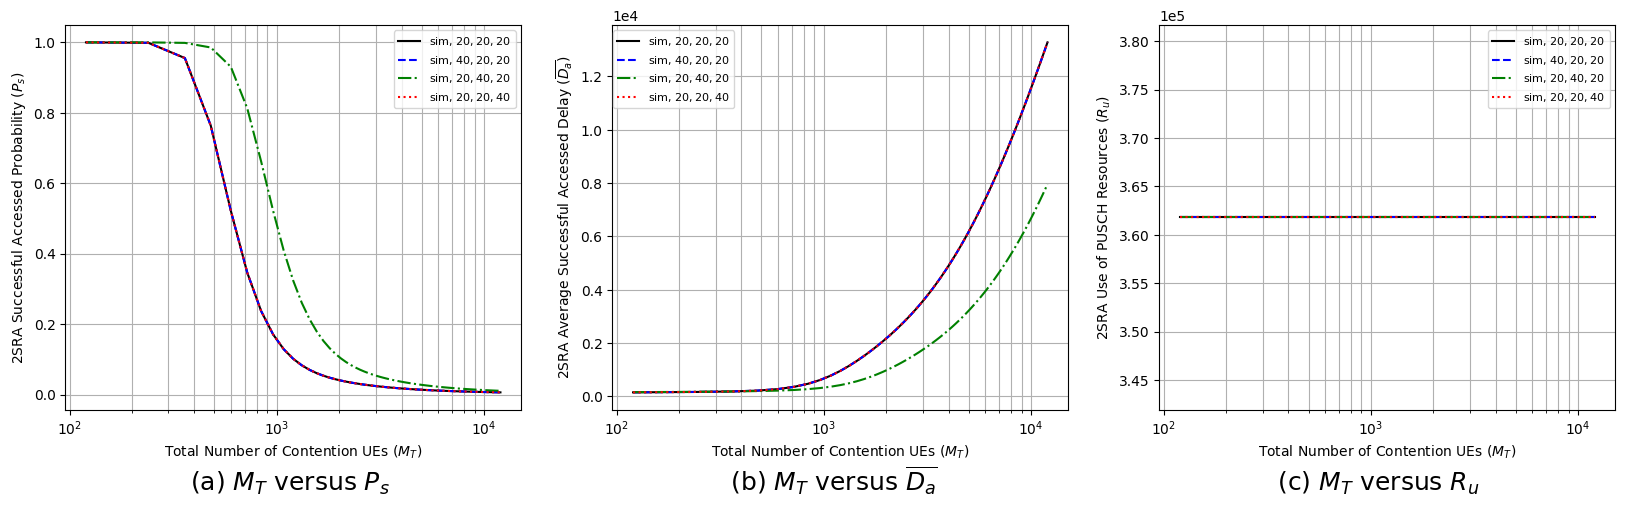

In [155]:
plt.subplot(131)
plt.plot(ana_wbo_1.M_4SRA+ana_wbo_1.M_2SRA, ana_wbo_1.Ps_2SRA, '-', color = 'black', label = 'sim, $20, 20, 20$')
plt.plot(ana_wbo_2.M_4SRA+ana_wbo_2.M_2SRA, ana_wbo_2.Ps_2SRA, '--', color = 'blue', label = 'sim, $40, 20, 20$')
plt.plot(ana_wbo_3.M_4SRA+ana_wbo_3.M_2SRA, ana_wbo_3.Ps_2SRA, '-.', color = 'green', label = 'sim, $20, 40, 20$')
plt.plot(ana_wbo_4.M_4SRA+ana_wbo_4.M_2SRA, ana_wbo_4.Ps_2SRA, ':', color = 'red', label = 'sim, $20, 20, 40$')
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("2SRA Successful Accessed Probability ($P_s$)")
# plt.title("(a) $M_T$ versus $P_s$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(1, 1))

plt.subplot(132)
plt.plot(ana_wbo_1.M_4SRA+ana_wbo_1.M_2SRA, ana_wbo_1.Da_2SRA, '-', color = 'black', label = 'sim, $20, 20, 20$')
plt.plot(ana_wbo_2.M_4SRA+ana_wbo_2.M_2SRA, ana_wbo_2.Da_2SRA, '--', color = 'blue', label = 'sim, $40, 20, 20$')
plt.plot(ana_wbo_3.M_4SRA+ana_wbo_3.M_2SRA, ana_wbo_3.Da_2SRA, '-.', color = 'green', label = 'sim, $20, 40, 20$')
plt.plot(ana_wbo_4.M_4SRA+ana_wbo_4.M_2SRA, ana_wbo_4.Da_2SRA, ':', color = 'red', label = 'sim, $20, 20, 40$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 0))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("2SRA Average Successful Accessed Delay ($\overline{D_{a}}$)")
# plt.title("(b) $M_T$ versus $\overline{D_{a}}$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(0.28, 1))

plt.subplot(133)
plt.plot(ana_wbo_1.M_4SRA+ana_wbo_1.M_2SRA, ana_wbo_1.Ur_PUSCH_2SRA, '-', color = 'black', label = 'sim, $20, 20, 20$')
plt.plot(ana_wbo_2.M_4SRA+ana_wbo_2.M_2SRA, ana_wbo_2.Ur_PUSCH_2SRA, '--', color = 'blue', label = 'sim, $40, 20, 20$')
plt.plot(ana_wbo_3.M_4SRA+ana_wbo_3.M_2SRA, ana_wbo_3.Ur_PUSCH_2SRA, '-.', color = 'green', label = 'sim, $20, 40, 20$')
plt.plot(ana_wbo_4.M_4SRA+ana_wbo_4.M_2SRA, ana_wbo_4.Ur_PUSCH_2SRA, ':', color = 'red', label = 'sim, $20, 20, 40$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 3))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("2SRA Use of PUSCH Resources ($R_u$)")
# plt.title("(c) $M_T$ versus $R_u$")
plt.grid(True, which="both")

plt.suptitle("(a) $M_T$ versus $P_s$                                           (b) $M_T$ versus $\overline{D_{a}}$                                           (c) $M_T$ versus $R_u$", fontsize=18, x=0.51, y=0.0)

plt.legend(markerscale=1, fontsize=8, loc='best')
plt.rcParams["figure.figsize"] = (20, 5)
plt.show()

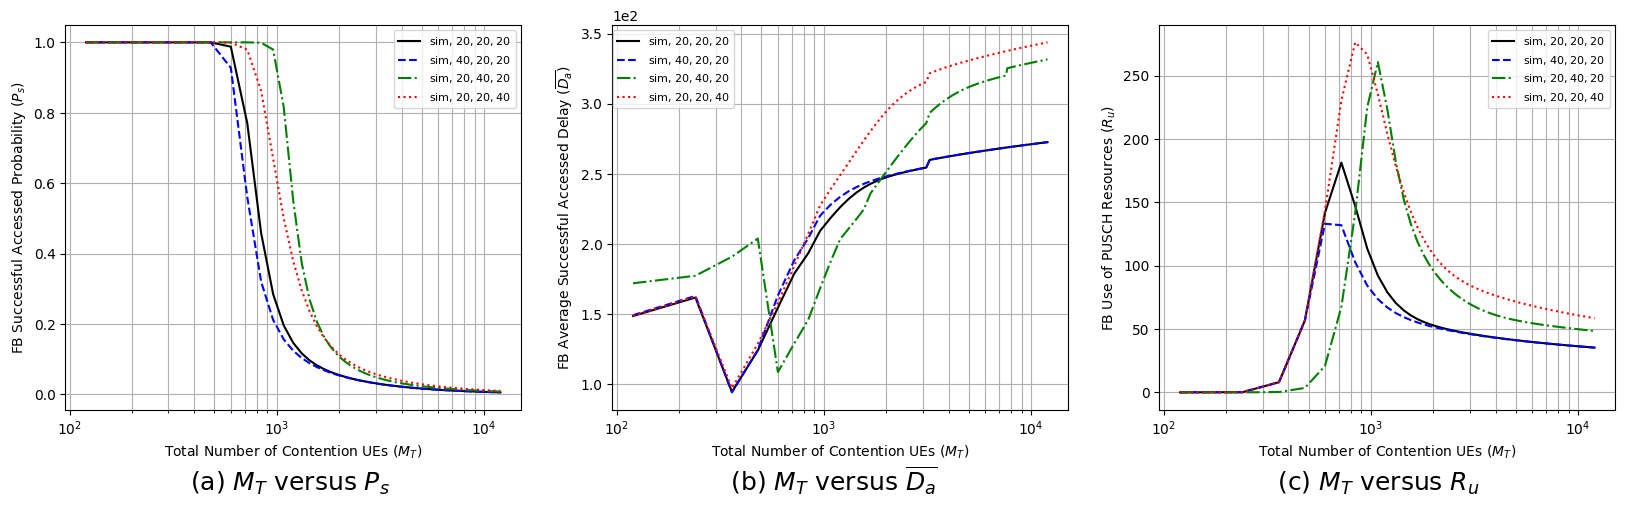

In [156]:
plt.subplot(131)
plt.plot(ana_wbo_1.M_4SRA+ana_wbo_1.M_2SRA, ana_wbo_1.Ps_FB, '-', color = 'black', label = 'sim, $20, 20, 20$')
plt.plot(ana_wbo_2.M_4SRA+ana_wbo_2.M_2SRA, ana_wbo_2.Ps_FB, '--', color = 'blue', label = 'sim, $40, 20, 20$')
plt.plot(ana_wbo_3.M_4SRA+ana_wbo_3.M_2SRA, ana_wbo_3.Ps_FB, '-.', color = 'green', label = 'sim, $20, 40, 20$')
plt.plot(ana_wbo_4.M_4SRA+ana_wbo_4.M_2SRA, ana_wbo_4.Ps_FB, ':', color = 'red', label = 'sim, $20, 20, 40$')
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("FB Successful Accessed Probability ($P_s$)")
# plt.title("(a) $M_T$ versus $P_s$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(1, 1))

plt.subplot(132)
plt.plot(ana_wbo_1.M_4SRA+ana_wbo_1.M_2SRA, ana_wbo_1.Da_FB, '-', color = 'black', label = 'sim, $20, 20, 20$')
plt.plot(ana_wbo_2.M_4SRA+ana_wbo_2.M_2SRA, ana_wbo_2.Da_FB, '--', color = 'blue', label = 'sim, $40, 20, 20$')
plt.plot(ana_wbo_3.M_4SRA+ana_wbo_3.M_2SRA, ana_wbo_3.Da_FB, '-.', color = 'green', label = 'sim, $20, 40, 20$')
plt.plot(ana_wbo_4.M_4SRA+ana_wbo_4.M_2SRA, ana_wbo_4.Da_FB, ':', color = 'red', label = 'sim, $20, 20, 40$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 0))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("FB Average Successful Accessed Delay ($\overline{D_{a}}$)")
# plt.title("(b) $M_T$ versus $\overline{D_{a}}$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(0.28, 1))

plt.subplot(133)
plt.plot(ana_wbo_1.M_4SRA+ana_wbo_1.M_2SRA, ana_wbo_1.Ur_PUSCH_FB, '-', color = 'black', label = 'sim, $20, 20, 20$')
plt.plot(ana_wbo_2.M_4SRA+ana_wbo_2.M_2SRA, ana_wbo_2.Ur_PUSCH_FB, '--', color = 'blue', label = 'sim, $40, 20, 20$')
plt.plot(ana_wbo_3.M_4SRA+ana_wbo_3.M_2SRA, ana_wbo_3.Ur_PUSCH_FB, '-.', color = 'green', label = 'sim, $20, 40, 20$')
plt.plot(ana_wbo_4.M_4SRA+ana_wbo_4.M_2SRA, ana_wbo_4.Ur_PUSCH_FB, ':', color = 'red', label = 'sim, $20, 20, 40$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 3))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("FB Use of PUSCH Resources ($R_u$)")
# plt.title("(c) $M_T$ versus $R_u$")
plt.grid(True, which="both")

plt.suptitle("(a) $M_T$ versus $P_s$                                           (b) $M_T$ versus $\overline{D_{a}}$                                           (c) $M_T$ versus $R_u$", fontsize=18, x=0.51, y=0.0)

plt.legend(markerscale=1, fontsize=8, loc='best')
plt.rcParams["figure.figsize"] = (20, 5)
plt.show()

## **Plotting Figures 1**

In [14]:
ana_30k = pandas.read_csv('ana_testresult_30k.csv')

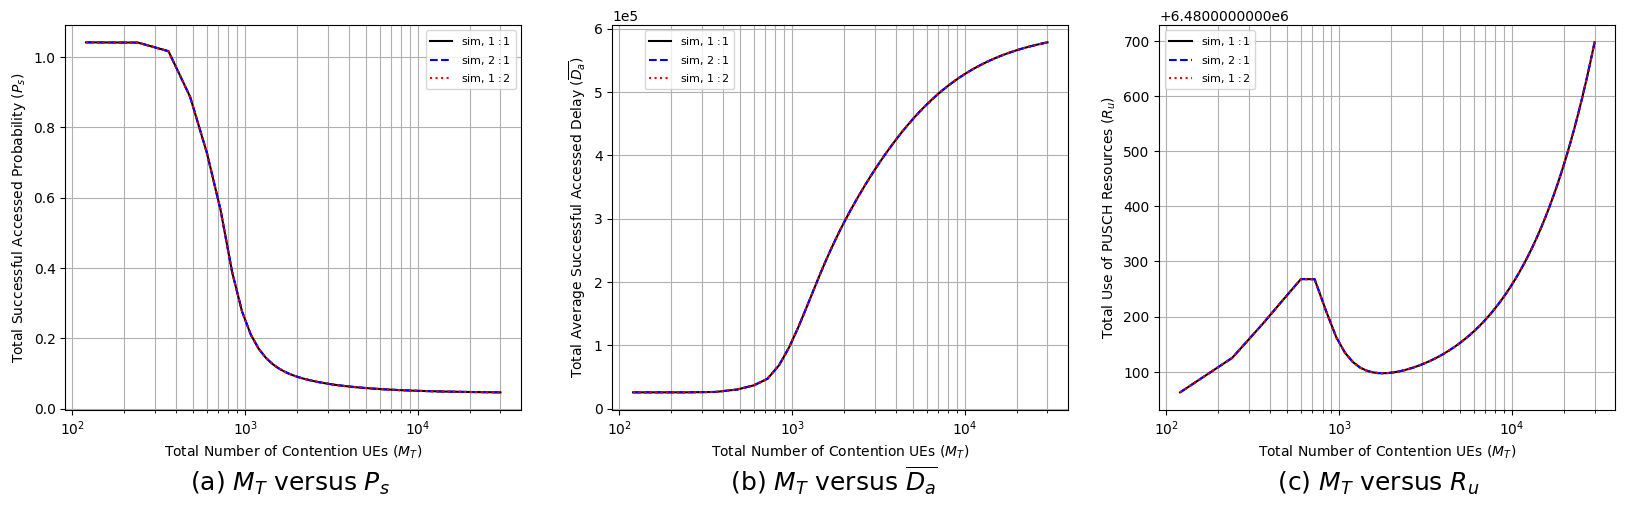

In [15]:
plt.subplot(131)
plt.plot(ana_30k.M_4SRA+ana_30k.M_2SRA, ana_30k.Ps_T, '-', color = 'black', label = 'sim, $1:1$')
# plt.plot(sim_m_1.M_4SRA+sim_m_1.M_2SRA, sim_m_1.Ps_T, '-', color = 'black')
plt.plot(ana_30k.M_4SRA+ana_30k.M_2SRA, ana_30k.Ps_T, '--', color = 'blue', label = 'sim, $2:1$')
plt.plot(ana_30k.M_4SRA+ana_30k.M_2SRA, ana_30k.Ps_T, ':', color = 'red', label = 'sim, $1:2$')
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("Total Successful Accessed Probability ($P_s$)")
# plt.title("(a) $M_T$ versus $P_s$")
# plt.suptitle("(a) $M_T$ versus $P_s$", fontsize=18, x=0.23, y=0.0)
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(1, 1))

plt.subplot(132)
plt.plot(ana_30k.M_4SRA+ana_30k.M_2SRA, ana_30k.Da_T, '-', color = 'black', label = 'sim, $1:1$')
# plt.plot(sim_m_1.M_4SRA+sim_m_1.M_2SRA, sim_m_1.Da_T, '-', color = 'black')
plt.plot(ana_30k.M_4SRA+ana_30k.M_2SRA, ana_30k.Da_T, '--', color = 'blue', label = 'sim, $2:1$')
plt.plot(ana_30k.M_4SRA+ana_30k.M_2SRA, ana_30k.Da_T, ':', color = 'red', label = 'sim, $1:2$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 0))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("Total Average Successful Accessed Delay ($\overline{D_{a}}$)")
# plt.title("(b) $M_T$ versus $\overline{D_{a}}$")
plt.grid(True, which="both")

plt.legend(markerscale=1, fontsize=8, loc='best', bbox_to_anchor=(0.28, 1))

plt.subplot(133)
plt.plot(ana_30k.M_4SRA+ana_30k.M_2SRA, ana_30k.Ur_PUSCH_T, '-', color = 'black', label = 'sim, $1:1$')
# plt.plot(sim_m_1.M_4SRA+sim_m_1.M_2SRA, sim_m_1.Ur_PUSCH_T, '-', color = 'black', label = 'sim, $1:1$')
plt.plot(ana_30k.M_4SRA+ana_30k.M_2SRA, ana_30k.Ur_PUSCH_T, '--', color = 'blue', label = 'sim, $2:1$')
plt.plot(ana_30k.M_4SRA+ana_30k.M_2SRA, ana_30k.Ur_PUSCH_T, ':', color = 'red', label = 'sim, $1:2$')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 3))
plt.xscale('log')
plt.xlabel("Total Number of Contention UEs ($M_T$)")
plt.ylabel("Total Use of PUSCH Resources ($R_u$)")
# plt.title("(c) $M_T$ versus $R_u$")
plt.grid(True, which="both")

plt.suptitle("(a) $M_T$ versus $P_s$                                           (b) $M_T$ versus $\overline{D_{a}}$                                           (c) $M_T$ versus $R_u$", fontsize=18, x=0.51, y=0.0)


plt.legend(markerscale=1, fontsize=8, loc='best')
plt.rcParams["figure.figsize"] = (20, 5)
plt.show()

## **Plotting Figures 2**

In [139]:
ana_1 = pandas.read_csv('ana_testresult_1.csv')
ana_2 = pandas.read_csv('ana_testresult_2.csv')
ana_3 = pandas.read_csv('ana_testresult_3.csv')
ana_4 = pandas.read_csv('ana_testresult_4.csv')

sim_1 = pandas.read_csv('sim_testresult_1.csv')
sim_2 = pandas.read_csv('sim_testresult_2.csv')
sim_3 = pandas.read_csv('sim_testresult_3.csv')
sim_4 = pandas.read_csv('sim_testresult_4.csv')

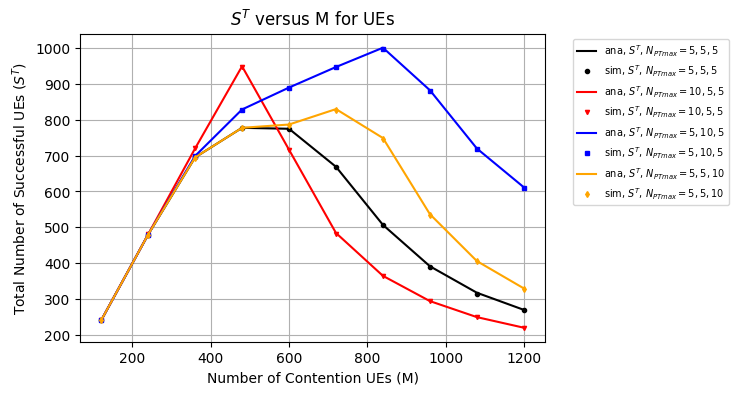

In [140]:
plt.plot(ana_1.M_4SRA, ana_1.Ms_T, '-', color = 'black', label = 'ana, $S^T$, $N_{PTmax}=5,5,5$')
plt.plot(sim_1.M_4SRA, sim_1.Ms_T, 'o', ms = 3, color = 'black', label = 'sim, $S^T$, $N_{PTmax}=5,5,5$')

plt.plot(ana_2.M_4SRA, ana_2.Ms_T, '-', color = 'red', label = 'ana, $S^T$, $N_{PTmax}=10,5,5$')
plt.plot(sim_2.M_4SRA, sim_2.Ms_T, 'v', ms = 3, color = 'red', label = 'sim, $S^T$, $N_{PTmax}=10,5,5$')

plt.plot(ana_3.M_4SRA, ana_3.Ms_T, '-', color = 'blue', label = 'ana, $S^T$, $N_{PTmax}=5,10,5$')
plt.plot(sim_3.M_4SRA, sim_3.Ms_T, 's', ms = 3, color = 'blue', label = 'sim, $S^T$, $N_{PTmax}=5,10,5$')

plt.plot(ana_4.M_4SRA, ana_4.Ms_T, '-', color = 'orange', label = 'ana, $S^T$, $N_{PTmax}=5,5,10$')
plt.plot(sim_4.M_4SRA, sim_4.Ms_T, 'd', ms = 3, color = 'orange', label = 'sim, $S^T$, $N_{PTmax}=5,5,10$')

plt.xlabel("Number of Contention UEs (M)")
plt.ylabel("Total Number of Successful UEs ($S^T$)")
plt.grid(True, which="both")
plt.legend(markerscale=1, fontsize=7, loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title('$S^T$ versus M for UEs')
plt.rcParams["figure.figsize"] = (6, 4)
plt.show()

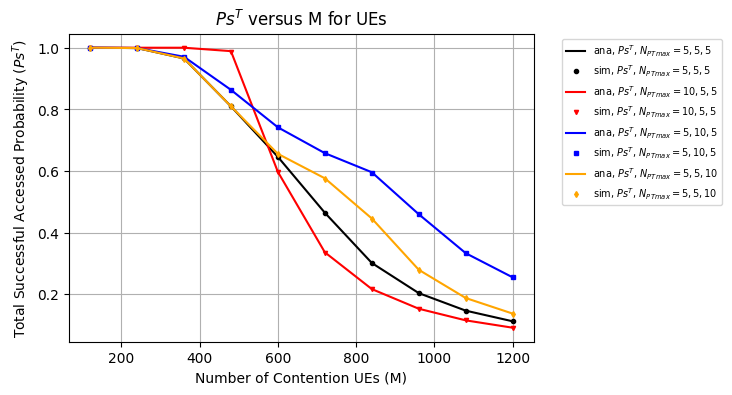

In [141]:
plt.plot(ana_1.M_4SRA, ana_1.Ps_T, '-', color = 'black', label = 'ana, $Ps^T$, $N_{PTmax}=5,5,5$')
plt.plot(sim_1.M_4SRA, sim_1.Ps_T, 'o', ms = 3, color = 'black', label = 'sim, $Ps^T$, $N_{PTmax}=5,5,5$')

plt.plot(ana_2.M_4SRA, ana_2.Ps_T, '-', color = 'red', label = 'ana, $Ps^T$, $N_{PTmax}=10,5,5$')
plt.plot(sim_2.M_4SRA, sim_2.Ps_T, 'v', ms = 3, color = 'red', label = 'sim, $Ps^T$, $N_{PTmax}=10,5,5$')

plt.plot(ana_3.M_4SRA, ana_3.Ps_T, '-', color = 'blue', label = 'ana, $Ps^T$, $N_{PTmax}=5,10,5$')
plt.plot(sim_3.M_4SRA, sim_3.Ps_T, 's', ms = 3, color = 'blue', label = 'sim, $Ps^T$, $N_{PTmax}=5,10,5$')

plt.plot(ana_4.M_4SRA, ana_4.Ps_T, '-', color = 'orange', label = 'ana, $Ps^T$, $N_{PTmax}=5,5,10$')
plt.plot(sim_4.M_4SRA, sim_4.Ps_T, 'd', ms = 3, color = 'orange', label = 'sim, $Ps^T$, $N_{PTmax}=5,5,10$')

plt.xlabel("Number of Contention UEs (M)")
plt.ylabel("Total Successful Accessed Probability ($Ps^T$)")
plt.grid(True, which="both")
plt.legend(markerscale=1, fontsize=7, loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title('$Ps^T$ versus M for UEs')
plt.rcParams["figure.figsize"] = (6, 4)
plt.show()

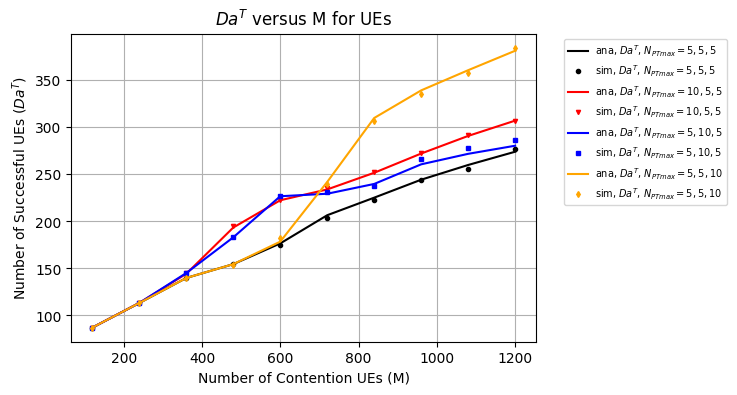

In [196]:
plt.plot(ana_1.M_4SRA, ana_1.Da_T, '-', color = 'black', label = 'ana, $Da^T$, $N_{PTmax}=5,5,5$')
plt.plot(sim_1.M_4SRA, sim_1.Da_T, 'o', ms = 3, color = 'black', label = 'sim, $Da^T$, $N_{PTmax}=5,5,5$')

plt.plot(ana_2.M_4SRA, ana_2.Da_T, '-', color = 'red', label = 'ana, $Da^T$, $N_{PTmax}=10,5,5$')
plt.plot(sim_2.M_4SRA, sim_2.Da_T, 'v', ms = 3, color = 'red', label = 'sim, $Da^T$, $N_{PTmax}=10,5,5$')

plt.plot(ana_3.M_4SRA, ana_3.Da_T, '-', color = 'blue', label = 'ana, $Da^T$, $N_{PTmax}=5,10,5$')
plt.plot(sim_3.M_4SRA, sim_3.Da_T, 's', ms = 3, color = 'blue', label = 'sim, $Da^T$, $N_{PTmax}=5,10,5$')

plt.plot(ana_4.M_4SRA, ana_4.Da_T, '-', color = 'orange', label = 'ana, $Da^T$, $N_{PTmax}=5,5,10$')
plt.plot(sim_4.M_4SRA, sim_4.Da_T, 'd', ms = 3, color = 'orange', label = 'sim, $Da^T$, $N_{PTmax}=5,5,10$')

plt.xlabel("Number of Contention UEs (M)")
plt.ylabel("Number of Successful UEs ($Da^T$)")
plt.grid(True, which="both")
plt.legend(markerscale=1, fontsize=7, loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title('$Da^T$ versus M for UEs')
plt.rcParams["figure.figsize"] = (6, 4)
plt.show()

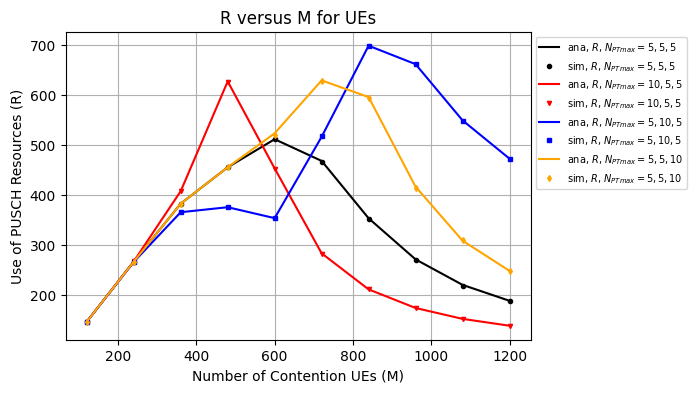

In [143]:
plt.plot(ana_1.M_4SRA, ana_1.Ur_PUSCH_T, '-', color = 'black', label = 'ana, $R$, $N_{PTmax}=5,5,5$')
plt.plot(sim_1.M_4SRA, sim_1.Ur_PUSCH_T, 'o', ms = 3, color = 'black', label = 'sim, $R$, $N_{PTmax}=5,5,5$')

plt.plot(ana_2.M_4SRA, ana_2.Ur_PUSCH_T, '-', color = 'red', label = 'ana, $R$, $N_{PTmax}=10,5,5$')
plt.plot(sim_2.M_4SRA, sim_2.Ur_PUSCH_T, 'v', ms = 3, color = 'red', label = 'sim, $R$, $N_{PTmax}=10,5,5$')

plt.plot(ana_3.M_4SRA, ana_3.Ur_PUSCH_T, '-', color = 'blue', label = 'ana, $R$, $N_{PTmax}=5,10,5$')
plt.plot(sim_3.M_4SRA, sim_3.Ur_PUSCH_T, 's', ms = 3, color = 'blue', label = 'sim, $R$, $N_{PTmax}=5,10,5$')

plt.plot(ana_4.M_4SRA, ana_4.Ur_PUSCH_T, '-', color = 'orange', label = 'ana, $R$, $N_{PTmax}=5,5,10$')
plt.plot(sim_4.M_4SRA, sim_4.Ur_PUSCH_T, 'd', ms = 3, color = 'orange', label = 'sim, $R$, $N_{PTmax}=5,5,10$')

plt.xlabel("Number of Contention UEs (M)")
plt.ylabel("Use of PUSCH Resources (R)")
plt.grid(True, which="both")
plt.legend(markerscale=1, fontsize=7, loc='upper left', bbox_to_anchor=(1, 1))
plt.title('R versus M for UEs')
plt.rcParams["figure.figsize"] = (6, 4)
plt.show()

In [7]:
ana_1 = pandas.read_csv('ana_testresult_1.csv')
ana_5 = pandas.read_csv('ana_testresult_5.csv')
ana_6 = pandas.read_csv('ana_testresult_6.csv')
ana_7 = pandas.read_csv('ana_testresult_7.csv')

sim_1 = pandas.read_csv('sim_testresult_1.csv')
sim_5 = pandas.read_csv('sim_testresult_5.csv')
sim_6 = pandas.read_csv('sim_testresult_6.csv')
sim_7 = pandas.read_csv('sim_testresult_7.csv')

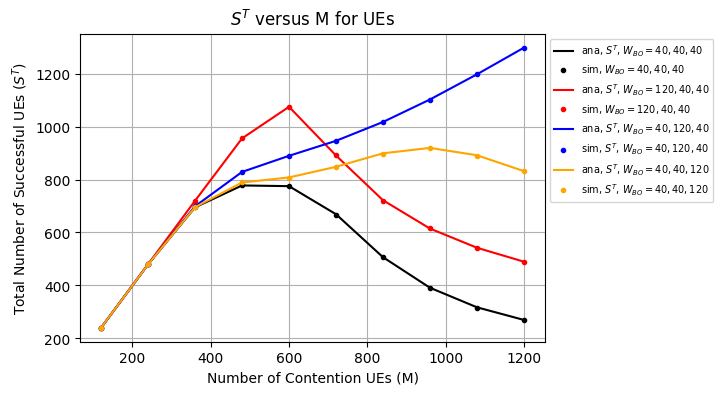

In [8]:
plt.plot(ana_1.M_4SRA, ana_1.Ms_T, '-', color = 'black', label = 'ana, $S^T$, $W_{BO}=40,40,40$')
plt.plot(sim_1.M_4SRA, sim_1.Ms_T, 'o', ms = 3, color = 'black', label = 'sim, $W_{BO}=40,40,40$')

plt.plot(ana_5.M_4SRA, ana_5.Ms_T, '-', color = 'red', label = 'ana, $S^T$, $W_{BO}=120,40,40$')
plt.plot(sim_5.M_4SRA, sim_5.Ms_T, 'o', ms = 3, color = 'red', label = 'sim, $W_{BO}=120,40,40$')

plt.plot(ana_6.M_4SRA, ana_6.Ms_T, '-', color = 'blue', label = 'ana, $S^T$, $W_{BO}=40,120,40$')
plt.plot(sim_6.M_4SRA, sim_6.Ms_T, 'o', ms = 3, color = 'blue', label = 'sim, $S^T$, $W_{BO}=40,120,40$')

plt.plot(ana_7.M_4SRA, ana_7.Ms_T, '-', color = 'orange', label = 'ana, $S^T$, $W_{BO}=40,40,120$')
plt.plot(sim_7.M_4SRA, sim_7.Ms_T, 'o', ms = 3, color = 'orange', label = 'sim, $S^T$, $W_{BO}=40,40,120$')

plt.xlabel("Number of Contention UEs (M)")
plt.ylabel("Total Number of Successful UEs ($S^T$)")
plt.grid(True, which="both")
plt.legend(markerscale=1, fontsize=7, loc='upper left', bbox_to_anchor=(1, 1))
plt.title('$S^T$ versus M for UEs')
plt.rcParams["figure.figsize"] = (6, 4)
plt.show()

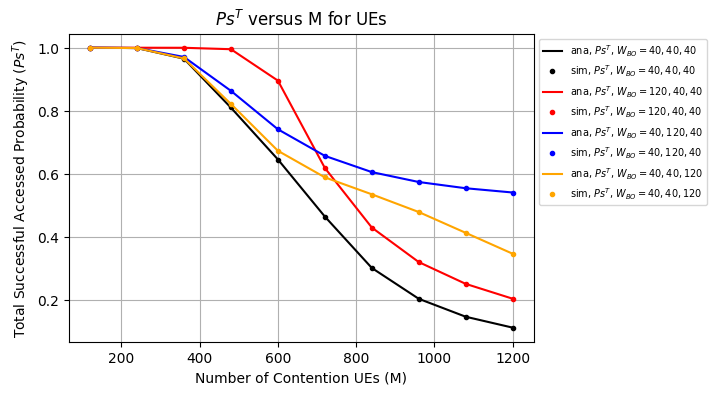

In [9]:
plt.plot(ana_1.M_4SRA, ana_1.Ps_T, '-', color = 'black', label = 'ana, $Ps^T$, $W_{BO}=40,40,40$')
plt.plot(sim_1.M_4SRA, sim_1.Ps_T, 'o', ms = 3, color = 'black', label = 'sim, $Ps^T$, $W_{BO}=40,40,40$')

plt.plot(ana_5.M_4SRA, ana_5.Ps_T, '-', color = 'red', label = 'ana, $Ps^T$, $W_{BO}=120,40,40$')
plt.plot(sim_5.M_4SRA, sim_5.Ps_T, 'o', ms = 3, color = 'red', label = 'sim, $Ps^T$, $W_{BO}=120,40,40$')

plt.plot(ana_6.M_4SRA, ana_6.Ps_T, '-', color = 'blue', label = 'ana, $Ps^T$, $W_{BO}=40,120,40$')
plt.plot(sim_6.M_4SRA, sim_6.Ps_T, 'o', ms = 3, color = 'blue', label = 'sim, $Ps^T$, $W_{BO}=40,120,40$')

plt.plot(ana_7.M_4SRA, ana_7.Ps_T, '-', color = 'orange', label = 'ana, $Ps^T$, $W_{BO}=40,40,120$')
plt.plot(sim_7.M_4SRA, sim_7.Ps_T, 'o', ms = 3, color = 'orange', label = 'sim, $Ps^T$, $W_{BO}=40,40,120$')

plt.xlabel("Number of Contention UEs (M)")
plt.ylabel("Total Successful Accessed Probability ($Ps^T$)")
plt.grid(True, which="both")
plt.legend(markerscale=1, fontsize=7, loc='upper left', bbox_to_anchor=(1, 1))
plt.title('$Ps^T$ versus M for UEs')
plt.rcParams["figure.figsize"] = (6, 4)
plt.show()

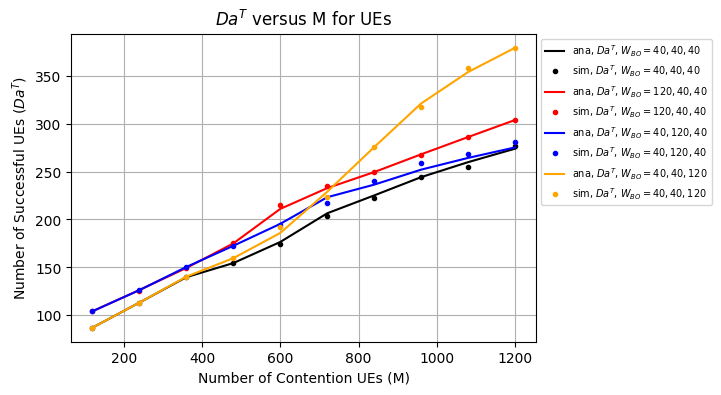

In [10]:
plt.plot(ana_1.M_4SRA, ana_1.Da_T, '-', color = 'black', label = 'ana, $Da^T$, $W_{BO}=40,40,40$')
plt.plot(sim_1.M_4SRA, sim_1.Da_T, 'o', ms = 3, color = 'black', label = 'sim, $Da^T$, $W_{BO}=40,40,40$')

plt.plot(ana_5.M_4SRA, ana_5.Da_T, '-', color = 'red', label = 'ana, $Da^T$, $W_{BO}=120,40,40$')
plt.plot(sim_5.M_4SRA, sim_5.Da_T, 'o', ms = 3, color = 'red', label = 'sim, $Da^T$, $W_{BO}=120,40,40$')

plt.plot(ana_6.M_4SRA, ana_6.Da_T, '-', color = 'blue', label = 'ana, $Da^T$, $W_{BO}=40,120,40$')
plt.plot(sim_6.M_4SRA, sim_6.Da_T, 'o', ms = 3, color = 'blue', label = 'sim, $Da^T$, $W_{BO}=40,120,40$')

plt.plot(ana_7.M_4SRA, ana_7.Da_T, '-', color = 'orange', label = 'ana, $Da^T$, $W_{BO}=40,40,120$')
plt.plot(sim_7.M_4SRA, sim_7.Da_T, 'o', ms = 3, color = 'orange', label = 'sim, $Da^T$, $W_{BO}=40,40,120$')

plt.xlabel("Number of Contention UEs (M)")
plt.ylabel("Number of Successful UEs ($Da^T$)")
plt.grid(True, which="both")
plt.legend(markerscale=1, fontsize=7, loc='upper left', bbox_to_anchor=(1, 1))
plt.title('$Da^T$ versus M for UEs')
plt.rcParams["figure.figsize"] = (6, 4)
plt.show()

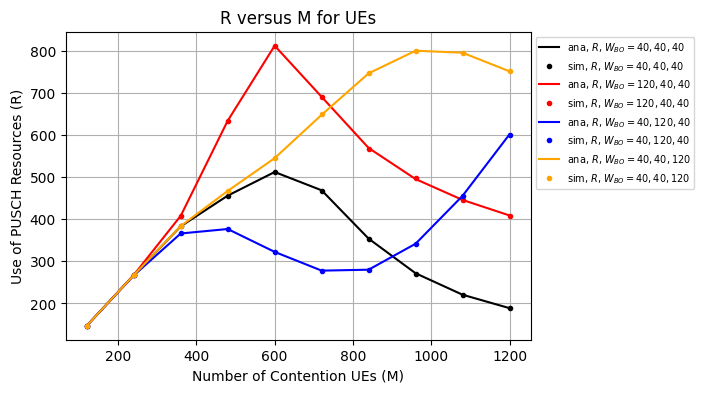

In [12]:
plt.plot(ana_1.M_4SRA, ana_1.Ur_PUSCH_T, '-', color = 'black', label = 'ana, $R$, $W_{BO}=40,40,40$')
plt.plot(sim_1.M_4SRA, sim_1.Ur_PUSCH_T, 'o', ms = 3, color = 'black', label = 'sim, $R$, $W_{BO}=40,40,40$')

plt.plot(ana_5.M_4SRA, ana_5.Ur_PUSCH_T, '-', color = 'red', label = 'ana, $R$, $W_{BO}=120,40,40$')
plt.plot(sim_5.M_4SRA, sim_5.Ur_PUSCH_T, 'o', ms = 3, color = 'red', label = 'sim, $R$, $W_{BO}=120,40,40$')

plt.plot(ana_6.M_4SRA, ana_6.Ur_PUSCH_T, '-', color = 'blue', label = 'ana, $R$, $W_{BO}=40,120,40$')
plt.plot(sim_6.M_4SRA, sim_6.Ur_PUSCH_T, 'o', ms = 3, color = 'blue', label = 'sim, $R$, $W_{BO}=40,120,40$')

plt.plot(ana_7.M_4SRA, ana_7.Ur_PUSCH_T, '-', color = 'orange', label = 'ana, $R$, $W_{BO}=40,40,120$')
plt.plot(sim_7.M_4SRA, sim_7.Ur_PUSCH_T, 'o', ms = 3, color = 'orange', label = 'sim, $R$, $W_{BO}=40,40,120$')

plt.xlabel("Number of Contention UEs (M)")
plt.ylabel("Use of PUSCH Resources (R)")
plt.grid(True, which="both")
plt.legend(markerscale=1, fontsize=7, loc='upper left', bbox_to_anchor=(1, 1))
plt.title('R versus M for UEs')
plt.rcParams["figure.figsize"] = (6, 4)
plt.show()